In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ THE TRASH-TRACKER ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [2]:
# Install Jupyter Notebook in order to run this code

In [3]:
# The Trash-Tracker is a numerical code developed by Mellink et al. (2021) to simulate the transport and accumulation of
# plastic trash through terrestrial and freshwater systems. The two plastic transport agents are wind and surface
# runoff. The transport of plastic trash over land occurs when the wind and/or surface runoff conditions are sufficient 
# to overcome the wind and/or surface runoff thresholds, respectively. These thresholds reflect the resistance to plastic
# transport and are a function of land use and terrain slope.

In [4]:
# Import the following libraries:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.animation import FuncAnimation
import math
from textwrap import wrap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from random import choices
from platform import python_version


In [5]:
# To see which version of Python is used:

print('This code uses Python version', python_version())


This code uses Python version 3.8.3


In [6]:
### Model parameters #######################################################################################################

# The ParVal array contains all values for the model parameters:

ParVal= np.array ( [30.00, 6.60, 26.40, 13.20, 8.80, 10.00, \
                    1, \
                    4.20, \
                    0.00, \
                    15.00, 3.00, 2.75, 2.50, 2.25, 2.00, 1.75, 1.50, 1.25,  1.00,  \
                    15.00, 7.00, 6.75, 6.50, 6.25, 6.00, 5.75, 5.50, 5.25,  5.00,  \
                    15.00, 5.00, 4.75, 4.50, 4.25, 4.00, 3.75, 3.50, 3.25,  3.00,  \
                    15.00, 2.00, 1.75, 1.50, 1.25, 1.00, 0.75, 0.50, 0.25, 0.001,  \
                    15.00, 4.00, 3.75, 3.50, 3.25, 3.00, 2.75, 2.50, 2.25,  2.00,  \
                    1.00,  0.50, 0.10, 0.30, 0.70, 0.20, \
                    526,   0.19, 0.01] ) 


# The user can changes the values in the ParVal array if he/she wants to (see legend below)
############################################################################################################################
############################################################################################################################

# Legend of the values in the ParVal array:

### First line in ParVal array: ############################################################################################

# Wind threshold values that mobilize plastic trash:

# Wind threshold (m/s) value for River (slope: N.A.):
W_T_R = ParVal[0]
# Wind threshold (m/s) value for Bare land (slope: 0 radians):
W_T_B = ParVal[1]
# Wind threshold (m/s) value for Forest land (slope: 0 radians):
W_T_F = ParVal[2]
# Wind threshold (m/s) value for Agricultural land (slope: 0 radians):
W_T_A = ParVal[3]
# Wind threshold (m/s) value for Urban land (slope: 0 radians):
W_T_U = ParVal[4]
# Wind threshold (m/s) value for Grass/shrubland (slope: 0 radians):
W_T_G = ParVal[5]

### Second line in ParVal array: ###########################################################################################

# If you only want the type of land use to influence the wind threshold, then set "W_T" to "1", but if you want both the 
# type of land use and the slope to influence the wind threshold, then set "W_T" to "2":
W_T = ParVal[6]

### Third line in ParVal array: ############################################################################################

# In case W_T = 2, define the change in wind threshold value per 1 radian of slope:
deltaTW = ParVal[7]    
# The wind threshold value is decreased (in case of downhill wind) or increased (in case of uphill wind) with deltaTW (m/s)
# per 1 rad terrain slope angle, e.g. if deltaTW = 4.20, the wind threshold value in a cell is lowered with 0.5 * 4.20 in 
# case the wind is downhill along a terrain slope of 0.5 rad 

### Fourth line in ParVal array: ###########################################################################################

# Surface runoff threshold (mm) value for River (slope: N.A.):
R_T_R = ParVal[8]

### Fifth line in ParVal array: ############################################################################################

# Surface runoff threshold (mm) value for Bare land in case the cell is surrounded by cells that have a higher topography:
R_T_B_0 = ParVal[9]
# Surface runoff threshold (mm) value for Bare land (slope: 0-10 degrees):
R_T_B_1 = ParVal[10]
# Surface runoff threshold (mm) value for Bare land (slope: 10-20 degrees):
R_T_B_2 = ParVal[11]
# Surface runoff threshold (mm) value for Bare land (slope: 20-30 degrees):
R_T_B_3 = ParVal[12]
# Surface runoff threshold (mm) value for Bare land (slope: 30-40 degrees):
R_T_B_4 = ParVal[13]
# Surface runoff threshold (mm) value for Bare land (slope: 40-50 degrees):
R_T_B_5 = ParVal[14]
# Surface runoff threshold (mm) value for Bare land (slope: 50-60 degrees):
R_T_B_6 = ParVal[15]
# Surface runoff threshold (mm) value for Bare land (slope: 60-70 degrees):
R_T_B_7 = ParVal[16]
# Surface runoff threshold (mm) value for Bare land (slope: 70-80 degrees):
R_T_B_8 = ParVal[17]
# Surface runoff threshold (mm) value for Bare land (slope: 80-90 degrees):
R_T_B_9 = ParVal[18]

### Sixth line in ParVal array: ############################################################################################

# Surface runoff threshold (mm) value for Forest land in case the cell is surrounded by cells that have a higher topography:
R_T_F_0 = ParVal[19]
# Surface runoff threshold (mm) value for Forest land (slope: 0-10 degrees):
R_T_F_1 = ParVal[20]
# Surface runoff threshold (mm) value for Forest land (slope: 10-20 degrees):
R_T_F_2 = ParVal[21]
# Surface runoff threshold (mm) value for Forest land (slope: 20-30 degrees):
R_T_F_3 = ParVal[22]
# Surface runoff threshold (mm) value for Forest land (slope: 30-40 degrees):
R_T_F_4 = ParVal[23]
# Surface runoff threshold (mm) value for Forest land (slope: 40-50 degrees):
R_T_F_5 = ParVal[24]
# Surface runoff threshold (mm) value for Forest land (slope: 50-60 degrees):
R_T_F_6 = ParVal[25]
# Surface runoff threshold (mm) value for Forest land (slope: 60-70 degrees):
R_T_F_7 = ParVal[26]
# Surface runoff threshold (mm) value for Forest land (slope: 70-80 degrees):
R_T_F_8 = ParVal[27]
# Surface runoff threshold (mm) value for Forest land (slope: 80-90 degrees):
R_T_F_9 = ParVal[28]

### Seventh line in ParVal array: ##########################################################################################

# Surface runoff threshold (mm) value for Agricultural land in case the cell is surrounded by cells that have a higher topography:
R_T_A_0 = ParVal[29]
# Surface runoff threshold (mm) value for Agricultural land (slope: 0-10 degrees):
R_T_A_1 = ParVal[30]
# Surface runoff threshold (mm) value for Agricultural land (slope: 10-20 degrees):
R_T_A_2 = ParVal[31]
# Surface runoff threshold (mm) value for Agricultural land (slope: 20-30 degrees):
R_T_A_3 = ParVal[32]
# Surface runoff threshold (mm) value for Agricultural land (slope: 30-40 degrees):
R_T_A_4 = ParVal[33]
# Surface runoff threshold (mm) value for Agricultural land (slope: 40-50 degrees):
R_T_A_5 = ParVal[34]
# Surface runoff threshold (mm) value for Agricultural land (slope: 50-60 degrees):
R_T_A_6 = ParVal[35]
# Surface runoff threshold (mm) value for Agricultural land (slope: 60-70 degrees):
R_T_A_7 = ParVal[36]
# Surface runoff threshold (mm) value for Agricultural land (slope: 70-80 degrees):
R_T_A_8 = ParVal[37]
# Surface runoff threshold (mm) value for Agricultural land (slope: 80-90 degrees):
R_T_A_9 = ParVal[38]

### Eigth line in ParVal array: ############################################################################################

# Surface runoff threshold (mm) value for Urban land in case the cell is surrounded by cells that have a higher topography:
R_T_U_0 = ParVal[39]
# Surface runoff threshold (mm) value for Urban land (slope: 0-10 degrees):
R_T_U_1 = ParVal[40]
# Surface runoff threshold (mm) value for Urban land (slope: 10-20 degrees):
R_T_U_2 = ParVal[41]
# Surface runoff threshold (mm) value for Urban land (slope: 20-30 degrees):
R_T_U_3 = ParVal[42]
# Surface runoff threshold (mm) value for Urban land (slope: 30-40 degrees):
R_T_U_4 = ParVal[43]
# Surface runoff threshold (mm) value for Urban land (slope: 40-50 degrees):
R_T_U_5 = ParVal[44]
# Surface runoff threshold (mm) value for Urban land (slope: 50-60 degrees):
R_T_U_6 = ParVal[45]
# Surface runoff threshold (mm) value for Urban land (slope: 60-70 degrees):
R_T_U_7 = ParVal[46]
# Surface runoff threshold (mm) value for Urban land (slope: 70-80 degrees):
R_T_U_8 = ParVal[47]
# Surface runoff threshold (mm) value for Urban land (slope: 80-90 degrees):
R_T_U_9 = ParVal[48]

### Nineth line in ParVal array: ###########################################################################################

# Surface runoff threshold (mm) value for Grass/shrubland in case the cell is surrounded by cells that have a higher topography:
R_T_G_0 = ParVal[49]
# Surface runoff threshold (mm) value for Grass/shrubland (slope: 0-10 degrees):
R_T_G_1 = ParVal[50]
# Surface runoff threshold (mm) value for Grass/shrubland (slope: 10-20 degrees):
R_T_G_2 = ParVal[51]
# Surface runoff threshold (mm) value for Grass/shrubland (slope: 20-30 degrees):
R_T_G_3 = ParVal[52]
# Surface runoff threshold (mm) value for Grass/shrubland (slope: 30-40 degrees):
R_T_G_4 = ParVal[53]
# Surface runoff threshold (mm) value for Grass/shrubland (slope: 40-50 degrees):
R_T_G_5 = ParVal[54]
# Surface runoff threshold (mm) value for Grass/shrubland (slope: 50-60 degrees):
R_T_G_6 = ParVal[55]
# Surface runoff threshold (mm) value for Grass/shrubland (slope: 60-70 degrees):
R_T_G_7 = ParVal[56]
# Surface runoff threshold (mm) value for Grass/shrubland (slope: 70-80 degrees):
R_T_G_8 = ParVal[57]
# Surface runoff threshold (mm) value for Grass/shrubland (slope: 80-90 degrees):
R_T_G_9 = ParVal[58]

### Tenth line in ParVal array: ############################################################################################

# Surface runoff coefficient value (= surface runoff/rainfall) for River:
RC_river = ParVal[59]
# Surface runoff coefficient value (= surface runoff/rainfall) for Bare land:
RC_bare = ParVal[60]
# Surface runoff coefficient value (= surface runoff/rainfall) for Forest land:
RC_forest = ParVal[61]
# Surface runoff coefficient value (= surface runoff/rainfall) for Agricultural land:
RC_agricul = ParVal[62]
# Surface runoff coefficient value (= surface runoff/rainfall) for Urban land:
RC_urban = ParVal[63]
# Surface runoff coefficient value (= surface runoff/rainfall) for Grass/shrubland:
RC_grass = ParVal[64]

### Eleventh line in ParVal array: #########################################################################################

# Municipal Solid Waste production in kilogram per year per capita:
MSW_capita = ParVal[65]
# Plastic Proportion, i.e. fraction of the Municipal Solid Waste that consists of plastics:
PP = ParVal[66]
# Mismanaged Waste Fraction, i.e. fraction of the Municipal Solid Waste that is inadequeatly disposed ('mismanaged'):
MWF = ParVal[67]


In [7]:
############################################################################################################################
################################################ G R I D  &  D O M A I N ###################################################
############################################################################################################################

In [8]:
### Define the boundaries of the model domain:

# Minimum latitude (western limit) in arcseconds:
Lat_min_arc = 0

# Maximum latitude (eastern limit) in arcseconds:
Lat_max_arc = 27

# Latitudinal distance between grid points (i.e. the meridional resolution) in arcseconds:
Lat_res_arc = 3


# Minimum longitude (soutern limit) in arcseconds:
Lon_min_arc = 0

# Maximum longitude (northern limit) in arcseconds:
Lon_max_arc = 27

# Longitudinal distance between grid points (i.e. the zonal resolution) in arcseconds:
Lon_res_arc = 3


In [9]:
# Assumption: 1 arcsecond = 30 meters

############################################################################################

# Minimum latitude (western limit) in meters:
Lat_min_m = Lat_min_arc * 30

# Maximum latitude (eastern limit) in meters:
Lat_max_m = Lat_max_arc * 30

# Latitudinal distance between grid points in meters:
Lat_res_m = Lat_res_arc * 30


# Minimum longitude (soutern limit) in meters:
Lon_min_m = Lon_min_arc * 30

# Maximum longitude (northern limit) in meters:
Lon_min_m = Lon_max_arc * 30

# Longitudinal distance between grid points in meters:
Lon_res_m = Lon_res_arc * 30


# Distance between diagonal grid points in arcseconds:
d_arc = np.sqrt((Lat_res_arc)**2 + (Lon_res_arc)**2)

# Distance between diagonal grid points in meters:
d_m = d_arc * 30

In [10]:
# 1D arrays that store the latitude (lat) and longitude (lon) coordinates (in arcseconds) of the gridpoints, 
# which are located in the center of the gridcells:
lat_arc = np.arange(Lat_min_arc,(Lat_max_arc+1),Lat_res_arc)
lon_arc = np.arange(Lon_min_arc,(Lon_max_arc+1),Lon_res_arc)

# Number of rows in the grid:
n_row = len(lat_arc)
n_col = len(lon_arc)

# Latitude (y) and longitude (x) coordinates (in arcseconds) of the lines that are the "borders" of the gridcells:
a = lat_arc[0] - Lat_res_arc/2
b = lat_arc[n_row-1] + Lat_res_arc
c = lon_arc[0] - Lon_res_arc/2
d = lon_arc[n_col-1] + Lon_res_arc

y = np.arange(a, b, Lat_res_arc)
x = np.arange(c, d, Lon_res_arc)


print('lat_arc:')
print(lat_arc)
print('')
print('lon_arc:')
print(lon_arc)
print('')
print('Number of rows in the grid:      n_row =', n_row)
print('Number of columns in the grid:   n_col =', n_col)
print('')
print('x:')
print(x)
print('')
print('y:')
print(y)


lat_arc:
[ 0  3  6  9 12 15 18 21 24 27]

lon_arc:
[ 0  3  6  9 12 15 18 21 24 27]

Number of rows in the grid:      n_row = 10
Number of columns in the grid:   n_col = 10

x:
[-1.5  1.5  4.5  7.5 10.5 13.5 16.5 19.5 22.5 25.5 28.5]

y:
[-1.5  1.5  4.5  7.5 10.5 13.5 16.5 19.5 22.5 25.5 28.5]


In [11]:
# The figures and movies computed in this code are visualised using the matplotlib library

%matplotlib notebook

<IPython.core.display.Javascript object>


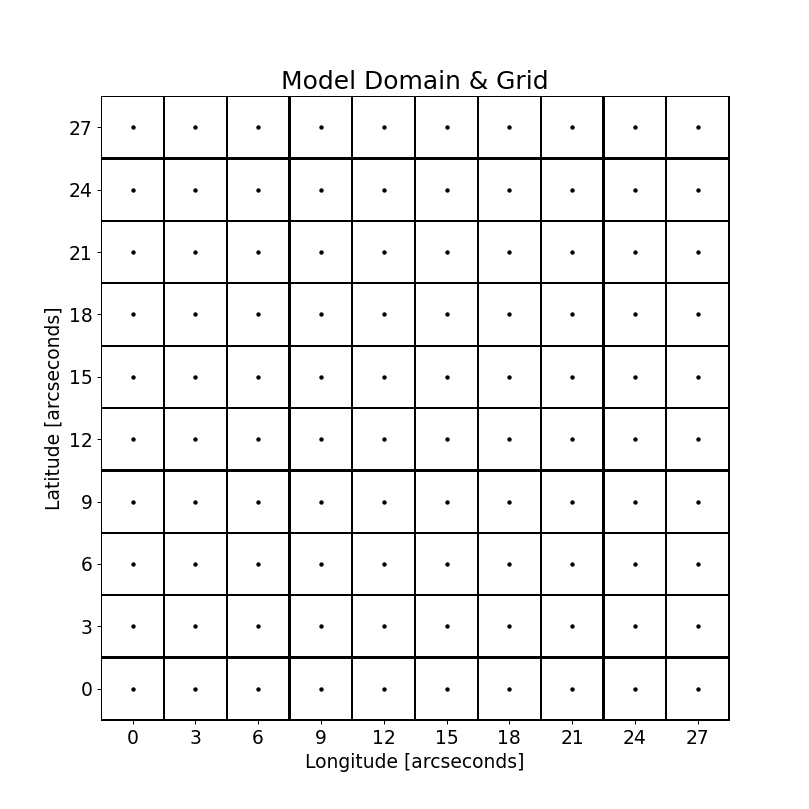

In [12]:
# Make a plot showing the domain, the grid cells and the grid points:

# Create a new figure:
plt.figure(figsize=[9,9])

# Title for the plot:
plt.title("Model Domain & Grid", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Create an array with zero's in order to plot the back ground color of the grid cells:
G = np.zeros((n_row,n_col))

# Plot the grid cells with a white background:
c = plt.pcolormesh(x, y, G, edgecolors='black', linewidths=1, cmap = 'Greys')

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [13]:
############################################################################################################################
##################################################### T I M E  F R A M E ###################################################
############################################################################################################################

In [14]:
### Define the time frame:

# Duration of a single model run:
Time_span = 365   # in days

# Temporal resolution:
Time_res  = 1     # in days

# Numer of time steps:
Time_range = int(Time_span/Time_res)

# Create an array to store the time steps in:
Time = np.arange(0,Time_span,Time_res)

print('Time steps:')
print(Time)
print(' ')
print('Time range, i.e. number of time steps:')
print(Time_range)

Time steps:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 24

In [15]:
############################################################################################################################
####################################################### L A N D  U S E #####################################################
############################################################################################################################

In [16]:
# The land use map indicates for each grid cell in the domain the type of land use

# The Trash-Tracker distuingish between 6 types of land use, which have the following id's:

# River               = 0
# Bare land           = 100
# Forest              = 200
# Agricultural land   = 300
# Urban               = 400
# Grass/shrubland     = 500

#---------------------------------------------------------------------------------------------------------------------------

# Here we manually create the land use map:

# The LU_0 array is made by hand and is meant as a (geographical) map overlay (i.e. I want in the upper left corner of 
# the map a land use of 200 - forest):

LU_0 = np.array([[200, 300, 300, 300, 0, 0, 200, 400, 400, 300],\
                 [  0, 300, 400, 400, 0, 0, 200, 400, 400,   0],\
                 [  0, 300, 400, 400, 0, 0, 200, 200,   0,   0],\
                 [  0,   0, 500, 500, 0, 0, 200,   0,   0, 500],\
                 [500,   0,   0, 500, 0, 0,   0,   0, 500, 500],\
                 [500,   0,   0, 500, 0, 0,   0, 500, 500, 500],\
                 [400, 400,   0,   0, 0, 0, 300, 300, 300, 300],\
                 [400, 400, 200,   0, 0, 0, 300, 400, 400, 400],\
                 [300, 300, 200, 200, 0, 0, 300, 400, 400, 400],\
                 [100, 100, 100, 100, 0, 0, 100, 100, 100, 100]])

# The origin of my geographical map is in the lower left corner, while the origin of a numpy array is the upper left corner
# (i.e. i=0, j=0). Therefore in order to get the map as I want it, the LU_0 array must be flipped over the 0 axis. In this 
# way the LU array is created and later on when the LU array is plotted, it plots it in the correct way, such that the LU_0
# array is a (geographical) map overlay. See also User's Manual for detailed explaination.

LU = np.flip(LU_0, axis=0)

print('LU:')
print(LU)


LU:
[[100 100 100 100   0   0 100 100 100 100]
 [300 300 200 200   0   0 300 400 400 400]
 [400 400 200   0   0   0 300 400 400 400]
 [400 400   0   0   0   0 300 300 300 300]
 [500   0   0 500   0   0   0 500 500 500]
 [500   0   0 500   0   0   0   0 500 500]
 [  0   0 500 500   0   0 200   0   0 500]
 [  0 300 400 400   0   0 200 200   0   0]
 [  0 300 400 400   0   0 200 400 400   0]
 [200 300 300 300   0   0 200 400 400 300]]


In [17]:
# If you don't want to make the land use map by hand. You can of course use a real land cover data set. In that case 
# upload the land use data file and make sure you use the land use id's (see above) and store these in a 2D array called LU

<IPython.core.display.Javascript object>


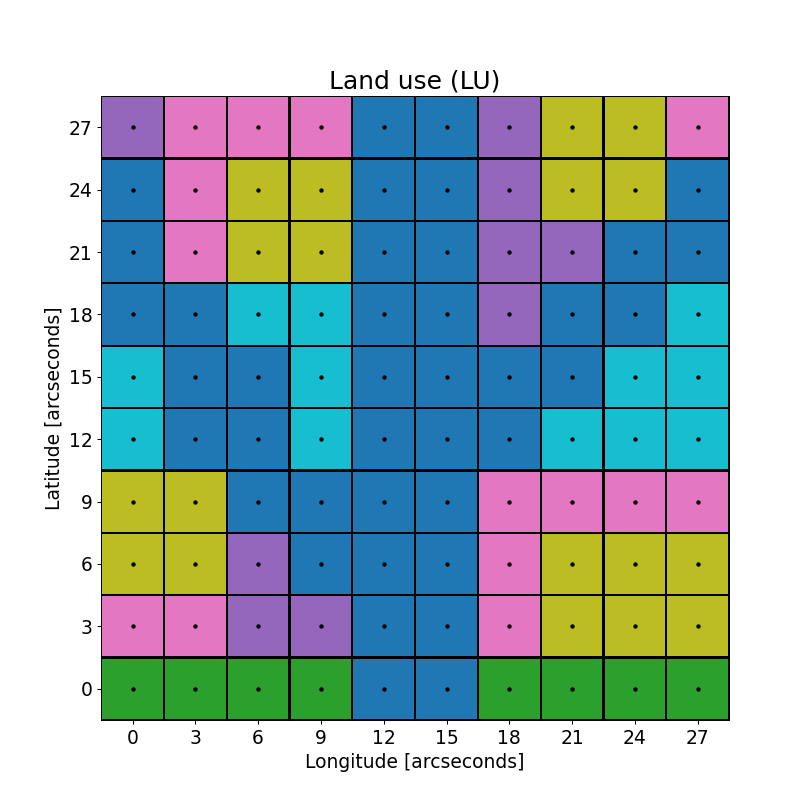

In [18]:
# Make a plot showing the land use map:

# Create a new figure:
plt.figure(figsize=[9,9])

# Title for the plot:
plt.title("Land use (LU)", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the land use id's:
c = plt.pcolormesh(x, y, LU, edgecolors='black', linewidths=1, cmap = 'tab10')

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [19]:
############################################################################################################################
################################################### P O P U L A T I O N ####################################################
############################################################################################################################

In [20]:
# The population map indicates for each grid cell in the domain the number of inhabitants

# Cities:                        we chose population densities of 40 to 50 people per grid cell
# Villages:                      we chose population densities of 10 tp 30 people per grid cell
# Argicultural lands:            we chose population densities of 0 to 4 farmers per grid cell
# Forest:                        we chose population densities of 0.1 people per grid cell to mimic littering as caused 
#                                by recreational activities
# Bare land & Grass/shrubland:   we chose population densities of 0 people per grid cell

#---------------------------------------------------------------------------------------------------------------------------

# Here we manually create the population map:

# The Y_0 is made by hand and is meant as a (geographical) map overlay (i.e. I want in the upper left corner of the map
# a population of 0.10):

Y_0 = np.array([ [0.10,    4,    0,    2,    0,    0, 0.10,   10,    10,    0],\
                 [   0,    0,   20,   20,    0,    0, 0.10,   10,    10,    0],\
                 [   0,    0,   20,   20,    0,    0, 0.10, 0.10,     0,    0],\
                 [   0,    0,    0,    0,    0,    0, 0.10,    0,     0,    0],\
                 [   0,    0,    0,    0,    0,    0,    0,    0,     0,    0],\
                 [   0,    0,    0,    0,    0,    0,    0,    0,     0,    0],\
                 [  30,   30,    0,    0,    0,    0,    0,    0,     4,    0],\
                 [  30,   30, 0.10,    0,    0,    0,    0,   40,    40,   40],\
                 [   2,    0, 0.10, 0.10,    0,    0,    4,   40,    50,   50],\
                 [   0,    0,    0,    0,    0,    0,    0,    0,     0,    0]])

# The origin of my geographical map is in the lower left corner, while the origin of a numpy array is the upper left corner
# (i.e. i=0, j=0). Therefore in order to get the map as I want it, the Y_0 array must be flipped over the 0 axis. In this 
# way the Y array is created and later on when the Y array is plotted, it plots it in the correct way, such that the Y_0
# array is a (geographical) map overlay. See also User's Manual for detailed explaination.

Y = np.flip(Y_0, axis=0)

print('Y:')
print(Y)


Y:
[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 2.   0.   0.1  0.1  0.   0.   4.  40.  50.  50. ]
 [30.  30.   0.1  0.   0.   0.   0.  40.  40.  40. ]
 [30.  30.   0.   0.   0.   0.   0.   0.   4.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.1  0.   0.   0. ]
 [ 0.   0.  20.  20.   0.   0.   0.1  0.1  0.   0. ]
 [ 0.   0.  20.  20.   0.   0.   0.1 10.  10.   0. ]
 [ 0.1  4.   0.   2.   0.   0.   0.1 10.  10.   0. ]]


In [21]:
# If you don't want to make the population map by hand. You can of course use a population density data set. In that case 
# upload the popolation data file and make sure the values indicate the number of inhabitants for each grid cell in the 
# model domain and store these values in a 2D array called Y

<IPython.core.display.Javascript object>


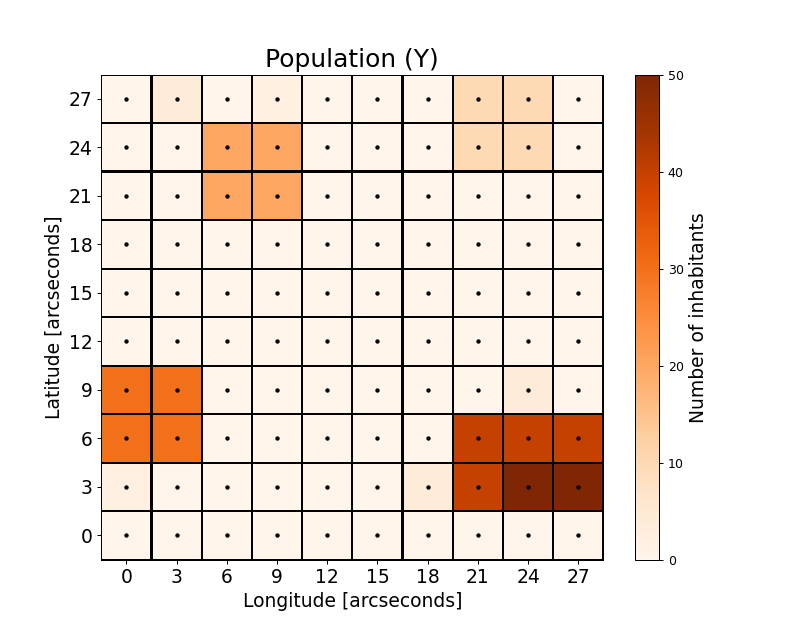

In [22]:
# Make a plot showing the population map:

# Create a new figure:
plt.figure(figsize=[9,7])

# Title for the plot:
plt.title("Population (Y)", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the number of inhabitants:
c = plt.pcolormesh(x, y, Y, edgecolors='black', linewidths=1, cmap = 'Oranges')

# Add a color scale bar:
cbar = plt.colorbar()

# Assign a label to the color scale bar:
cbar.set_label('Number of inhabitants', size = 15)

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [23]:
############################################################################################################################
################################### T O P O G R A P H Y  &  T E R R A I N  S L O P E S #####################################
############################################################################################################################

In [24]:
# The topography map indicates for each grid cell in the domain the heigth above sea level in meters

#---------------------------------------------------------------------------------------------------------------------------

# Here we manually create the topography map:

# The Z_0 is made by hand and is meant as a (geographical) map overlay (i.e. I want in the upper right corner of the map
# a topography of 15 meters above sea level):

Z_0 = np.array([[10  , 9.1 , 7.3 , 3.1 , 0 , 0 , 4.6 , 5.5 , 5.0  ,  15],\
                [0   , 7.8 , 5.2 , 2.4 , 0 , 0 , 3.8 , 4.7 , 5.1 ,   0],\
                [0   , 6.9 , 4.6 , 2.1 , 0 , 0 , 2.5 , 3.0 , 0   ,   0],\
                [0   , 0   , 4.3 , 2.2 , 0 , 0 , 1.6 , 0   , 0   ,  10],\
                [6.2 , 0   , 0   , 1.3 , 0 , 0 , 0   , 0   , 7.4 , 8.6],\
                [6.1 , 0   , 0   , 1.1 , 0 , 0 , 0   , 2.8 , 5.1 , 8.3],\
                [4.9 , 4.6 , 0   , 0   , 0 , 0 , 1.9 , 2.3 , 5.0 , 8.1],\
                [4.0 , 3.2 , 2.1 , 0   , 0 , 0 , 1.9 , 5.1 , 5.1 , 5.2],\
                [4.5 , 3.3 , 2.4 , 1.2 , 0 , 0 , 1.7 , 5.3 , 5.3 , 5.3],\
                [1.0 , 0.9 , 0.8 , 0.5 , 0 , 0 , 0.4 , 0.7 , 1.0 , 1.1]])

# The origin of my geographical map is in the lower left corner, while the origin of a numpy array is the upper left corner
# (i.e. i=0, j=0). Therefore in order to get the map as I want it, the Z_0 array must be flipped over the 0 axis. In this 
# way the Z array is created and later on when the Z array is plotted, it plots it in the correct way, such that the Z_0
# array is a (geographical) map overlay. See also User's Manual for detailed explaination.

Z = np.flip(Z_0, axis=0)

print('Z:')
print(Z)


Z:
[[ 1.   0.9  0.8  0.5  0.   0.   0.4  0.7  1.   1.1]
 [ 4.5  3.3  2.4  1.2  0.   0.   1.7  5.3  5.3  5.3]
 [ 4.   3.2  2.1  0.   0.   0.   1.9  5.1  5.1  5.2]
 [ 4.9  4.6  0.   0.   0.   0.   1.9  2.3  5.   8.1]
 [ 6.1  0.   0.   1.1  0.   0.   0.   2.8  5.1  8.3]
 [ 6.2  0.   0.   1.3  0.   0.   0.   0.   7.4  8.6]
 [ 0.   0.   4.3  2.2  0.   0.   1.6  0.   0.  10. ]
 [ 0.   6.9  4.6  2.1  0.   0.   2.5  3.   0.   0. ]
 [ 0.   7.8  5.2  2.4  0.   0.   3.8  4.7  5.1  0. ]
 [10.   9.1  7.3  3.1  0.   0.   4.6  5.5  5.  15. ]]


In [25]:
# If you don't want to make the topography map by hand. You can of course use a topography data set. In that case upload 
# the topography data file and make sure the values indicate the (average) height above sea level (m) for the grid cells 
# in the model domain and store these values in a 2D array called Z

<IPython.core.display.Javascript object>


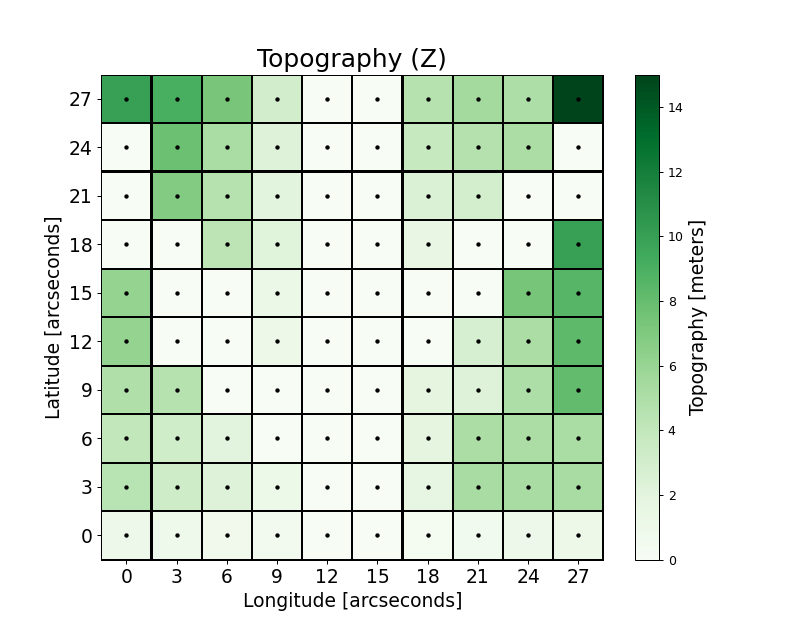

In [26]:
# Make a plot showing the topography map:

# Create a new figure:
plt.figure(figsize=[9,7])

# Title for the plot:
plt.title("Topography (Z)", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the topography values:
c = plt.pcolormesh(x, y, Z, edgecolors='black', linewidths=1, cmap = 'Greens')

# Add a color scale bar:
cbar = plt.colorbar()

# Assign a label to the color scale bar:
cbar.set_label('Topography [meters]', size = 15)

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [27]:
# Calculate the steepest terrain slope values and directions for each grid cell in the domain:

# The slope in a certain direction is referred to as the 'distance weight drop' (dwd) in that direction

# Labels for the direction (q) of the steepest slope for a grid cell 'x':

# 1000    slope runs downhill towards the northwest
# 1001    slope runs downhill towards the north
# 1002    slope runs downhill towards the northeast
# 1003    slope runs downhill towards the east
# 1004    slope runs downhill towards the southeast
# 1005    slope runs downhill towards the south
# 1006    slope runs downhill towards the southwest
# 1007    slope runs downhill towards the west

#   |--------|--------|--------|
#   |        |        |        |
#   |  1000  |  1001  |  1002  |
#   |        |        |        |
#   |--------|--------|--------|
#   |        |        |        |
#   |  1007  |   x    |  1003  |
#   |        |        |        |
#   |--------|--------|--------|
#   |        |        |        |
#   |  1006  |  1005  |  1004  |
#   |        |        |        |
#   |--------|--------|--------|

# See also User's Manual for detailed explaination.


Q = np.empty((n_row, n_col))
q = np.empty((n_row, n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        # Cell in the lower left corner of the domain:
        if (i == 0 and j == 0):    
            dwd = np.zeros(3)
            # Topography gradient when moving towards the cell to the north:
            dwd[0] = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
            # Topography gradient when moving towards the cell to the north-east:
            dwd[1] = (Z[i+1,j+1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the east:
            dwd[2] = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
            Q[i,j] = np.min(dwd)
            if (dwd[0] == np.min(dwd)):
                q[i,j] = 1001  
            if (dwd[1] == np.min(dwd)):
                q[i,j] = 1002   
            if (dwd[2] == np.min(dwd)):
                q[i,j] = 1003
            # print('i =', i, 'j =', j, 'dwd =', dwd)
            
        # Cell in the upper left corner of the domain:        
        if (i == (n_row-1) and j == 0):    
            dwd = np.zeros(3)
            # Topography gradient when moving towards the cell to the east:
            dwd[0] = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
            # Topography gradient when moving towards the cell to the south-east:
            dwd[1] = (Z[i-1,j+1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the south:
            dwd[2] = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
            Q[i,j] = np.min(dwd)
            if (dwd[0] == np.min(dwd)):
                q[i,j] = 1003 
            if (dwd[1] == np.min(dwd)):
                q[i,j] = 1004
            if (dwd[2] == np.min(dwd)):
                q[i,j] = 1005
            # print('i =', i, 'j =', j, 'dwd =', dwd)
            
        # Cell in the upper right corner of the domain:
        if (i == (n_row-1) and j == (n_col-1)):    
            dwd = np.zeros(3)
            # Topography gradient when moving towards the cell to the south:
            dwd[0] = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
            # Topography gradient when moving towards the cell to the south-west:
            dwd[1] = (Z[i-1,j]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the west:
            dwd[2] = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
            Q[i,j] = np.min(dwd)
            if (dwd[0] == np.min(dwd)):
                q[i,j] = 1005 
            if (dwd[1] == np.min(dwd)):
                q[i,j] = 1006
            if (dwd[2] == np.min(dwd)):
                q[i,j] = 1007
            # print('i =', i, 'j =', j, 'dwd =', dwd)
            
        # Cell in the lower right corner of the domain:
        if (i == 0 and j == (n_col-1)):    
            dwd = np.zeros(3)
            # Topography gradient when moving towards the cell to the west:
            dwd[0] = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
            # Topography gradient when moving towards the cell to the north-west:
            dwd[1] = (Z[i+1,j-1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the north:
            dwd[2] = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
            Q[i,j] = np.min(dwd)
            if (dwd[0] == np.min(dwd)):
                q[i,j] = 1007 
            if (dwd[1] == np.min(dwd)):
                q[i,j] = 1000
            if (dwd[2] == np.min(dwd)):
                q[i,j] = 1001
            # print('i =', i, 'j =', j, 'dwd =', dwd)
            
        # Cells along the western boundary of the domain:
        if (i != 0 and i != (n_row-1) and j == 0):    
            dwd = np.zeros(5)
            # Topography gradient when moving towards the cell to the north:
            dwd[0] = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
            # Topography gradient when moving towards the cell to the north-east:
            dwd[1] = (Z[i+1,j+1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the east:
            dwd[2] = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
            # Topography gradient when moving towards the cell to the south-east:
            dwd[3] = (Z[i-1,j+1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the south:
            dwd[4] = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
            Q[i,j] = np.min(dwd)
            if (dwd[0] == np.min(dwd)):
                q[i,j] = 1001  
            if (dwd[1] == np.min(dwd)):
                q[i,j] = 1002   
            if (dwd[2] == np.min(dwd)):
                q[i,j] = 1003
            if (dwd[3] == np.min(dwd)):
                q[i,j] = 1004
            if (dwd[4] == np.min(dwd)):
                q[i,j] = 1005
            # print('i =', i, 'j =', j, 'dwd =', dwd)
            
        # Cells along the northern boundary of the domain:
        if (i == (n_row-1) and j != 0 and j != (n_col-1)):    
            dwd = np.zeros(5)
            # Topography gradient when moving towards the cell to the east:
            dwd[0] = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
            # Topography gradient when moving towards the cell to the south-east:
            dwd[1] = (Z[i-1,j+1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the south:
            dwd[2] = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
            # Topography gradient when moving towards the cell to the south-west:
            dwd[3] = (Z[i-1,j]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the west:
            dwd[4] = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
            Q[i,j] = np.min(dwd)
            if (dwd[0] == np.min(dwd)):
                q[i,j] = 1003  
            if (dwd[1] == np.min(dwd)):
                q[i,j] = 1004   
            if (dwd[2] == np.min(dwd)):
                q[i,j] = 1005
            if (dwd[3] == np.min(dwd)):
                q[i,j] = 1006
            if (dwd[4] == np.min(dwd)):
                q[i,j] = 1007
            # print('i =', i, 'j =', j, 'dwd =', dwd)
            
        # Cells along the eastern boundary of the domain:
        if (i != 0 and i != (n_row-1) and j == (n_col-1)):    
            dwd = np.zeros(5)
            # Topography gradient when moving towards the cell to the south:
            dwd[0] = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
            # Topography gradient when moving towards the cell to the south-west:
            dwd[1] = (Z[i-1,j]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the west:
            dwd[2] = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
            # Topography gradient when moving towards the cell to the north-west:
            dwd[3] = (Z[i+1,j-1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the north:
            dwd[4] = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
            Q[i,j] = np.min(dwd)
            if (dwd[0] == np.min(dwd)):
                q[i,j] = 1005  
            if (dwd[1] == np.min(dwd)):
                q[i,j] = 1006   
            if (dwd[2] == np.min(dwd)):
                q[i,j] = 1007
            if (dwd[3] == np.min(dwd)):
                q[i,j] = 1000
            if (dwd[4] == np.min(dwd)):
                q[i,j] = 1001
            # print('i =', i, 'j =', j, 'dwd =', dwd)
            
        # Cells along the southern boundary of the domain:
        if (i == 0 and j != 0 and j != (n_col-1)):    
            dwd = np.zeros(5)
            # Topography gradient when moving towards the cell to the west:
            dwd[0] = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
            # Topography gradient when moving towards the cell to the north-west:
            dwd[1] = (Z[i+1,j-1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the north:
            dwd[2] = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
            # Topography gradient when moving towards the cell to the north-east:
            dwd[3] = (Z[i+1,j+1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the east:
            dwd[4] = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
            Q[i,j] = np.min(dwd)
            if (dwd[0] == np.min(dwd)):
                q[i,j] = 1007  
            if (dwd[1] == np.min(dwd)):
                q[i,j] = 1000   
            if (dwd[2] == np.min(dwd)):
                q[i,j] = 1001
            if (dwd[3] == np.min(dwd)):
                q[i,j] = 1002
            if (dwd[4] == np.min(dwd)):
                q[i,j] = 1003
            # print('i =', i, 'j =', j, 'dwd =', dwd)
            
        # Cells in the interior of the domain:
        if (i != 0 and i != (n_row-1) and j != 0 and j != (n_col-1)):
            dwd = np.zeros(8)
            
            # Topography gradient when moving towards the cell to the north-west:
            dwd[0] = (Z[i+1,j-1]-Z[i,j])/(d_m) 
            # Topography gradient when moving towards the cell to the north: 
            dwd[1] = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
            # Topography gradient when moving towards the cell to the north-east:
            dwd[2] = (Z[i+1,j+1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the east:
            dwd[3] = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
            # Topography gradient when moving towards the cell to the south-east:
            dwd[4] = (Z[i-1,j+1]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the south:
            dwd[5] = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
            # Topography gradient when moving towards the cell to the south-west:
            dwd[6] = (Z[i-1,j]-Z[i,j])/(d_m)
            # Topography gradient when moving towards the cell to the west:
            dwd[7] = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
            Q[i,j] = np.min(dwd)
            if (dwd[0] == np.min(dwd)):
                q[i,j] = 1000  
            if (dwd[1] == np.min(dwd)):
                q[i,j] = 1001   
            if (dwd[2] == np.min(dwd)):
                q[i,j] = 1002
            if (dwd[3] == np.min(dwd)):
                q[i,j] = 1003
            if (dwd[4] == np.min(dwd)):
                q[i,j] = 1004
            if (dwd[5] == np.min(dwd)):
                q[i,j] = 1005
            if (dwd[6] == np.min(dwd)):
                q[i,j] = 1006
            if (dwd[7] == np.min(dwd)):
                q[i,j] = 1007
            # print('i =', i, 'j =', j, 'dwd =', dwd)

Q = np.round(Q,decimals=3)
            
q_0 = np.flip(q, axis=0)
Q_0 = np.flip(Q, axis=0)


print('q:')
print(q)
print('')
print('Q:')
print(Q)
print('')
print('Note! A postive Q value means that all neighbouring cells have a higher topography than this cell.')
print('In that case the Q gives the value of the shallowest UPHILL slope and the corresponding q gives the direction \
of that slope.')


q:
[[1003. 1003. 1003. 1003. 1003. 1001. 1007. 1007. 1007. 1007.]
 [1005. 1005. 1002. 1003. 1006. 1007. 1007. 1005. 1005. 1005.]
 [1003. 1002. 1003. 1004. 1007. 1007. 1007. 1007. 1000. 1000.]
 [1002. 1003. 1004. 1007. 1007. 1007. 1007. 1000. 1007. 1007.]
 [1003. 1004. 1007. 1007. 1006. 1007. 1007. 1007. 1000. 1007.]
 [1003. 1006. 1007. 1007. 1006. 1007. 1007. 1007. 1007. 1000.]
 [1004. 1007. 1007. 1003. 1006. 1007. 1007. 1006. 1007. 1001.]
 [1005. 1007. 1003. 1003. 1006. 1007. 1007. 1005. 1006. 1001.]
 [1005. 1007. 1003. 1003. 1006. 1007. 1007. 1004. 1005. 1006.]
 [1005. 1004. 1003. 1003. 1006. 1007. 1007. 1007. 1004. 1005.]]

Q:
[[-0.001 -0.001 -0.003 -0.006  0.     0.    -0.004 -0.003 -0.003 -0.001]
 [-0.039 -0.027 -0.019 -0.013  0.     0.    -0.019 -0.051 -0.048 -0.047]
 [-0.009 -0.025 -0.023  0.     0.     0.    -0.021 -0.036 -0.022 -0.002]
 [-0.038 -0.051  0.     0.     0.     0.    -0.021 -0.018 -0.03  -0.034]
 [-0.068  0.     0.    -0.012  0.     0.     0.    -0.031 -0.04  -0.03

In [28]:
# Make vector a field for the steepest terrain slope directions, in which U contains the zonal components of the vectors 
# and V the meridional:

U = np.empty((n_row,n_col))
V = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if(LU[i,j] == 0):
            U[i,j] = 0
            V[i,j] = 0
        
        else:
        
            if (q[i,j] == 1000):
                U[i,j] = -1
                V[i,j] = 1
            if (q[i,j] == 1001):
                U[i,j] = 0
                V[i,j] = 1
            if (q[i,j] == 1002):
                U[i,j] = 1
                V[i,j] = 1
            if (q[i,j] == 1003):
                U[i,j] = 1
                V[i,j] = 0
            if (q[i,j] == 1004):
                U[i,j] = 1
                V[i,j] = -1
            if (q[i,j] == 1005):
                U[i,j] = 0
                V[i,j] = -1
            if (q[i,j] == 1006):
                U[i,j] = -1
                V[i,j] = -1
            if (q[i,j] == 1007):
                U[i,j] = -1
                V[i,j] = 0
                

<IPython.core.display.Javascript object>


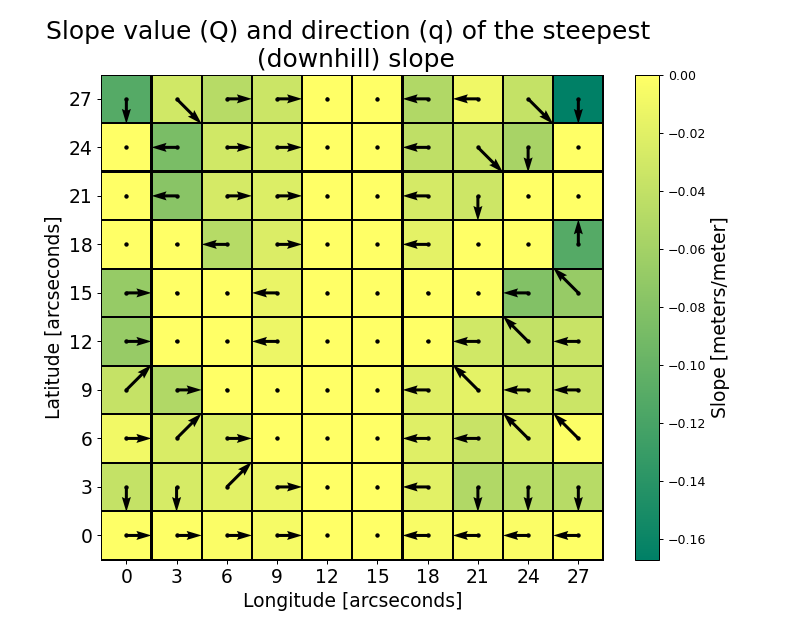

In [29]:
# Make a plot showing the magnitude and directions of the steepest (downhill) terrain slopes: 

# Create a new figure:
plt.figure(figsize=[9,7])

# Title for the plot:
plt.title("Slope value (Q) and direction (q) of the steepest \n%s" % "\n".join(wrap(" (downhill) slope", width=60)), size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the steepest (downhill) terrain slope magnitudes:
c = plt.pcolormesh(x, y, Q, edgecolors='black', linewidths=1, cmap = 'summer')

# Add a color scale bar:
cbar = plt.colorbar()

# Assign a label to the color scale bar:
cbar.set_label('Slope [meters/meter]', size = 15)

# Plot vectors that correspond to the steepest (downhill) slope directions:
plt.quiver(xx,yy, U, V, color = 'black', pivot='tail', scale = 20)

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [30]:
############################################################################################################################
################################################# R I V E R  F L O W #######################################################
############################################################################################################################

In [31]:
# Manually create river flow direction data:

# Labels for the river flow direction in grid cell 'x':

# 3000    river water flows towards the northwest
# 3001    river water flows towards the north
# 3002    river water flows towards the northeast
# 3003    river water flows towards the east
# 3004    river water flows towards the southeast
# 3005    river water flows towards the south
# 3006    river water flows towards the southwest
# 3007    river water flows towards the west

#   |--------|--------|--------|
#   |        |        |        |
#   |  3000  |  3001  |  3002  |
#   |        |        |        |
#   |--------|--------|--------|
#   |        |        |        |
#   |  3007  |   x    |  3003  |
#   |        |        |        |
#   |--------|--------|--------|
#   |        |        |        |
#   |  3006  |  3005  |  3004  |
#   |        |        |        |
#   |--------|--------|--------|


# The ri_0 is made by hand and is meant as a (geographical) map overlay:

ri_0 = np.array([[   0,    0,    0,    0, 3005, 3005,    0,    0,    0,    0],\
                 [3005,    0,    0,    0, 3005, 3005,    0,    0,    0, 3005],\
                 [3005,    0,    0,    0, 3005, 3005,    0,    0, 3005, 3007],\
                 [3003, 3005,    0,    0, 3005, 3005,    0, 3005, 3007,    0],\
                 [   0, 3003, 3005,    0, 3005, 3005, 3005, 3007,    0,    0],\
                 [   0, 3003, 3005,    0, 3005, 3005, 3007,    0,    0,    0],\
                 [   0,    0, 3003, 3005, 3005, 3005,    0,    0,    0,    0],\
                 [   0,    0,    0, 3003, 3005, 3005,    0,    0,    0,    0],\
                 [   0,    0,    0,    0, 3005, 3005,    0,    0,    0,    0],\
                 [   0,    0 ,   0,    0, 3005, 3005,    0,    0,    0,    0]])

# The origin of my geographical map is in the lower left corner, while the origin of a numpy array is the upper left corner
# (i.e. i=0, j=0). Therefore in order to get the map as I want it, the ri_0 array must be flipped over the 0 axis. In this 
# way the ri array is created and later on when the ri array is plotted, it plots it in the correct way, such that the ri_0
# array is a (geographical) map overlay. See also User's Manual for detailed explaination.

ri = np.flip(ri_0, axis=0)

print('ri:')
print(ri)


ri:
[[   0    0    0    0 3005 3005    0    0    0    0]
 [   0    0    0    0 3005 3005    0    0    0    0]
 [   0    0    0 3003 3005 3005    0    0    0    0]
 [   0    0 3003 3005 3005 3005    0    0    0    0]
 [   0 3003 3005    0 3005 3005 3007    0    0    0]
 [   0 3003 3005    0 3005 3005 3005 3007    0    0]
 [3003 3005    0    0 3005 3005    0 3005 3007    0]
 [3005    0    0    0 3005 3005    0    0 3005 3007]
 [3005    0    0    0 3005 3005    0    0    0 3005]
 [   0    0    0    0 3005 3005    0    0    0    0]]


In [32]:
# Make vector a field for the river flow directions, in which uu contains the zonal components 
# of the vectors and vv the meridional:

uu = np.empty((n_row,n_col))
vv = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (ri[i,j] == 0):
            uu[i,j] = 0
            vv[i,j] = 0
        if (ri[i,j] == 3000):
            uu[i,j] = -1
            vv[i,j] = 1
        if (ri[i,j] == 3001):
            uu[i,j] = 0
            vv[i,j] = 1
        if (ri[i,j] == 3002):
            uu[i,j] = 1
            vv[i,j] = 1
        if (ri[i,j] == 3003):
            uu[i,j] = 1
            vv[i,j] = 0
        if (ri[i,j] == 3004):
            uu[i,j] = 1
            vv[i,j] = -1
        if (ri[i,j] == 3005):
            uu[i,j] = 0
            vv[i,j] = -1
        if (ri[i,j] == 3006):
            uu[i,j] = -1
            vv[i,j] = -1
        if (ri[i,j] == 3007):
            uu[i,j] = -1
            vv[i,j] = 0
            

In [33]:
# If you don't want to make the river flow directions map by hand. You can of course use a river flow data set. In that case 
# upload the river flow data file and make sure the values indicate the river flow direction for each river grid cell in the 
# model domain and store these values in a 2D array called ri. Note that the directions of motion must be restricted to 8:
# N, NE, E, SE, S, SW, W, NW

<IPython.core.display.Javascript object>


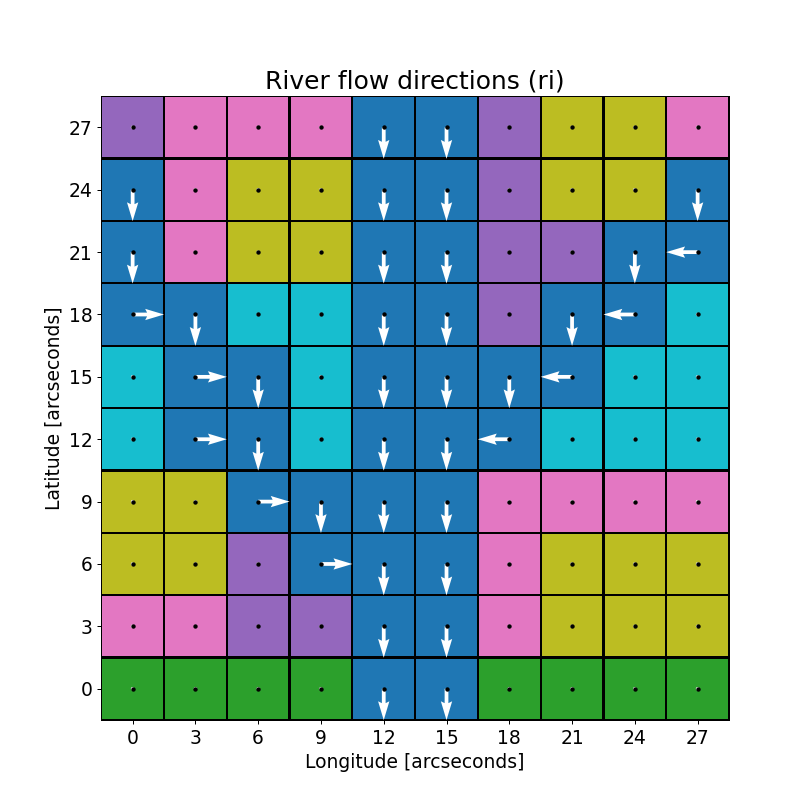

In [34]:
# Make a plot showing the river flow directions:

# Create a new figure:
plt.figure(figsize=[9,9])

# Title for the plot:
plt.title("River flow directions (ri)", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the land use id's:
c = plt.pcolormesh(x, y, LU, edgecolors='black', linewidths=1, cmap = 'tab10')

# Plot vectors that correspond to the river flow directions:
plt.quiver(xx,yy, uu, vv, color = 'white', pivot='tail', scale = 20)

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [35]:
############################################################################################################################
################################################### W I N D ################################################################
############################################################################################################################

In [36]:
# Here we use data on wind speeds recorded by the Royal Netherlands Meteorological Institute (KNMI):

# We use hourly averaged wind speeds recorded by weather station "De Bilt" (latitude: 52.1015441 ; longitude: 5.1779992)
# in the period 1981-2000.

# Data source: http://projects.knmi.nl/klimatologie/frequentietabellen/maand.cgi


# The hourly averaged wind speeds fall in one of the following 20 wind speeds classes:

# Wind speeds class 1:    wind speeds from   0.0   to   0.4   meter/second
# Wind speeds class 2:    wind speeds from   0.5   to   1.4   meter/second
# Wind speeds class 3:    wind speeds from   1.5   to   2.4   meter/second
# Wind speeds class 4:    wind speeds from   2.5   to   3.4   meter/second
# Wind speeds class 5:    wind speeds from   3.5   to   4.4   meter/second
# Wind speeds class 6:    wind speeds from   4.5   to   5.4   meter/second
# Wind speeds class 7:    wind speeds from   5.5   to   6.4   meter/second
# Wind speeds class 8:    wind speeds from   6.5   to   7.4   meter/second
# Wind speeds class 9:    wind speeds from   7.5   to   8.4   meter/second
# Wind speeds class 10:   wind speeds from   8.5   to   9.4   meter/second
# Wind speeds class 11:   wind speeds from   9.5   to   10.4  meter/second
# Wind speeds class 12:   wind speeds from   10.5  to   11.4  meter/second
# Wind speeds class 13:   wind speeds from   11.5  to   12.4  meter/second
# Wind speeds class 14:   wind speeds from   12.5  to   13.4  meter/second
# Wind speeds class 15:   wind speeds from   13.5  to   14.4  meter/second
# Wind speeds class 16:   wind speeds from   14.5  to   15.4  meter/second
# Wind speeds class 17:   wind speeds from   15.5  to   16.4  meter/second
# Wind speeds class 18:   wind speeds from   16.5  to   17.4  meter/second
# Wind speeds class 19:   wind speeds from   17.5  to   18.4  meter/second
# Wind speeds class 20:   wind speeds from   18.5  to   19.4  meter/second

W_speed_classes = np.arange(1,21,1)

print('The W_speed_classes array:', W_speed_classes)


# The frequency with which wind speeds fall in certain wind speed classes differs from month to month

# The following 12 arrays give for each month the frequency with which the wind speed fell in the wind speed classes
# during the period 1981-2000 
# The first element in the array gives the frequency with which the hourly averaged wind speed is between 0.0 and 0.4 m/s 
# for that month 


W_speed_freq_Jan = np.array([0.0034, 0.0938, 0.1517, 0.1680, 0.1639, 0.1401, 0.1049, 0.0761, 0.0470, 0.0272, \
                             0.0142, 0.0047, 0.0032, 0.0009, 0.0005, 0.0001, 0.0001, 0.0000, 0.0002, 0.0000])
#print(W_speed_freq_Jan)

W_speed_freq_Feb = np.array([0.0032, 0.0858, 0.1578, 0.1993, 0.1700, 0.1434, 0.0916, 0.0645, 0.0428, 0.0255, \
                             0.0097, 0.0032, 0.0024, 0.0005, 0.0003, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_Feb)

W_speed_freq_Mar = np.array([0.0055, 0.0995, 0.1610, 0.1960, 0.1739, 0.1284, 0.0925, 0.0690, 0.0355, 0.0190, \
                             0.0117, 0.0050, 0.0021, 0.0007, 0.0002, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_Mar)

W_speed_freq_Apr = np.array([0.0026, 0.1181, 0.1900, 0.2136, 0.1878, 0.1352, 0.0815, 0.0442, 0.0187, 0.0056, \
                             0.0021, 0.0001, 0.0002, 0.0000, 0.0002, 0.0000, 0.0001, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_Apr)

W_speed_freq_May = np.array([0.0043, 0.1234, 0.2076, 0.2357, 0.1957, 0.1281, 0.0608, 0.0297, 0.0110, 0.0026, \
                             0.0007, 0.0001, 0.0002, 0.0001, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_May)

W_speed_freq_Jun = np.array([0.0044, 0.1231, 0.2238, 0.2531, 0.2088, 0.1194, 0.0471, 0.0147, 0.0042, 0.0011, \
                             0.0003, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_Jun)

W_speed_freq_Jul = np.array([0.0059, 0.1419, 0.2450, 0.2466, 0.1915, 0.1117, 0.0413, 0.0118, 0.0034, 0.0009, \
                             0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_Jul)

W_speed_freq_Aug = np.array([0.0119, 0.1903, 0.2586, 0.2302, 0.1681, 0.0840, 0.0370, 0.0156, 0.0033, 0.0009, \
                             0.0001, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_Aug)

W_speed_freq_Sep = np.array([0.0116, 0.1926, 0.2435, 0.2251, 0.1544, 0.0959, 0.0483, 0.0200, 0.0066, 0.0016, \
                             0.0004, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_Sep)

W_speed_freq_Oct = np.array([0.0066, 0.1428, 0.2118, 0.2122, 0.1749, 0.1139, 0.0644, 0.0388, 0.0214, 0.0068, \
                             0.0042, 0.0013, 0.0007, 0.0002, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_Oct)

W_speed_freq_Nov = np.array([0.0041, 0.1185, 0.2070, 0.1988, 0.1688, 0.1318, 0.0874, 0.0494, 0.0235, 0.0061, \
                             0.0024, 0.0010, 0.0006, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0000, 0.0000])
#print(W_speed_freq_Nov)

W_speed_freq_Dec = np.array([0.0040, 0.1040, 0.1774, 0.1873, 0.1600, 0.1350, 0.0976, 0.0630, 0.0357, 0.0178, \
                             0.0101, 0.0048, 0.0024, 0.0007, 0.0001, 0.0001, 0.0000, 0.0000, 0.0000, 0.0000])
#print(W_speed_freq_Dec)


The W_speed_classes array: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [37]:
# Here the code randomly picks a wind speed value for each time step, whereby it takes the monthly wind speed frequencies
# into account:

w_speed_value = np.empty(Time_range)

for t in Time:
    
    if (t >= 0 and t <= 30):
        
        #print('t = ', t)
        #print('It is January!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Jan)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 31 and t <= 58): # not a leap year!
        
        #print('t = ', t)
        #print('It is February!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Feb)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 59 and t <= 89):
        
        #print('t = ', t)
        #print('It is March!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Mar)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 90 and t <= 119):
        
        #print('t = ', t)
        #print('It is April!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Apr)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 120 and t <= 150):
        
        #print('t = ', t)
        #print('It is May!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_May)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 151 and t <= 180):
        
        #print('t = ', t)
        #print('It is June!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Jun)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 181 and t <= 211):
        
        #print('t = ', t)
        #print('It is July!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Jul)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 212 and t <= 242):
        
        #print('t = ', t)
        #print('It is August!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Aug)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 243 and t <= 272):
        
        #print('t = ', t)
        #print('It is September!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Sep)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 273 and t <= 303):
        
        #print('t = ', t)
        #print('It is October!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Oct)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 304 and t <= 333):
        
        #print('t = ', t)
        #print('It is November!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Nov)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    if (t >= 334 and t <= 364):
        
        #print('t = ', t)
        #print('It is December!')
        
        w_speed_class = np.random.choice(W_speed_classes, p = W_speed_freq_Dec)
        
        #print('For t =', t, 'the randomly picked wind speed class is:', w_speed_class)
    
    #-----------------------------------------------------------------------------------------------------------------------
    
    if (w_speed_class == 1):
        
        a = np.random.randint(low = 1, high = 6)
        #print('a =', a)
        
        w_speed_value[t] = 0.0 + ( (0.4-0.0)*(a-1) / (5-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 2):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 0.5 + ( (1.4-0.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 3):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 1.5 + ( (2.4-1.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 4):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 2.5 + ( (3.4-2.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 5):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 3.5 + ( (4.4-3.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 6):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 4.5 + ( (5.4-4.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 7):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 5.5 + ( (6.4-5.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 8):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 6.5 + ( (7.4-6.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 9):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 7.5 + ( (8.4-7.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 10):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 8.5 + ( (9.4-8.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 11):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 9.5 + ( (10.4-9.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 12):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 10.5 + ( (11.4-10.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 13):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 11.5 + ( (12.4-11.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 14):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 12.5 + ( (13.4-12.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 15):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 13.5 + ( (14.4-13.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 16):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 14.5 + ( (15.4-14.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 17):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 15.5 + ( (16.4-15.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 18):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 16.5 + ( (17.4-16.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 19):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 17.5 + ( (18.4-17.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
        
    if (w_speed_class == 20):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        w_speed_value[t] = 18.5 + ( (19.4-18.5)*(a-1) / (10-1) )
        w_speed_value[t] = np.round(w_speed_value[t], 1)
            
        #print('Then a random wind speed was chosen between the limits of this wind speed class (w_speed_value =)', \
              #w_speed_value[t])
      
    #-----------------------------------------------------------------------------------------------------------------------

print('w_speed_value:')
print(w_speed_value)
    

w_speed_value:
[4.9 4.9 4.  2.8 4.8 5.7 6.  1.6 4.2 1.6 5.4 3.1 7.4 6.9 3.8 1.1 1.7 1.4
 6.4 1.6 5.7 5.5 1.3 4.2 6.1 0.7 6.2 2.7 5.4 3.5 4.2 4.  2.8 3.  1.2 4.3
 2.9 8.4 2.4 3.4 2.2 2.6 6.2 4.  1.6 2.5 4.3 3.6 2.5 2.7 1.  3.6 3.8 1.
 0.9 3.  0.9 3.9 4.6 1.6 5.6 2.5 6.2 6.1 6.4 1.6 4.7 1.5 0.8 3.2 1.9 1.6
 0.5 7.2 1.4 1.9 1.1 0.5 1.8 6.2 3.6 4.3 6.2 2.  2.5 5.7 6.5 2.4 9.2 5.6
 3.7 3.7 3.3 2.3 2.4 0.6 1.9 1.7 6.4 3.5 6.1 5.8 3.2 0.6 5.8 2.5 0.6 3.6
 3.  4.1 4.4 2.8 5.7 9.1 5.9 2.8 2.8 1.4 2.2 3.2 5.6 1.5 1.9 2.8 3.2 1.9
 2.1 4.3 6.9 4.1 3.3 5.7 5.2 2.1 1.  6.3 1.9 2.9 6.8 4.3 4.5 4.  3.8 2.8
 3.  4.4 5.1 3.1 0.5 2.4 1.3 1.6 3.3 3.7 6.3 0.5 3.4 5.2 3.  2.7 1.7 1.2
 2.9 4.  1.3 2.5 3.3 1.1 3.7 6.4 2.2 1.7 2.5 1.5 2.4 2.4 1.6 2.8 4.9 1.4
 4.4 4.8 2.8 3.3 3.1 1.9 4.4 5.1 4.  0.9 3.5 3.9 1.3 4.2 3.6 1.6 2.4 3.7
 3.4 3.1 4.1 2.2 1.8 3.3 1.2 4.1 5.4 4.4 5.  5.8 4.3 5.5 2.5 3.5 3.4 2.7
 4.2 2.1 2.4 3.9 1.6 0.9 5.4 1.7 0.8 2.3 2.  4.1 5.7 3.1 3.7 4.3 5.9 2.
 0.7 2.5 4.7 1.7 2.6 2.2 3.1 4.1 2.3 5

In [38]:
# Make simple wind speed array for each timestep:

# Here we assume the wind speed (m/s) to be the same in the whole domain during 1 timestep

# Make a 3D array that contains all wind speed arrays for all timesteps --> W_speed[latitude,longitude,time]

W_speed = np.empty((n_row,n_col,Time_range))

for t in Time:
      
    for i in np.arange(0,n_row,1):
                
        for j in np.arange(0,n_col,1):
            
            W_speed[i,j,t] = w_speed_value[t]

            
# See User's Manual for detailed explaination.

<IPython.core.display.Javascript object>


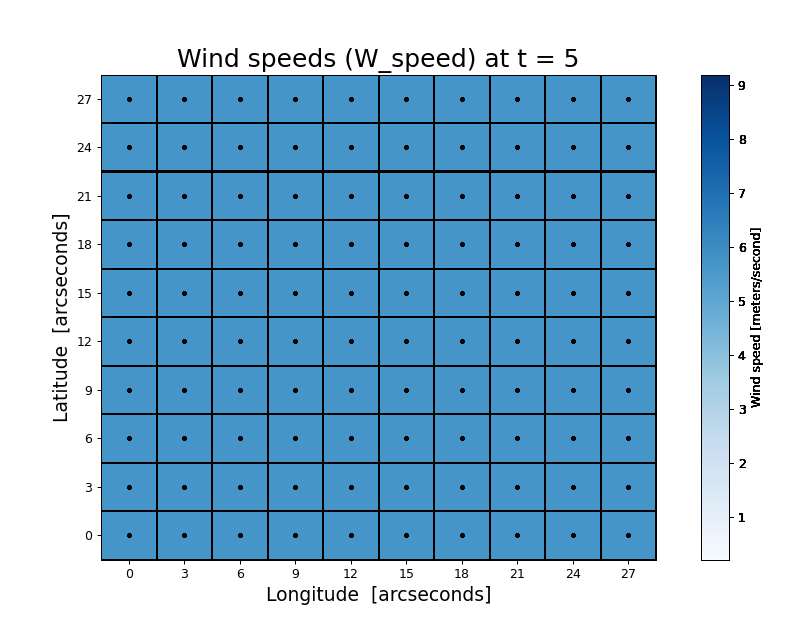

In [39]:
# Make a movie showing the wind speed maps through time:

fig, ax = plt.subplots(figsize=[9,7])

def W_speed_animate(t):
    
    # Give title to the plot:
    ax.set_title('Wind speeds (W_speed) at t = %d' %(t), size = 20)
    
    # Create a mesh:
    xx, yy = np.meshgrid(lon_arc, lat_arc)

    # Plot the mesh:
    ax.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')
    
    # Plot colors that correspond to the wind speeds at t:
    c = ax.pcolormesh(x, y, W_speed[:,:,t], edgecolors='black', linewidths=1, vmin=np.min(W_speed), vmax=np.max(W_speed), cmap='Blues')

    # Colorbar:
    div = make_axes_locatable(ax)
    cax1 = div.append_axes('right', size='5%', pad=0.5)
    cbar = plt.colorbar(c, cax=cax1)
    cbar.set_label('Wind speed [meters/second]')
         
    # Step sizes for the axes:
    ax.set_xticks(lon_arc)
    ax.set_yticks(lat_arc)

    # Titels for the axes: 
    ax.set_xlabel('Longitude  [arcseconds]', size = 15)
    ax.set_ylabel('Latitude  [arcseconds]', size = 15)
    
    return ax

anim = matplotlib.animation.FuncAnimation(fig, W_speed_animate, frames = Time)

plt.show()

#anim.save('Wind_animation.gif')

In [40]:
# Place all the wind speed threshold values for all 6 types of land use in arrays:

W_T_R_value = np.empty((Time_span))
W_T_B_value = np.empty((Time_span))
W_T_F_value = np.empty((Time_span))
W_T_A_value = np.empty((Time_span))
W_T_U_value = np.empty((Time_span))
W_T_G_value = np.empty((Time_span))

W_T_R_value[:] = W_T_R
W_T_B_value[:] = W_T_B
W_T_F_value[:] = W_T_F
W_T_A_value[:] = W_T_A
W_T_U_value[:] = W_T_U
W_T_G_value[:] = W_T_G

<IPython.core.display.Javascript object>


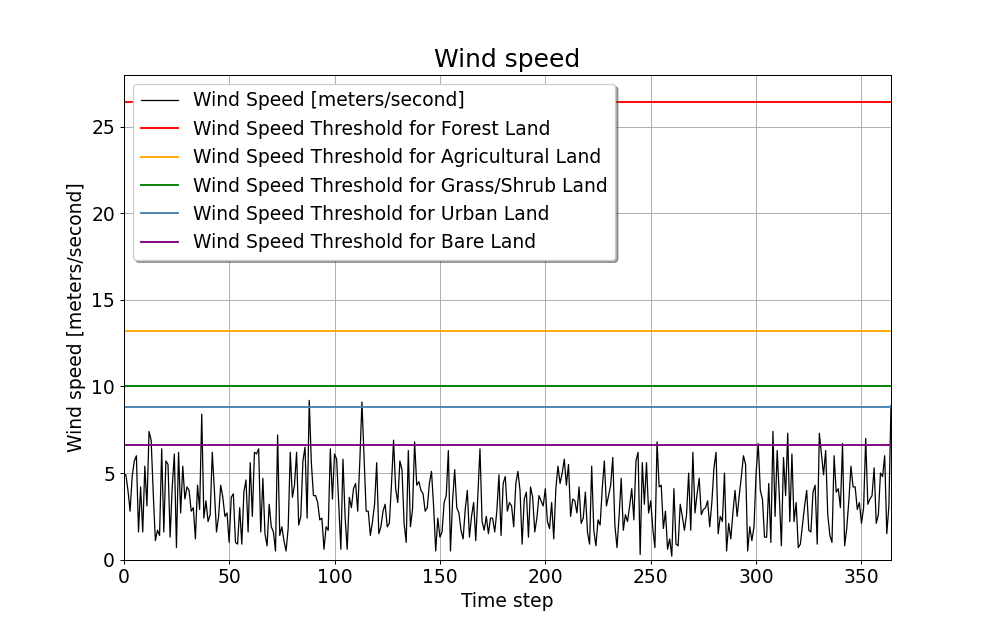

In [41]:
# Make a graph showing the wind speed value for each time step and the wind speed threshold values for the 5 types of 
# land use:

# Create a new figure:
plt.figure(figsize=[11,7])

# Title for the plot:
plt.title("Wind speed", size = 20)

# Add grid lines:
plt.grid()

# Plot the wind speed values:
plt.plot(Time, w_speed_value, color = 'black', linewidth = 1)

# Plot the wind speed threshold values:
plt.plot(Time, W_T_F_value, color = 'red')
plt.plot(Time, W_T_A_value, color = 'orange')
plt.plot(Time, W_T_G_value, color = 'green')
plt.plot(Time, W_T_U_value, color = 'steelblue')
plt.plot(Time, W_T_B_value, color = 'purple')

# Add a legend:
plt.legend(('Wind Speed [meters/second]', 'Wind Speed Threshold for Forest Land', 'Wind Speed Threshold for Agricultural Land', 'Wind Speed Threshold for Grass/Shrub Land', 'Wind Speed Threshold for Urban Land', 'Wind Speed Threshold for Bare Land'), prop={'size': 15}, loc = 2, shadow = True)

# Size of the numbers on the axes:
plt.tick_params(axis='both', which='major', labelsize=15)

# Titels for the axes:
plt.xlabel('Time step', size = 15)
plt.ylabel('Wind speed [meters/second]', size = 15)

# Limits of the axes:
plt.xlim([ 0, 364])
plt.ylim([0, 28])

# Show the plot:
plt.show()

In [42]:
# Here we use data on wind directions recorded by the Royal Netherlands Meteorological Institute (KNMI):

# We use hourly averaged wind directions* recorded by weather station "De Bilt" (latitude: 52.1015441 ; longitude: 
# 5.1779992) in the period 1981-2000.

# * wind direction is reported by the direction from which it originates 
# 0 & 360 degrees = north, 90 degrees = east, etc.

# Data source: http://projects.knmi.nl/klimatologie/frequentietabellen/maand.cgi


# The hourly averaged wind direction falls in one of the following 37 wind direction classes:

# Wind direction class 1:     no wind (windstill) or the wind directions were highly varaible (no clear average direction)
# Wind direction class 2:     wind direction between   5     and   14    degrees
# Wind direction class 3:     wind direction between   15    and   24    degrees
# Wind direction class 4:     wind direction between   25    and   34    degrees
# Wind direction class 5:     wind direction between   35    and   44    degrees
# Wind direction class 6:     wind direction between   45    and   54    degrees
# Wind direction class 7:     wind direction between   55    and   64    degrees
# Wind direction class 8:     wind direction between   65    and   74    degrees
# Wind direction class 9:     wind direction between   75    and   84    degrees
# Wind direction class 10:    wind direction between   85    and   94    degrees
# Wind direction class 11:    wind direction between   95    and   104   degrees
# Wind direction class 12:    wind direction between   105   and   114   degrees
# Wind direction class 13:    wind direction between   115   and   124   degrees
# Wind direction class 14:    wind direction between   125   and   134   degrees
# Wind direction class 15:    wind direction between   135   and   144   degrees
# Wind direction class 16:    wind direction between   145   and   154   degrees
# Wind direction class 17:    wind direction between   155   and   164   degrees
# Wind direction class 18:    wind direction between   165   and   174   degrees
# Wind direction class 19:    wind direction between   175   and   184   degrees
# Wind direction class 20:    wind direction between   185   and   194   degrees
# Wind direction class 21:    wind direction between   195   and   204   degrees
# Wind direction class 22:    wind direction between   205   and   214   degrees
# Wind direction class 23:    wind direction between   215   and   224   degrees
# Wind direction class 24:    wind direction between   225   and   234   degrees
# Wind direction class 25:    wind direction between   235   and   244   degrees
# Wind direction class 26:    wind direction between   245   and   254   degrees
# Wind direction class 27:    wind direction between   255   and   264   degrees
# Wind direction class 28:    wind direction between   265   and   274   degrees
# Wind direction class 29:    wind direction between   275   and   284   degrees
# Wind direction class 30:    wind direction between   285   and   294   degrees
# Wind direction class 31:    wind direction between   295   and   304   degrees
# Wind direction class 32:    wind direction between   305   and   314   degrees
# Wind direction class 33:    wind direction between   315   and   324   degrees
# Wind direction class 34:    wind direction between   325   and   334   degrees
# Wind direction class 35:    wind direction between   335   and   344   degrees
# Wind direction class 36:    wind direction between   345   and   354   degrees
# Wind direction class 37:    wind direction between   355   and   4     degrees

W_dir_classes = np.arange(1,38,1)

print('W_dir_classes:')
print(W_dir_classes)

# The frequency with which wind directions fall in certain wind direction classes differs from month to month

# The following 12 arrays give for each month the frequency with which the wind direction falls in a wind direction class
# (e.g the first element in the array gives the frequency with which the hourly averaged wind direction comes from a 
# direction between 5 and 14 degrees for that month)


W_dir_freq_Jan = np.array([0.0319, 0.0074, 0.0088, 0.0149, 0.0231, 0.0223, 0.0161, 0.0219, 0.0258, 0.0171, 0.0120, \
                           0.0130, 0.0116, 0.0202, 0.0265, 0.0329, 0.0358, 0.0377, 0.0353, 0.0485, 0.0530, 0.0530, \
                           0.0638, 0.0729, 0.0594, 0.0388, 0.0338, 0.0303, 0.0249, 0.0198, 0.0173, 0.0159, 0.0157, \
                           0.0117, 0.0099, 0.0083, 0.0087])

W_dir_freq_Feb = np.array([0.0350, 0.0124, 0.0211, 0.0285, 0.0290, 0.0229, 0.0218, 0.0320, 0.0360, 0.0265, 0.0187, \
                           0.0153, 0.0122, 0.0196, 0.0194, 0.0198, 0.0299, 0.0350, 0.0287, 0.0372, 0.0476, 0.0469, \
                           0.0546, 0.0590, 0.0531, 0.0348, 0.0313, 0.0281, 0.0279, 0.0223, 0.0188, 0.0172, 0.0152, \
                           0.0125, 0.0105, 0.0088, 0.0104])

W_dir_freq_Mar = np.array([0.0395, 0.0112, 0.0175, 0.0226, 0.0212, 0.0148, 0.0138, 0.0169, 0.0190, 0.0224, 0.0170, \
                           0.0132, 0.0140, 0.0209, 0.0242, 0.0259, 0.0314, 0.0287, 0.0265, 0.0289, 0.0415, 0.0438, \
                           0.0476, 0.0576, 0.0644, 0.0501, 0.0407, 0.0364, 0.0328, 0.0272, 0.0231, 0.0276, 0.0220, \
                           0.0165, 0.0157, 0.0120, 0.0114])

W_dir_freq_Apr = np.array([0.0443, 0.0284, 0.0309, 0.0347, 0.0438, 0.0370, 0.0234, 0.0221, 0.0207, 0.0208, 0.0163, \
                           0.0163, 0.0148, 0.0206, 0.0249, 0.0256, 0.0303, 0.0289, 0.0242, 0.0275, 0.0311, 0.0284, \
                           0.0313, 0.0358, 0.0367, 0.0269, 0.0272, 0.0235, 0.0254, 0.0244, 0.0262, 0.0270, 0.0270, \
                           0.0251, 0.0223, 0.0238, 0.0224])

W_dir_freq_May = np.array([0.0589, 0.0288, 0.0335, 0.0411, 0.0404, 0.0325, 0.0234, 0.0255, 0.0300, 0.0279, 0.0233, \
                           0.0163, 0.0163, 0.0189, 0.0204, 0.0235, 0.0246, 0.0210, 0.0201, 0.0219, 0.0247, 0.0261, \
                           0.0317, 0.0344, 0.0368, 0.0253, 0.0210, 0.0252, 0.0223, 0.0190, 0.0200, 0.0237, 0.0296, \
                           0.0351, 0.0288, 0.0254, 0.0226])

W_dir_freq_Jun = np.array([0.0542, 0.0233, 0.0284, 0.0342, 0.0336, 0.0255, 0.0179, 0.0138, 0.0146, 0.0152, 0.0126, \
                           0.0129, 0.0111, 0.0107, 0.0156, 0.0174, 0.0196, 0.0164, 0.0157, 0.0233, 0.0304, 0.0337, \
                           0.0485, 0.0525, 0.0433, 0.0349, 0.0367, 0.0403, 0.0384, 0.0326, 0.0328, 0.0319, 0.0343, \
                           0.0309, 0.0228, 0.0194, 0.0206])

W_dir_freq_Jul = np.array([0.0637, 0.0152, 0.0216, 0.0343, 0.0338, 0.0202, 0.0148, 0.0149, 0.0165, 0.0150, 0.0147, \
                           0.0091, 0.0106, 0.0122, 0.0155, 0.0173, 0.0197, 0.0169, 0.0157, 0.0237, 0.0292, 0.0372, \
                           0.0443, 0.0505, 0.0458, 0.0366, 0.0384, 0.0439, 0.0376, 0.0313, 0.0349, 0.0358, 0.0392, \
                           0.0343, 0.0237, 0.0175, 0.0144])

W_dir_freq_Aug = np.array([0.0882, 0.0170, 0.0243, 0.0280, 0.0300, 0.0188, 0.0141, 0.0179, 0.0157, 0.0152, 0.0144, \
                           0.0135, 0.0123, 0.0124, 0.0185, 0.0226, 0.0263, 0.0231, 0.0210, 0.0299, 0.0351, 0.0384, \
                           0.0472, 0.0489, 0.0443, 0.0355, 0.0356, 0.0349, 0.0326, 0.0259, 0.0235, 0.0292, 0.0296, \
                           0.0267, 0.0195, 0.0159, 0.0140])

W_dir_freq_Sep = np.array([0.0780, 0.0110, 0.0152, 0.0219, 0.0275, 0.0205, 0.0167, 0.0156, 0.0162, 0.0167, 0.0183, \
                           0.0158, 0.0193, 0.0249, 0.0267, 0.0319, 0.0363, 0.0293, 0.0299, 0.0390, 0.0444, 0.0467, \
                           0.0514, 0.0522, 0.0422, 0.0291, 0.0301, 0.0313, 0.0258, 0.0197, 0.0173, 0.0185, 0.0228, \
                           0.0195, 0.0157, 0.0114, 0.0112])

W_dir_freq_Oct = np.array([0.0570, 0.0063, 0.0106, 0.0170, 0.0167, 0.0157, 0.0145, 0.0208, 0.0247, 0.0216, 0.0222, \
                           0.0188, 0.0182, 0.0245, 0.0344, 0.0401, 0.0483, 0.0438, 0.0359, 0.0475, 0.0558, 0.0585, \
                           0.0687, 0.0572, 0.0394, 0.0279, 0.0271, 0.0250, 0.0179, 0.0127, 0.0112, 0.0108, 0.0128, \
                           0.0114, 0.0075, 0.0087, 0.0088])

W_dir_freq_Nov = np.array([0.0460, 0.0071, 0.0078, 0.0153, 0.0153, 0.0172, 0.0161, 0.0158, 0.0196, 0.0201, 0.0190, \
                           0.0203, 0.0233, 0.0353, 0.0372, 0.0422, 0.0421, 0.0471, 0.0408, 0.0532, 0.0568, 0.0503, \
                           0.0576, 0.0552, 0.0397, 0.0291, 0.0281, 0.0283, 0.0233, 0.0142, 0.0138, 0.0165, 0.0121, \
                           0.0106, 0.0096, 0.0071, 0.0069])

W_dir_freq_Dec = np.array([0.0373, 0.0082, 0.0104, 0.0144, 0.0219, 0.0231, 0.0188, 0.0229, 0.0277, 0.0190, 0.0153, \
                           0.0150, 0.0142, 0.0207, 0.0268, 0.0298, 0.0351, 0.0357, 0.0358, 0.0489, 0.0543, 0.0563, \
                           0.0633, 0.0631, 0.0569, 0.0358, 0.0366, 0.0327, 0.0254, 0.0172, 0.0150, 0.0141, 0.0122, \
                           0.0134, 0.0080, 0.0076, 0.0071])


W_dir_classes:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]


In [43]:
# Here the code randomly picks a wind direction for each time step, whereby it takes the monthly wind direction frequencies
# into account:

w_dir_value = np.empty(Time_range)

for t in Time:
    
    if (t >= 0 and t <= 30):
        
        #print('t = ', t)
        #print('It is January!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Jan)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 31 and t <= 58): # not a leap year!
        
        #print('t = ', t)
        #print('It is February!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Feb)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 59 and t <= 89):
        
        #print('t = ', t)
        #print('It is March!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Mar)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 90 and t <= 119):
        
        #print('t = ', t)
        #print('It is April!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Apr)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 120 and t <= 150):
        
        #print('t = ', t)
        #print('It is May!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_May)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 151 and t <= 180):
        
        #print('t = ', t)
        #print('It is June!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Jun)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 181 and t <= 211):
        
        #print('t = ', t)
        #print('It is July!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Jul)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 212 and t <= 242):
        
        #print('t = ', t)
        #print('It is August!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Aug)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 243 and t <= 272):
        
        #print('t = ', t)
        #print('It is September!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Sep)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 273 and t <= 303):
        
        #print('t = ', t)
        #print('It is October!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Oct)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 304 and t <= 333):
        
        #print('t = ', t)
        #print('It is November!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Nov)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    if (t >= 334 and t <= 364):
        
        #print('t = ', t)
        #print('It is December!')
        
        w_dir_class = np.random.choice(W_dir_classes, p = W_dir_freq_Dec)
        
        #print('For t =', t, 'the randomly picked wind direction class is:', w_dir_class)
    
    #-----------------------------------------------------------------------------------------------------------------------
    
    if (w_dir_class == 1):
        
        a = np.random.randint(low = 1, high = 361)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
        
    if (w_dir_class == 2):
        
        a = np.random.randint(low = 5, high = 15)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
        
    if (w_dir_class == 3):
        
        a = np.random.randint(low = 15, high = 25)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 4):
        
        a = np.random.randint(low = 25, high = 35)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 5):
        
        a = np.random.randint(low = 35, high = 45)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 6):
        
        a = np.random.randint(low = 45, high = 55)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 7):
        
        a = np.random.randint(low = 55, high = 65)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 8):
        
        a = np.random.randint(low = 65, high = 75)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 9):
        
        a = np.random.randint(low = 75, high = 85)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 10):
        
        a = np.random.randint(low = 85, high = 95)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 11):
        
        a = np.random.randint(low = 95, high = 105)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 12):
        
        a = np.random.randint(low = 105, high = 115)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 13):
        
        a = np.random.randint(low = 115, high = 125)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 14):
        
        a = np.random.randint(low = 125, high = 135)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 15):
        
        a = np.random.randint(low = 135, high = 145)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 16):
        
        a = np.random.randint(low = 145, high = 155)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 17):
        
        a = np.random.randint(low = 155, high = 165)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 18):
        
        a = np.random.randint(low = 165, high = 175)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 19):
        
        a = np.random.randint(low = 175, high = 185)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 20):
        
        a = np.random.randint(low = 185, high = 195)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 21):
        
        a = np.random.randint(low = 195, high = 205)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 22):
        
        a = np.random.randint(low = 205, high = 215)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 23):
        
        a = np.random.randint(low = 215, high = 225)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 24):
        
        a = np.random.randint(low = 225, high = 235)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 25):
        
        a = np.random.randint(low = 235, high = 245)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 26):
        
        a = np.random.randint(low = 245, high = 255)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 27):
        
        a = np.random.randint(low = 255, high = 265)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 28):
        
        a = np.random.randint(low = 265, high = 275)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 29):
        
        a = np.random.randint(low = 275, high = 285)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 30):
        
        a = np.random.randint(low = 285, high = 295)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 31):
        
        a = np.random.randint(low = 295, high = 305)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 32):
        
        a = np.random.randint(low = 305, high = 315)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 33):
        
        a = np.random.randint(low = 315, high = 325)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 34):
        
        a = np.random.randint(low = 325, high = 335)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 35):
        
        a = np.random.randint(low = 335, high = 345)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 36):
        
        a = np.random.randint(low = 345, high = 355)
        #print('a =', a)
        
        w_dir_value[t] = a
                
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
    if (w_dir_class == 37):
        
        a = np.random.randint(low = 355, high = 361)
        #print('a =', a)
        b = np.random.randint(low = 1, high = 5)
        #print('b =', b)
        
        a_or_b = np.random.randint(2, size = 1)
        
        if (a_or_b == 0):
            
            w_dir_value[t] = a
        
        else:
            
            w_dir_value[t] = b
                     
        #print('Then a random wind direction was chosen between the limits of this wind direction class (w_dir_value =)', \
              #w_dir_value[t])
    
      
    #-----------------------------------------------------------------------------------------------------------------------

print('w_dir_value: ')
print(w_dir_value)

w_dir_value: 
[ 36. 248.  48. 333. 186. 136. 181.  69. 215. 351. 288. 219. 191. 221.
 241. 301. 228. 200. 199. 260. 228. 333. 244. 230.  74.  36. 198. 181.
 137. 250. 248. 164. 250. 269.  77. 243. 221. 140. 223.  82. 227. 259.
 211. 304. 277.  96. 231. 161. 141.  87. 200. 323.  59. 100. 163. 234.
 215. 181. 235.  79. 119. 224. 255. 219. 276. 236. 159. 166. 231. 333.
 235. 236. 183. 211. 231. 272.  69. 336. 100. 199.  87. 215. 231. 112.
 248. 351. 349. 276. 309. 103. 354. 236.   9. 105. 205. 283. 193. 340.
  87. 322. 122. 134. 265. 186.   6. 224. 198. 336. 177. 264.  64.  90.
 246. 328. 198. 229. 207. 315.  20. 322. 190.  24. 250. 260.  25.   2.
 161.  54. 356. 234. 118.   7. 358. 306. 336.  29. 174. 244.  51. 237.
 216. 140.   4.  94. 129. 339.  52.  94.  27. 326. 176. 325. 322.  42.
  22. 228. 314. 143.  19. 348.   4. 243. 221. 212.  41. 348.  88. 348.
  77. 128.  88. 158. 257. 301. 287. 250.  59. 221.   4. 261. 105. 359.
 284. 330. 259. 276. 300. 251. 246. 133. 281. 334. 223. 196. 19

In [44]:
# Here we calculate the wind transport directions from the wind directions:

# First of all the wind directions are restricted to 8 in our model (see User's Manual)

# This is how the wind directions (in degrees) are converted to the 8 directions of motion used in the model:

# Wind directions between 292.5 - 337.5  [deg]  -->  wind direction: the wind comes FROM the northwest
# Wind directions between 337.5 - 22.5   [deg]  -->  wind direction: the wind comes FROM the north
# Wind directions between 22.5  - 67.5   [deg]  -->  wind direction: the wind comes FROM the northeast
# Wind directions between 67.5  - 112.5  [deg]  -->  wind direction: the wind comes FROM the east
# Wind directions between 112.5 - 157.5  [deg]  -->  wind direction: the wind comes FROM the southeast
# Wind directions between 157.5 - 202.5  [deg]  -->  wind direction: the wind comes FROM the south
# Wind directions between 202.5 - 247.5  [deg]  -->  wind direction: the wind comes FROM the southwest
# Wind directions between 247.5 - 292.5  [deg]  -->  wind direction: the wind comes FROM the west

############################################################################################################################

# Additionally note that wind directions indicate the direction from which the wind originates, this means that plastic 
# particles are transported in the opposite direction (i.e. +180 degrees), e.g. wind blowing FROM the north, displaces 
# particles TO the south! So the 'wind transport direction' is opposite of the 'wind direction'

# Labels for the wind transport directions in which a plastic particle located in grid cell 'x' is blown to due to the wind:

#                 WIND DIRECTION                      WIND TRANSPORT DIRECTION
# 2000    the wind comes FROM the southeast   and blows particles TOWARDS the northwest
# 2001    the wind comes FROM the south       and blows particles TOWARDS the north
# 2002    the wind comes FROM the southwest   and blows particles TOWARDS the northeast
# 2003    the wind comes FROM the west        and blows particles TOWARDS the east
# 2004    the wind comes FROM the northwest   and blows particles TOWARDS the southeast
# 2005    the wind comes FROM the north       and blows particles TOWARDS the south
# 2006    the wind comes FROM the northeast   and blows particles TOWARDS the southwest
# 2007    the wind comes FROM the east        and blows particles TOWARDS the west

#   |--------|--------|--------|
#   |        |        |        |
#   |  2000  |  2001  |  2002  |
#   |        |        |        |
#   |--------|--------|--------|
#   |        |        |        |
#   |  2007  |   x    |  2003  |
#   |        |        |        |
#   |--------|--------|--------|
#   |        |        |        |
#   |  2006  |  2005  |  2004  |
#   |        |        |        |
#   |--------|--------|--------|

############################################################################################################################


# The 'w_dir_value' array contains the wind directions from which the Wind_displacement_dir array is computed as follows:


Wind_displacement_dir = np.zeros(Time_range)   # contains the wind TRANSPORT directions

for t in Time:

    if (w_dir_value[t] >= 292.5 and w_dir_value[t] < 337.5):
        
        Wind_displacement_dir[t] = 2004
    
    if (w_dir_value[t] >= 337.5 and w_dir_value[t] <= 360):
        
        Wind_displacement_dir[t] = 2005
    
    if (w_dir_value[t] >= 1 and w_dir_value[t] < 22.5):
        
        Wind_displacement_dir[t] = 2005
      
    if (w_dir_value[t] >= 22.5 and w_dir_value[t] < 67.5):
        
        Wind_displacement_dir[t] = 2006
    
    if (w_dir_value[t] >= 67.5 and w_dir_value[t] < 112.5):
        
        Wind_displacement_dir[t] = 2007
    
    if (w_dir_value[t] >= 112.5 and w_dir_value[t] < 157.5):
        
        Wind_displacement_dir[t] = 2000
    
    if (w_dir_value[t] >= 157.5 and w_dir_value[t] < 202.5):
        
        Wind_displacement_dir[t] = 2001
    
    if (w_dir_value[t] >= 202.5 and w_dir_value[t] < 247.5):
        
        Wind_displacement_dir[t] = 2002
    
    if (w_dir_value[t] >= 247.5 and w_dir_value[t] < 292.5):
        
        Wind_displacement_dir[t] = 2003
    
Wind_displacement_dir[t] = np.round(Wind_displacement_dir[t], 0)
    
print('Wind_displacement_dir:')    
print(Wind_displacement_dir)
            

Wind_displacement_dir:
[2006. 2003. 2006. 2004. 2001. 2000. 2001. 2007. 2002. 2005. 2003. 2002.
 2001. 2002. 2002. 2004. 2002. 2001. 2001. 2003. 2002. 2004. 2002. 2002.
 2007. 2006. 2001. 2001. 2000. 2003. 2003. 2001. 2003. 2003. 2007. 2002.
 2002. 2000. 2002. 2007. 2002. 2003. 2002. 2004. 2003. 2007. 2002. 2001.
 2000. 2007. 2001. 2004. 2006. 2007. 2001. 2002. 2002. 2001. 2002. 2007.
 2000. 2002. 2003. 2002. 2003. 2002. 2001. 2001. 2002. 2004. 2002. 2002.
 2001. 2002. 2002. 2003. 2007. 2004. 2007. 2001. 2007. 2002. 2002. 2007.
 2003. 2005. 2005. 2003. 2004. 2007. 2005. 2002. 2005. 2007. 2002. 2003.
 2001. 2005. 2007. 2004. 2000. 2000. 2003. 2001. 2005. 2002. 2001. 2004.
 2001. 2003. 2006. 2007. 2002. 2004. 2001. 2002. 2002. 2004. 2005. 2004.
 2001. 2006. 2003. 2003. 2006. 2005. 2001. 2006. 2005. 2002. 2000. 2005.
 2005. 2004. 2004. 2006. 2001. 2002. 2006. 2002. 2002. 2000. 2005. 2007.
 2000. 2005. 2006. 2007. 2006. 2004. 2001. 2004. 2004. 2006. 2005. 2002.
 2004. 2000. 2005. 2005. 200

In [45]:
# Make simple wind transport direction array for each timestep:

# Here we assume the wind direction to be the same in the whole domain during 1 timestep

# Make a 3D array that contains all the wind direction maps for all timesteps --> W_dir[latitude,longitude,time]

W_dir = np.empty((n_row,n_col,Time_range))

for t in Time:
      
    for i in np.arange(0,n_row,1):
                
        for j in np.arange(0,n_col,1):
            
            W_dir[i,j,t] = Wind_displacement_dir[t]
    
    #print(W_dir[:,:,t])
    #print(' ')


In [46]:
# Make a vector field for the wind directions, in which u contains the zonal components of the vectors and v the meridional:

u = np.empty((n_row,n_col,Time_range))
v = np.empty((n_row,n_col,Time_range))

for t in Time:

    for i in np.arange(0,n_row,1):
        
        for j in np.arange(0,n_col,1):
        
            if (W_dir[i,j,t] == 2000):
                u[i,j,t] = -1
                v[i,j,t] = 1
            if (W_dir[i,j,t] == 2001):
                u[i,j,t] = 0
                v[i,j,t] = 1
            if (W_dir[i,j,t] == 2002):
                u[i,j,t] = 1
                v[i,j,t] = 1
            if (W_dir[i,j,t] == 2003):
                u[i,j,t] = 1
                v[i,j,t] = 0
            if (W_dir[i,j,t] == 2004):
                u[i,j,t] = 1
                v[i,j,t] = -1
            if (W_dir[i,j,t] == 2005):
                u[i,j,t] = 0
                v[i,j,t] = -1
            if (W_dir[i,j,t] == 2006):
                u[i,j,t] = -1
                v[i,j,t] = -1
            if (W_dir[i,j,t] == 2007):
                u[i,j,t] = -1
                v[i,j,t] = 0
                

<IPython.core.display.Javascript object>


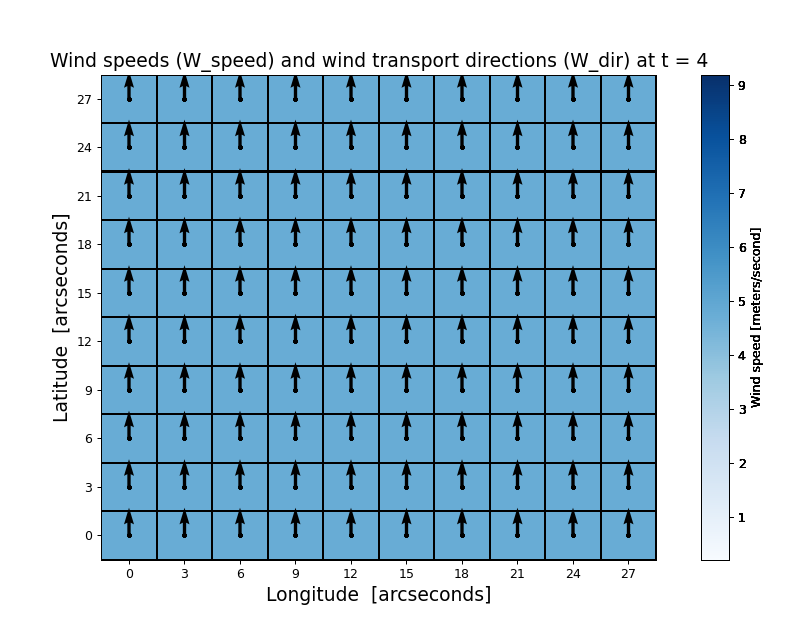

In [47]:
# Make a movie showing the wind speed and wind transport direction maps through time:

fig, ax = plt.subplots(figsize=[9,7])

def W_dir_animate(t):
    
    # Give title to the plot:
    ax.set_title('Wind speeds (W_speed) and wind transport directions (W_dir) at t = %d' %(t), size = 15)
    
    # Create a mesh:
    xx, yy = np.meshgrid(lon_arc, lat_arc)

    # Plot the mesh:
    ax.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')
    
    # Plot colors that correspond to the wind speed at t:
    c = ax.pcolormesh(x, y, W_speed[:,:,t], edgecolors='black', linewidths=1, vmin=np.min(W_speed), vmax=np.max(W_speed), cmap='Blues')

    # Colorbar:
    div = make_axes_locatable(ax)
    cax1 = div.append_axes('right', size='5%', pad=0.5)
    cbar = plt.colorbar(c, cax=cax1)
    cbar.set_label('Wind speed [meters/second]')
    
    # Plot vectors that correspond to the wind transport directions:
    ax.quiver(xx,yy, u[:,:,t], v[:,:,t], color = 'black', pivot='tail', scale = 20)
            
    # Step sizes for the axes:
    ax.set_xticks(lon_arc)
    ax.set_yticks(lat_arc)

    # Titels for the axes: 
    ax.set_xlabel('Longitude  [arcseconds]', size = 15)
    ax.set_ylabel('Latitude  [arcseconds]', size = 15)
    
    return ax

anim = matplotlib.animation.FuncAnimation(fig, W_dir_animate, frames = Time)

plt.show()

#anim.save('Wind_speed_&_direction.gif')

<IPython.core.display.Javascript object>


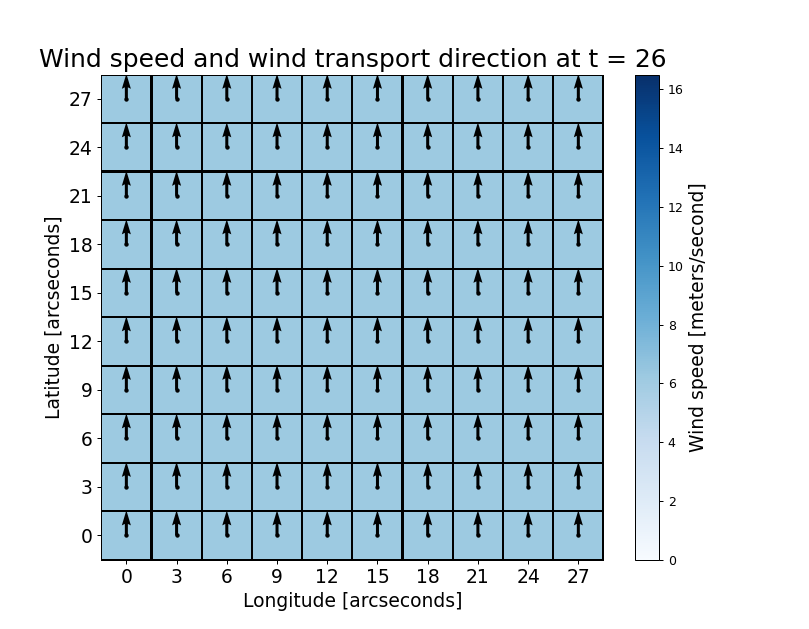

In [48]:
# Make a plot showing the wind speed and wind transport direction for a single time step:

# Create a new figure:
plt.figure(figsize=[9,7])

# Title for the plot:
plt.title("Wind speed and wind transport direction at t = 26", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the steepest (downhill) terrain slope magnitude:
c = plt.pcolormesh(x, y, W_speed[:,:,26], edgecolors='black', vmin = 0, vmax = 16.5, linewidths=1, cmap = 'Blues')

# Add a color scale bar:
cbar = plt.colorbar()

# Assign a label to the color scale bar:
cbar.set_label('Wind speed [meters/second]', size = 15)

# Plot vectors that correspond to the slope directions:
plt.quiver(xx,yy, u[:,:,26], v[:,:,26], color = 'black', pivot='tail', scale = 20)

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [49]:
############################################################################################################################
############################################## W I N D  T H R E S H O L D S ################################################
############################################################################################################################

In [50]:
# Here, the 'W_T_lu' array is created, which contains the wind thresholds that only depend on the type of land use:

# The wind threshold map contains for each grid cell in the domain the critical wind speed required to mobilise and 
# transport macroplastics

# The wind speed threshold values are stored in ParVal[0] to ParVal[5] at the top of the program and can be set by the user

W_T_lu = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if(LU[i,j] == 0):
            W_T_lu[i,j] = W_T_R        # River
        if(LU[i,j] == 100):
            W_T_lu[i,j] = W_T_B        # Bare land
        if(LU[i,j] == 200):
            W_T_lu[i,j] = W_T_F        # Forest
        if(LU[i,j] == 300):
            W_T_lu[i,j] = W_T_A        # Agricultural land
        if(LU[i,j] == 400):
            W_T_lu[i,j] = W_T_U        # Urban land
        if(LU[i,j] == 500):
            W_T_lu[i,j] = W_T_G        # Grass/shrubland

print('W_T_lu:')
print(W_T_lu)


W_T_lu:
[[ 6.6  6.6  6.6  6.6 30.  30.   6.6  6.6  6.6  6.6]
 [13.2 13.2 26.4 26.4 30.  30.  13.2  8.8  8.8  8.8]
 [ 8.8  8.8 26.4 30.  30.  30.  13.2  8.8  8.8  8.8]
 [ 8.8  8.8 30.  30.  30.  30.  13.2 13.2 13.2 13.2]
 [10.  30.  30.  10.  30.  30.  30.  10.  10.  10. ]
 [10.  30.  30.  10.  30.  30.  30.  30.  10.  10. ]
 [30.  30.  10.  10.  30.  30.  26.4 30.  30.  10. ]
 [30.  13.2  8.8  8.8 30.  30.  26.4 26.4 30.  30. ]
 [30.  13.2  8.8  8.8 30.  30.  26.4  8.8  8.8 30. ]
 [26.4 13.2 13.2 13.2 30.  30.  26.4  8.8  8.8 13.2]]


<IPython.core.display.Javascript object>


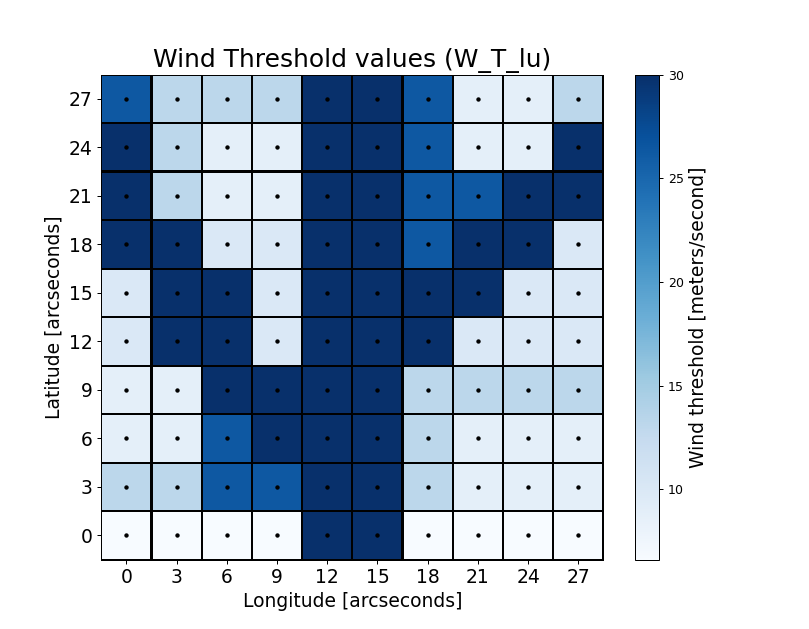

In [51]:
# Make a plot showing the wind speed thresholds map:

# Create a new figure:
plt.figure(figsize=[9,7])

# Title for the plot:
plt.title("Wind Threshold values (W_T_lu)", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the land use dependent wind speed threshold values:
c = plt.pcolormesh(x,y, W_T_lu, edgecolors='black', linewidths=1, cmap = 'Blues')

# Add a color scale bar:
cbar = plt.colorbar()

# Assign a label to the color scale bar:
cbar.set_label('Wind threshold [meters/second]', size = 15)

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [52]:
# Here, the 'W_T_lus' array is created, which contains the wind thresholds that depend on both the type of land use and
# the terrain slope:

# Calculate for each grid cell the wind threshold by considering the terrain slope in the transport direction of the wind 
# for that cell. E.g. if the wind in cell i is towards the east, then use the topography gradient between cell i and the 
# cell to the right of cell i in order to calculate the final wind threshold. 

# Add 4.20 m/s to the slope independent wind threshold value (see ParVal[0] to ParVal[5] at the top of the program) for 
# each radian of slope angle if the wind blows uphill, or subtract 4.20 m/s from the wind trehshold value for each radian 
# of slope angle if the wind blows downhill. The explaination of the value 4.20 (m/s) can be found in the User's manual.
# This value is called deltaTW and is set by the user in ParVal[7]

W_T_lus = np.empty((n_row,n_col,Time_range))

for t in Time:

    for i in np.arange(0,n_row,1):

        for j in np.arange(0,n_col,1):      

    ########################################################################################################################

            # Cell in the lower left corner of the domain:
            if (i == 0 and j == 0):    

                if(W_dir[i,j,t] == 2000):
                    # Topography gradient when moving towards the cell to the north-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2001):
                    # Topography gradient when moving towards the cell to the north: 
                    dwd          = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2002):
                    # Topography gradient when moving towards the cell to the north-east:
                    dwd          = (Z[i+1,j+1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2003):
                    # Topography gradient when moving towards the cell to the east:
                    dwd          = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2004):
                    # Topography gradient when moving towards the cell to the south-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2005):
                    # Topography gradient when moving towards the cell to the south:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2006):
                    # Topography gradient when moving towards the cell to the south-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2007):
                    # Topography gradient when moving towards the cell to the west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

    ########################################################################################################################

            # Cell in the upper left corner of the domain:        
            elif (i == (n_row-1) and j == 0):    

                if(W_dir[i,j,t] == 2000):
                    # Topography gradient when moving towards the cell to the north-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2001):
                    # Topography gradient when moving towards the cell to the north: 
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2002):
                    # Topography gradient when moving towards the cell to the north-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2003):
                    # Topography gradient when moving towards the cell to the east:
                    dwd          = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2004):
                    # Topography gradient when moving towards the cell to the south-east:
                    dwd          = (Z[i-1,j+1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2005):
                    # Topography gradient when moving towards the cell to the south:
                    dwd          = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2006):
                    # Topography gradient when moving towards the cell to the south-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2007):
                    # Topography gradient when moving towards the cell to the west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

    ########################################################################################################################

            # Cell in the upper right corner of the domain:
            elif (i == (n_row-1) and j == (n_col-1)):

                if(W_dir[i,j,t] == 2000):
                    # Topography gradient when moving towards the cell to the north-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2001):
                    # Topography gradient when moving towards the cell to the north: 
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2002):
                    # Topography gradient when moving towards the cell to the north-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2003):
                    # Topography gradient when moving towards the cell to the east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2004):
                    # Topography gradient when moving towards the cell to the south-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2005):
                    # Topography gradient when moving towards the cell to the south:
                    dwd          = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2006):
                    # Topography gradient when moving towards the cell to the south-west:
                    dwd          = (Z[i-1,j]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2007):
                    # Topography gradient when moving towards the cell to the west:
                    dwd          = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

    ########################################################################################################################

            # Cell in the lower right corner of the domain:
            elif (i == 0 and j == (n_col-1)):    

                if(W_dir[i,j,t] == 2000):
                    # Topography gradient when moving towards the cell to the north-west:
                    dwd          = (Z[i+1,j-1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2001):
                    # Topography gradient when moving towards the cell to the north: 
                    dwd          = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2002):
                    # Topography gradient when moving towards the cell to the north-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2003):
                    # Topography gradient when moving towards the cell to the east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2004):
                    # Topography gradient when moving towards the cell to the south-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2005):
                    # Topography gradient when moving towards the cell to the south:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2006):
                    # Topography gradient when moving towards the cell to the south-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2007):
                    # Topography gradient when moving towards the cell to the west:
                    dwd          = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

    ########################################################################################################################

            # Cells along the western boundary of the domain:
            elif (i != 0 and i != (n_row-1) and j == 0):    

                if(W_dir[i,j,t] == 2000):
                    # Topography gradient when moving towards the cell to the north-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2001):
                    # Topography gradient when moving towards the cell to the north: 
                    dwd          = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2002):
                    # Topography gradient when moving towards the cell to the north-east:
                    dwd          = (Z[i+1,j+1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2003):
                    # Topography gradient when moving towards the cell to the east:
                    dwd          = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2004):
                    # Topography gradient when moving towards the cell to the south-east:
                    dwd          = (Z[i-1,j+1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2005):
                    # Topography gradient when moving towards the cell to the south:
                    dwd          = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2006):
                    # Topography gradient when moving towards the cell to the south-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2007):
                    # Topography gradient when moving towards the cell to the west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

    ########################################################################################################################

            # Cells along the northern boundary of the domain:
            elif (i == (n_row-1) and j != 0 and j != (n_col-1)):    

                if(W_dir[i,j,t] == 2000):
                    # Topography gradient when moving towards the cell to the north-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2001):
                    # Topography gradient when moving towards the cell to the north: 
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2002):
                    # Topography gradient when moving towards the cell to the north-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2003):
                    # Topography gradient when moving towards the cell to the east:
                    dwd          = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2004):
                    # Topography gradient when moving towards the cell to the south-east:
                    dwd          = (Z[i-1,j+1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2005):
                    # Topography gradient when moving towards the cell to the south:
                    dwd          = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2006):
                    # Topography gradient when moving towards the cell to the south-west:
                    dwd          = (Z[i-1,j]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2007):
                    # Topography gradient when moving towards the cell to the west:
                    dwd          = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

    ########################################################################################################################

            # Cells along the eastern boundary of the domain:
            elif (i != 0 and i != (n_row-1) and j == (n_col-1)):    

                if(W_dir[i,j,t] == 2000):
                    # Topography gradient when moving towards the cell to the north-west:
                    dwd          = (Z[i+1,j-1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2001):
                    # Topography gradient when moving towards the cell to the north: 
                    dwd          = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2002):
                    # Topography gradient when moving towards the cell to the north-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2003):
                    # Topography gradient when moving towards the cell to the east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2004):
                    # Topography gradient when moving towards the cell to the south-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2005):
                    # Topography gradient when moving towards the cell to the south:
                    dwd          = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2006):
                    # Topography gradient when moving towards the cell to the south-west:
                    dwd          = (Z[i-1,j]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2007):
                    # Topography gradient when moving towards the cell to the west:
                    dwd          = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

    ########################################################################################################################

            # Cells along the southern boundary of the domain:
            elif (i == 0 and j != 0 and j != (n_col-1)): 

                if(W_dir[i,j,t] == 2000):
                    # Topography gradient when moving towards the cell to the north-west:
                    dwd          = (Z[i+1,j-1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2001):
                    # Topography gradient when moving towards the cell to the north: 
                    dwd          = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2002):
                    # Topography gradient when moving towards the cell to the north-east:
                    dwd          = (Z[i+1,j+1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2003):
                    # Topography gradient when moving towards the cell to the east:
                    dwd          = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2004):
                    # Topography gradient when moving towards the cell to the south-east:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2005):
                    # Topography gradient when moving towards the cell to the south:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2006):
                    # Topography gradient when moving towards the cell to the south-west:
                    W_T_lus[i,j,t] = W_T_lu[i,j]

                if(W_dir[i,j,t] == 2007):
                    # Topography gradient when moving towards the cell to the west:
                    dwd          = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

    ########################################################################################################################

            # Cells in the interior of the domain:       
            else:

                if(W_dir[i,j,t] == 2000):
                    # Topography gradient when moving towards the cell to the north-west:
                    dwd          = (Z[i+1,j-1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2001):
                    # Topography gradient when moving towards the cell to the north: 
                    dwd          = (Z[i+1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2002):
                    # Topography gradient when moving towards the cell to the north-east:
                    dwd          = (Z[i+1,j+1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2003):
                    # Topography gradient when moving towards the cell to the east:
                    dwd          = (Z[i,j+1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2004):
                    # Topography gradient when moving towards the cell to the south-east tadataaa:
                    dwd          = (Z[i-1,j+1]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2005):
                    # Topography gradient when moving towards the cell to the south:
                    dwd          = (Z[i-1,j]-Z[i,j])/(Lat_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2006):
                    # Topography gradient when moving towards the cell to the south-west:
                    dwd          = (Z[i-1,j]-Z[i,j])/(d_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)

                if(W_dir[i,j,t] == 2007):
                    # Topography gradient when moving towards the cell to the west:
                    dwd          = (Z[i,j-1]-Z[i,j])/(Lon_res_m)
                    slope_rad    = np.arctan(dwd)
                    if(slope_rad == 0):
                        W_T_lus[i,j,t] = W_T_lu[i,j]
                    else:
                        W_T_lus[i,j,t] = W_T_lu[i,j] + ((slope_rad)*deltaTW)


<IPython.core.display.Javascript object>


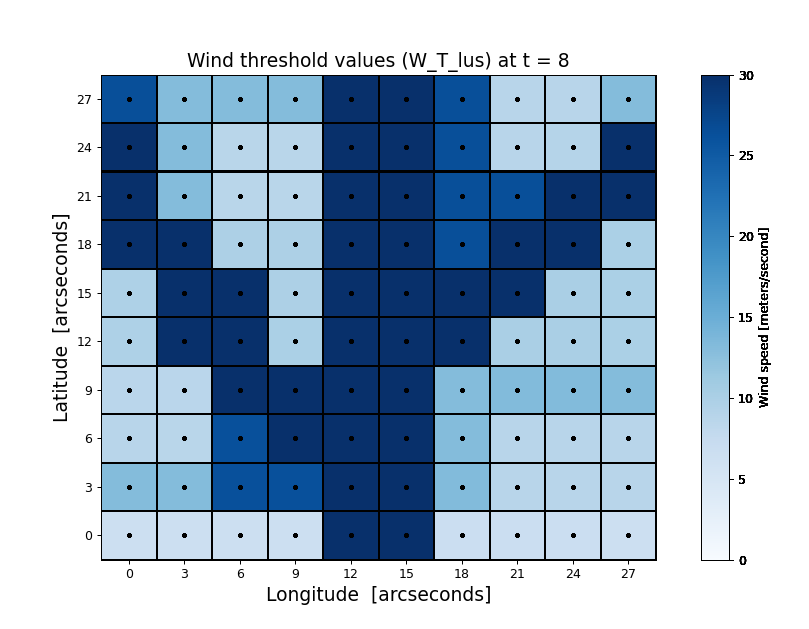

In [53]:
# Make a movie showing the wind speed thresholds maps through time:

fig, ax = plt.subplots(figsize=[9,7])

def W_T_lus_animate(t):
    
    # Give title to the plot:
    ax.set_title('Wind threshold values (W_T_lus) at t = %d' %(t), size = 15)
       
    # Create a mesh:
    xx, yy = np.meshgrid(lon_arc, lat_arc)

    # Plot the mesh:
    ax.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')
      
    # Plot colors that correspond to the land use AND slope dependent wind speed threshold values at t:
    c = ax.pcolormesh(x, y, W_T_lus[:,:,t], edgecolors='black', linewidths=1, vmin=0, vmax=30, cmap='Blues')

    # Colorbar:
    div = make_axes_locatable(ax)
    cax1 = div.append_axes('right', size='5%', pad=0.5)
    cbar = plt.colorbar(c, cax=cax1)
    cbar.set_label('Wind speed [meters/second]')
      
    # Step sizes for the axes:
    ax.set_xticks(lon_arc)
    ax.set_yticks(lat_arc)

    # Titels for the axes: 
    ax.set_xlabel('Longitude  [arcseconds]', size = 15)
    ax.set_ylabel('Latitude  [arcseconds]', size = 15)
    
    return ax

anim = matplotlib.animation.FuncAnimation(fig, W_T_lus_animate, frames = Time)

plt.show()

In [54]:
############################################################################################################################
############################################ S U R F A C E   R U N O F F ###################################################
############################################################################################################################

In [55]:
# Here we use data on rainfall recorded by the Royal Netherlands Meteorological Institute (KNMI):

# The weather station "De Bilt" (latitude: 52.1015441 ; longitude: 5.1779992) recorded the total amount of rainfall (in mm)
# for each hour in the period 1981-2000. 

# Data source: http://projects.knmi.nl/klimatologie/uurgegevens/selectie.cgi

# For each day we added these 24 hour values to obtain a total amount of rainfall (in mm) per day. This resulted in 7305 
# rainfall values. Next we created 23 rainfall classes:

# The total amount of rainfall (in mm) per day falls in one of the following 23 rainfall classes:

# Rainfall class 1:    no rainfall      0.000                  mm
# Rainfall class 2:    rainfall from    0.001    to   0.100    mm
# Rainfall class 3:    rainfall from    0.101    to   1.000    mm
# Rainfall class 4:    rainfall from    1.001    to   2.000    mm
# Rainfall class 5:    rainfall from    2.001    to   3.000    mm
# Rainfall class 6:    rainfall from    3.001    to   4.000    mm
# Rainfall class 7:    rainfall from    4.001    to   5.000    mm
# Rainfall class 8:    rainfall from    5.001    to   6.000    mm
# Rainfall class 9:    rainfall from    6.001    to   7.000    mm
# Rainfall class 10:   rainfall from    7.001    to   8.000    mm
# Rainfall class 11:   rainfall from    8.001    to   9.000    mm
# Rainfall class 12:   rainfall from    9.001    to   10.000   mm
# Rainfall class 13:   rainfall from    10.001   to   11.000   mm
# Rainfall class 14:   rainfall from    11.001   to   12.000   mm
# Rainfall class 15:   rainfall from    12.001   to   13.000   mm
# Rainfall class 16:   rainfall from    13.001   to   14.000   mm
# Rainfall class 17:   rainfall from    14.001   to   15.000   mm
# Rainfall class 18:   rainfall from    15.001   to   16.000   mm
# Rainfall class 19:   rainfall from    16.001   to   17.000   mm
# Rainfall class 20:   rainfall from    17.001   to   18.000   mm
# Rainfall class 21:   rainfall from    18.001   to   19.000   mm
# Rainfall class 22:   rainfall from    19.001   to   20.000   mm
# Rainfall class 23:   rainfall from    > 20.001               mm

Rainfall_classes = np.arange(1,24,1)

print('Rainfall_classes:')
print(Rainfall_classes)

# The frequency with which the amount of daily rainfall falls in certain rainfall class is given in the following array 
# (note that we do not take monlty variations in rainfall intensities in account!)

Rainfall_freq = np.array([0.3247, 0.1771, 0.1396, 0.0758, 0.0531, 0.0393, 0.0342, 0.0256, 0.0203, 0.0179, 0.0155, \
                          0.0134, 0.0100, 0.0086, 0.0060, 0.0055, 0.0059, 0.0045, 0.0029, 0.0033, 0.0038, 0.0018, \
                          0.0112])

print(' ')
print('Rainfall_freq:')
print(Rainfall_freq)


Rainfall_classes:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 
Rainfall_freq:
[0.3247 0.1771 0.1396 0.0758 0.0531 0.0393 0.0342 0.0256 0.0203 0.0179
 0.0155 0.0134 0.01   0.0086 0.006  0.0055 0.0059 0.0045 0.0029 0.0033
 0.0038 0.0018 0.0112]


In [56]:
# Here the code randomly picks a rainfall value for each time step, whereby it takes the monthly rainfall frequencies
# into account:

rainfall_value = np.empty(Time_range)

for t in Time:
    
    rainfall_class = np.random.choice(Rainfall_classes, p = Rainfall_freq)
        
    #print('For t =', t, 'the randomly picked rainfall class is:', rainfall_class)
    
    #-----------------------------------------------------------------------------------------------------------------------
    
    if (rainfall_class == 1):
        
        rainfall_value[t] = 0.0
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 2):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 0.010 + ( (0.100-0.010)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 3):
        
        a = np.random.randint(low = 1, high = 10)
        #print('a =', a)
        
        rainfall_value[t] = 0.200 + ( (1.000-0.200)*(a-1) / (9-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 4):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 1.100 + ( (2.000-1.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 5):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 2.100 + ( (3.000-2.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 6):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 3.100 + ( (4.000-3.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 7):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 4.100 + ( (5.000-4.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 8):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 5.100 + ( (6.000-5.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 9):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 6.100 + ( (7.000-6.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 10):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 7.100 + ( (8.000-7.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 11):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 8.100 + ( (9.000-8.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 12):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 9.100 + ( (10.000-9.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 13):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 10.100 + ( (11.000-10.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 14):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 11.100 + ( (12.000-11.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 15):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 12.100 + ( (13.000-12.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 16):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 13.100 + ( (14.000-13.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 17):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 14.100 + ( (15.000-14.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random wind speed was chosen between the limits of this wind speed class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 18):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 15.100 + ( (16.000-15.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 19):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 16.100 + ( (17.000-16.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
        
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 20):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 17.100 + ( (18.000-17.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
            
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 21):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 18.100 + ( (19.000-18.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
            
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
    
    if (rainfall_class == 22):
        
        a = np.random.randint(low = 1, high = 11)
        #print('a =', a)
        
        rainfall_value[t] = 19.100 + ( (20.000-19.100)*(a-1) / (10-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
            
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
        
    if (rainfall_class == 23):
        
        a = np.random.randint(low = 1, high = 301)
        #print('a =', a)
        
        rainfall_value[t] = 20.100 + ( (50.000-20.100)*(a-1) / (300-1) )
        rainfall_value[t] = np.round(rainfall_value[t], 3)
            
        #print('Then a random rainfall was chosen between the limits of this rainfall class (rainfall_value =)', \
              #rainfall_value[t])
      
    #-----------------------------------------------------------------------------------------------------------------------


np.set_printoptions(suppress=True)
print('rainfall_value:')
print(rainfall_value)

rainfall_value:
[ 0.    1.9   0.    0.    0.    0.7   5.9   0.09  0.7   0.    0.    0.
  0.5   0.    0.08  1.9   2.9   0.    0.07  0.    0.07  6.7   0.    0.
  0.    0.    0.    3.4   4.    0.8   4.5   0.   14.4   0.    4.8   0.05
  1.2   1.5   1.8   0.    0.5   0.04  3.    1.   19.8   5.6   0.5  16.
  4.8   0.05  1.1   1.4   9.5   0.   15.4   0.06  1.7   0.    0.02  0.
  0.5   6.    0.06  1.4   0.    2.1  16.6   4.9   0.    0.07  0.05  0.
  0.    0.5   8.    0.    0.    0.3   1.    0.2   0.04  0.    0.    2.4
  0.    0.    0.    5.4   0.    0.    4.1   0.    0.09 25.2   4.7   0.
  0.3   0.4   0.    0.5   0.   12.5   0.    0.    9.2   0.    1.9   0.
  0.    0.5   6.8   4.6   2.2   9.5   0.    0.8   0.3   0.08  3.8   0.04
  0.    3.2   7.3   0.    0.    0.    0.    0.    0.    1.    0.   14.
  0.    0.   16.1   0.04  0.01  0.2   0.    0.02  0.02 38.1   0.03 13.1
  0.    6.5   0.    0.    0.    0.    0.    0.3   0.04  0.    0.    0.
  1.3   3.4   3.7  17.6   1.3   2.1   0.    0.    0.   

In [57]:
# Place the 6 runoff coefficient values (see ParVal[59] to ParVal[64] at the top of the program), one for each type of
# land use in arrays:

RC_river_value   = np.empty((Time_span))
RC_bare_value    = np.empty((Time_span))
RC_forest_value  = np.empty((Time_span))
RC_agricul_value = np.empty((Time_span))
RC_urban_value   = np.empty((Time_span))
RC_grass_value   = np.empty((Time_span))


RC_river_value[:]   = RC_river
RC_bare_value[:]    = RC_bare
RC_forest_value[:]  = RC_forest
RC_agricul_value[:] = RC_agricul
RC_urban_value[:]   = RC_urban
RC_grass_value[:]   = RC_grass

<IPython.core.display.Javascript object>


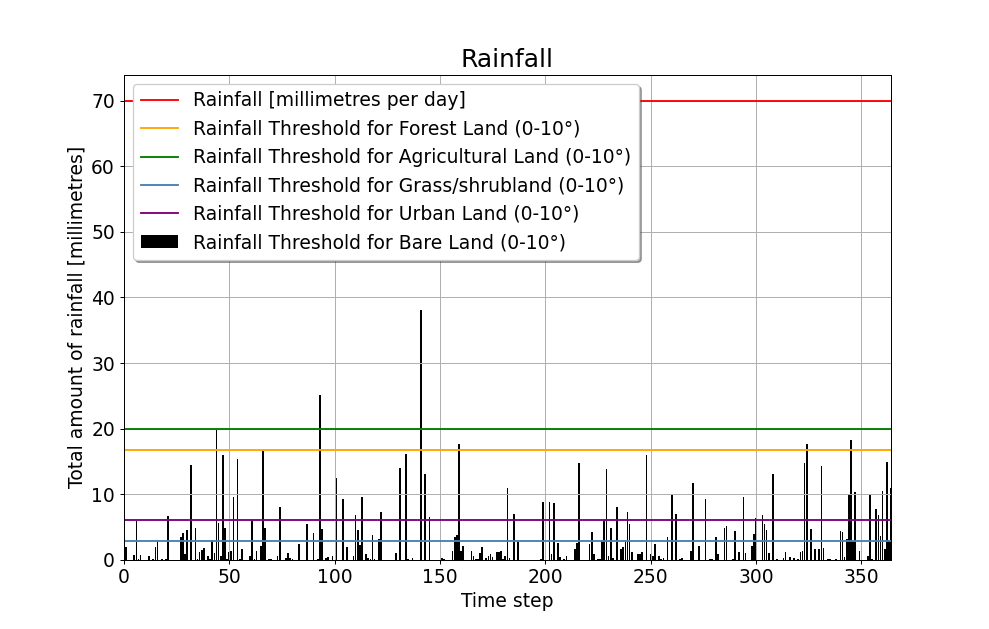

In [58]:
# Create a new figure:
plt.figure(figsize=[11,7])

# Title for the plot:
plt.title("Rainfall", size = 20)

# Add grid lines: 
plt.grid()

# Plot the rainfall values:
plt.bar(Time, rainfall_value, color = 'black')

# Plot the rainfall threshold values for each type of land use with terrain slopes between 0 and 10°:
plt.plot(Time, (R_T_F_1/RC_forest_value), color = 'red')
plt.plot(Time, (R_T_A_1/RC_agricul_value), color = 'orange')
plt.plot(Time, (R_T_G_1/RC_grass_value), color = 'green')
plt.plot(Time, (R_T_U_1/RC_urban_value), color = 'steelblue')
plt.plot(Time, (R_T_B_1/RC_bare_value), color = 'purple')

# Add a legend:
plt.legend(('Rainfall [millimetres per day]', 'Rainfall Threshold for Forest Land (0-10°)', 'Rainfall Threshold for Agricultural Land (0-10°)', 'Rainfall Threshold for Grass/shrubland (0-10°)', 'Rainfall Threshold for Urban Land (0-10°)', 'Rainfall Threshold for Bare Land (0-10°)'), prop={'size': 15}, loc = 2, shadow = True)

# Size of the numbers on the axes:
plt.tick_params(axis='both', which='major', labelsize=15)

# Titels for the axes:
plt.xlabel('Time step', size = 15)
plt.ylabel('Total amount of rainfall [millimetres]', size = 15)

# Limits of the axes:
plt.xlim([ 0, 364])
plt.ylim([0, 74])

# Show the plot:
plt.show()

In [59]:
# Make a 3D R_speed[i,j,t] array using the surface runoff coefficients, which translate the rainfall values into surface
# runoff values:

R_speed = np.empty((n_row,n_col,Time_range))

for t in Time:
      
    for i in np.arange(0,n_row,1):
                
        for j in np.arange(0,n_col,1):
            
            if(LU[i,j] == 0):              # River
                
                R_speed[i,j,t] = 1000       
            
            if(LU[i,j] == 100):            # Bare land
                
                R_speed[i,j,t] = rainfall_value[t] * RC_bare
            
            if(LU[i,j] == 200):            # Forest
                        
                R_speed[i,j,t] = rainfall_value[t] * RC_forest
            
            if(LU[i,j] == 300):            # Agricultural land
            
                R_speed[i,j,t] = rainfall_value[t] * RC_agricul
            
            if(LU[i,j] == 400):            # Urban land
            
                R_speed[i,j,t] = rainfall_value[t] * RC_urban
            
            if(LU[i,j] == 500):            # Grass/shrubland
                
                R_speed[i,j,t] = rainfall_value[t] * RC_grass

print('R_speed array for t = 1:')
print(R_speed[:,:,1])


R_speed array for t = 1:
[[   0.95    0.95    0.95    0.95 1000.   1000.      0.95    0.95    0.95
     0.95]
 [   0.57    0.57    0.19    0.19 1000.   1000.      0.57    1.33    1.33
     1.33]
 [   1.33    1.33    0.19 1000.   1000.   1000.      0.57    1.33    1.33
     1.33]
 [   1.33    1.33 1000.   1000.   1000.   1000.      0.57    0.57    0.57
     0.57]
 [   0.38 1000.   1000.      0.38 1000.   1000.   1000.      0.38    0.38
     0.38]
 [   0.38 1000.   1000.      0.38 1000.   1000.   1000.   1000.      0.38
     0.38]
 [1000.   1000.      0.38    0.38 1000.   1000.      0.19 1000.   1000.
     0.38]
 [1000.      0.57    1.33    1.33 1000.   1000.      0.19    0.19 1000.
  1000.  ]
 [1000.      0.57    1.33    1.33 1000.   1000.      0.19    1.33    1.33
  1000.  ]
 [   0.19    0.57    0.57    0.57 1000.   1000.      0.19    1.33    1.33
     0.57]]


<IPython.core.display.Javascript object>


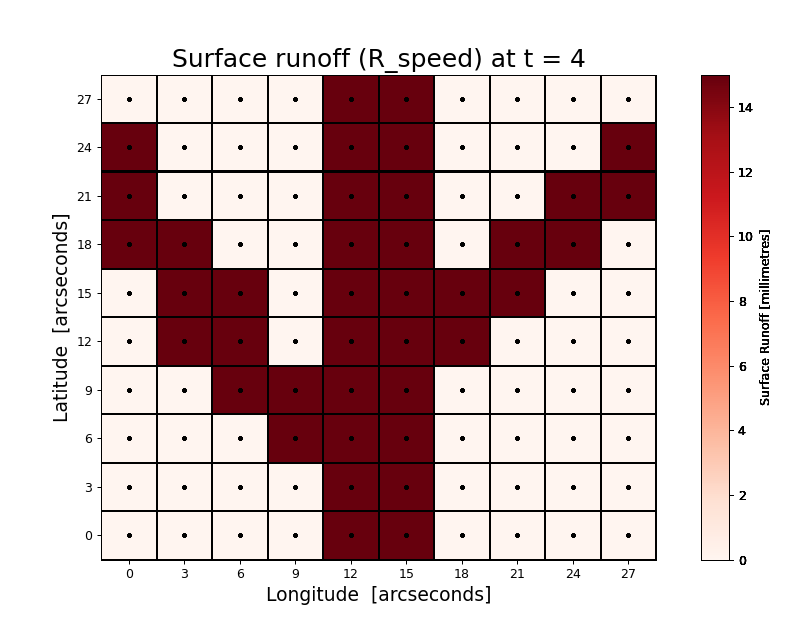

In [60]:
# Make a movie showing the surface runoff speed maps through time:

fig, ax = plt.subplots(figsize=[9,7])

def R_speed_animate(t):
    
    # Give title to the plot:
    ax.set_title('Surface runoff (R_speed) at t = %d' %(t), size = 20)
        
    # Create a mesh:
    xx, yy = np.meshgrid(lon_arc, lat_arc)

    # Plot the mesh:
    ax.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')
      
    # Plot colors that correspond to the surface runoff values at t:
    c = ax.pcolormesh(x, y, R_speed[:,:,t], edgecolors='black', linewidths=1, vmin=0, vmax=15, cmap='Reds')

    # Colorbar:
    div = make_axes_locatable(ax)
    cax1 = div.append_axes('right', size='5%', pad=0.5)
    cbar = plt.colorbar(c, cax=cax1)
    cbar.set_label('Surface Runoff [millimetres]')
    
    # Step sizes for the axes:
    ax.set_xticks(lon_arc)
    ax.set_yticks(lat_arc)

    # Titels for the axes: 
    ax.set_xlabel('Longitude  [arcseconds]', size = 15)
    ax.set_ylabel('Latitude  [arcseconds]', size = 15)
    
    return ax

anim = matplotlib.animation.FuncAnimation(fig, R_speed_animate, frames = Time)

plt.show()

#anim.save('Runoff_speed_&_direction.gif')

In [61]:
# Make one surface runoff direction array by combining the surface runoff directions on land (q array) with the 
# "surface runoff" directions in the river (ri array):

R_dir = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (LU[i,j] == 0):           # River
            R_dir[i,j] = ri[i,j]
        
        else:
            R_dir[i,j] = q[i,j]

print('R_dir:')
print(R_dir)


R_dir:
[[1003. 1003. 1003. 1003. 3005. 3005. 1007. 1007. 1007. 1007.]
 [1005. 1005. 1002. 1003. 3005. 3005. 1007. 1005. 1005. 1005.]
 [1003. 1002. 1003. 3003. 3005. 3005. 1007. 1007. 1000. 1000.]
 [1002. 1003. 3003. 3005. 3005. 3005. 1007. 1000. 1007. 1007.]
 [1003. 3003. 3005. 1007. 3005. 3005. 3007. 1007. 1000. 1007.]
 [1003. 3003. 3005. 1007. 3005. 3005. 3005. 3007. 1007. 1000.]
 [3003. 3005. 1007. 1003. 3005. 3005. 1007. 3005. 3007. 1001.]
 [3005. 1007. 1003. 1003. 3005. 3005. 1007. 1005. 3005. 3007.]
 [3005. 1007. 1003. 1003. 3005. 3005. 1007. 1004. 1005. 3005.]
 [1005. 1004. 1003. 1003. 3005. 3005. 1007. 1007. 1004. 1005.]]


In [62]:
# Make a vector field for the surface runoff directions, in which uuu contains the zonalcomponents of the vectors and vvv 
# the meridional:

uuu = np.empty((n_row,n_col))
vvv = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (R_dir[i,j] == 1000 or R_dir[i,j] == 3000):
            uuu[i,j] = -1
            vvv[i,j] = 1
        if (R_dir[i,j] == 1001 or R_dir[i,j] == 3001):
            uuu[i,j] = 0
            vvv[i,j] = 1
        if (R_dir[i,j] == 1002 or R_dir[i,j] == 3002):
            uuu[i,j] = 1
            vvv[i,j] = 1
        if (R_dir[i,j] == 1003 or R_dir[i,j] == 3003):
            uuu[i,j] = 1
            vvv[i,j] = 0
        if (R_dir[i,j] == 1004 or R_dir[i,j] == 3004):
            uuu[i,j] = 1
            vvv[i,j] = -1
        if (R_dir[i,j] == 1005 or R_dir[i,j] == 3005):
            uuu[i,j] = 0
            vvv[i,j] = -1
        if (R_dir[i,j] == 1006 or R_dir[i,j] == 3006):
            uuu[i,j] = -1
            vvv[i,j] = -1
        if (R_dir[i,j] == 1007 or R_dir[i,j] == 3007):
            uuu[i,j] = -1
            vvv[i,j] = 0

<IPython.core.display.Javascript object>


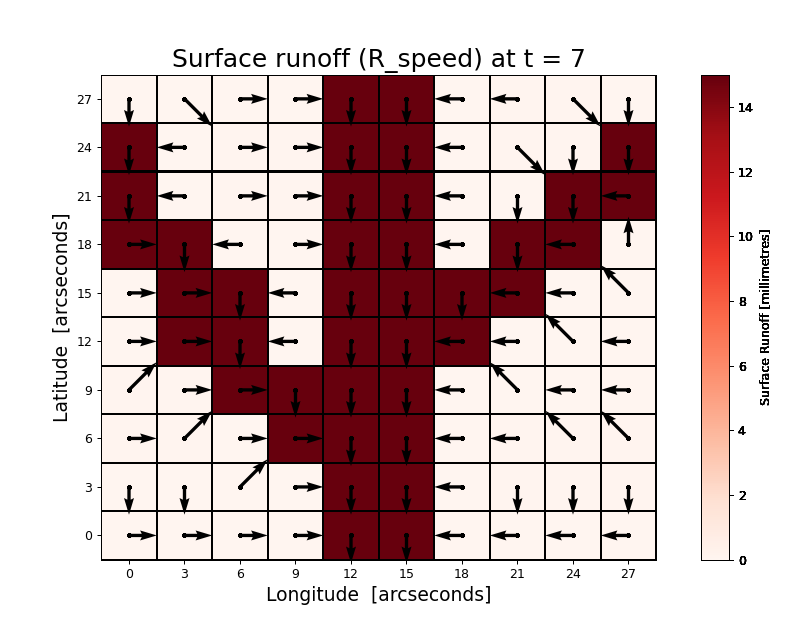

In [63]:
# Make a movie showing the surface runoff speed and direction maps through time:

fig, ax = plt.subplots(figsize=[9,7])

def R_speed_animate(t):
    
    # Give title to the plot:
    ax.set_title('Surface runoff (R_speed) at t = %d' %(t), size = 20)
    
    # Create a mesh:
    xx, yy = np.meshgrid(lon_arc, lat_arc)

    # Plot the mesh:
    ax.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')
    
    # Plot colors that correspond to the surface runoff values at t:
    c = ax.pcolormesh(x, y, R_speed[:,:,t], edgecolors='black', linewidths=1, vmin=0, vmax=15, cmap='Reds')

    # Colorbar:
    div = make_axes_locatable(ax)
    cax1 = div.append_axes('right', size='5%', pad=0.5)
    cbar = plt.colorbar(c, cax=cax1)
    cbar.set_label('Surface Runoff [millimetres]')
    
    # Plot vectors that correspond to the surface runoff directions:
    ax.quiver(xx,yy, uuu, vvv, color = 'black', pivot='tail', scale = 20)
         
    # Define the step sizes on the x and y axes:
    ax.set_xticks(lon_arc)
    ax.set_yticks(lat_arc)

    # Titels for the axes: 
    ax.set_xlabel('Longitude  [arcseconds]', size = 15)
    ax.set_ylabel('Latitude  [arcseconds]', size = 15)
    
    return ax

anim = matplotlib.animation.FuncAnimation(fig, R_speed_animate, frames = Time)

plt.show()

#anim.save('Runoff_speed_&_direction.gif')

In [64]:
############################################################################################################################
#################################### S U R F A C E  R U N O F F  T H R E S H O L D S #######################################
############################################################################################################################

In [65]:
# Here we calculate the Surface runoff Thresholds (R_T):

# The surface runoff threshold values are stored in ParVal[9] to ParVal[58] at the top of the program and can be set by
# the user

R_T_lus = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        slope_rad    = np.arctan(Q[i,j])
        
        # River:
        if(LU[i,j] == 0):              
            R_T_lus[i,j] = R_T_R        
        
        # Bare land:
        if(LU[i,j] == 100):                      
            if(slope_rad >= 0): # cell is surrounded by cells with higher topographies
                R_T_lus[i,j] = R_T_B_0
            if(slope_rad >= -0.17 and slope_rad < 0):
                R_T_lus[i,j] = R_T_B_1
            if(slope_rad >= -0.35 and slope_rad < -0.17):
                R_T_lus[i,j] = R_T_B_2
            if(slope_rad >= -0.52 and slope_rad < -0.35):
                R_T_lus[i,j] = R_T_B_3
            if(slope_rad >= -0.70 and slope_rad < -0.52):
                R_T_lus[i,j] = R_T_B_4
            if(slope_rad >= -0.87 and slope_rad < -0.70):
                R_T_lus[i,j] = R_T_B_5
            if(slope_rad >= -1.05 and slope_rad < -0.87):
                R_T_lus[i,j] = R_T_B_6
            if(slope_rad >= -1.22 and slope_rad < -1.05):
                R_T_lus[i,j] = R_T_B_7
            if(slope_rad >= -1.40 and slope_rad < -1.22):
                R_T_lus[i,j] = R_T_B_8
            if(slope_rad >= -1.57 and slope_rad < -1.40):
                R_T_lus[i,j] = R_T_B_9
        
        # Forest:
        if(LU[i,j] == 200):            
            if(slope_rad >= 0): # cell is surrounded by cells with higher topographies
                R_T_lus[i,j] = R_T_F_0
            if(slope_rad >= -0.17 and slope_rad < 0):
                R_T_lus[i,j] = R_T_F_1
            if(slope_rad >= -0.35 and slope_rad < -0.17):
                R_T_lus[i,j] = R_T_F_2
            if(slope_rad >= -0.52 and slope_rad < -0.35):
                R_T_lus[i,j] = R_T_F_3
            if(slope_rad >= -0.70 and slope_rad < -0.52):
                R_T_lus[i,j] = R_T_F_4
            if(slope_rad >= -0.87 and slope_rad < -0.70):
                R_T_lus[i,j] = R_T_F_5
            if(slope_rad >= -1.05 and slope_rad < -0.87):
                R_T_lus[i,j] = R_T_F_6
            if(slope_rad >= -1.22 and slope_rad < -1.05):
                R_T_lus[i,j] = R_T_F_7
            if(slope_rad >= -1.40 and slope_rad < -1.22):
                R_T_lus[i,j] = R_T_F_8
            if(slope_rad >= -1.57 and slope_rad < -1.40):
                R_T_lus[i,j] = R_T_F_9        
        
        # Agricultural land:
        if(LU[i,j] == 300):            
            if(slope_rad >= 0): # cell is surrounded by cells with higher topographies
                R_T_lus[i,j] = R_T_A_0
            if(slope_rad >= -0.17 and slope_rad < 0):
                R_T_lus[i,j] = R_T_A_1
            if(slope_rad >= -0.35 and slope_rad < -0.17):
                R_T_lus[i,j] = R_T_A_2
            if(slope_rad >= -0.52 and slope_rad < -0.35):
                R_T_lus[i,j] = R_T_A_3
            if(slope_rad >= -0.70 and slope_rad < -0.52):
                R_T_lus[i,j] = R_T_A_4
            if(slope_rad >= -0.87 and slope_rad < -0.70):
                R_T_lus[i,j] = R_T_A_5
            if(slope_rad >= -1.05 and slope_rad < -0.87):
                R_T_lus[i,j] = R_T_A_6
            if(slope_rad >= -1.22 and slope_rad < -1.05):
                R_T_lus[i,j] = R_T_A_7
            if(slope_rad >= -1.40 and slope_rad < -1.22):
                R_T_lus[i,j] = R_T_A_8
            if(slope_rad >= -1.57 and slope_rad < -1.40):
                R_T_lus[i,j] = R_T_A_9        
        
        # Urban land:
        if(LU[i,j] == 400):            
            if(slope_rad >= 0): # cell is surrounded by cells with higher topographies
                R_T_lus[i,j] = R_T_U_0
            if(slope_rad >= -0.17 and slope_rad < 0):
                R_T_lus[i,j] = R_T_U_1
            if(slope_rad >= -0.35 and slope_rad < -0.17):
                R_T_lus[i,j] = R_T_U_2
            if(slope_rad >= -0.52 and slope_rad < -0.35):
                R_T_lus[i,j] = R_T_U_3
            if(slope_rad >= -0.70 and slope_rad < -0.52):
                R_T_lus[i,j] = R_T_U_4
            if(slope_rad >= -0.87 and slope_rad < -0.70):
                R_T_lus[i,j] = R_T_U_5
            if(slope_rad >= -1.05 and slope_rad < -0.87):
                R_T_lus[i,j] = R_T_U_6
            if(slope_rad >= -1.22 and slope_rad < -1.05):
                R_T_lus[i,j] = R_T_U_7
            if(slope_rad >= -1.40 and slope_rad < -1.22):
                R_T_lus[i,j] = R_T_U_8
            if(slope_rad >= -1.57 and slope_rad < -1.40):
                R_T_lus[i,j] = R_T_U_9        
        
        # Grass/shrubland:
        if(LU[i,j] == 500):            
            if(slope_rad >= 0): # cell is surrounded by cells with higher topographies
                R_T_lus[i,j] = R_T_G_0
            if(slope_rad >= -0.17 and slope_rad < 0):
                R_T_lus[i,j] = R_T_G_1
            if(slope_rad >= -0.35 and slope_rad < -0.17):
                R_T_lus[i,j] = R_T_G_2
            if(slope_rad >= -0.52 and slope_rad < -0.35):
                R_T_lus[i,j] = R_T_G_3
            if(slope_rad >= -0.70 and slope_rad < -0.52):
                R_T_lus[i,j] = R_T_G_4
            if(slope_rad >= -0.87 and slope_rad < -0.70):
                R_T_lus[i,j] = R_T_G_5
            if(slope_rad >= -1.05 and slope_rad < -0.87):
                R_T_lus[i,j] = R_T_G_6
            if(slope_rad >= -1.22 and slope_rad < -1.05):
                R_T_lus[i,j] = R_T_G_7
            if(slope_rad >= -1.40 and slope_rad < -1.22):
                R_T_lus[i,j] = R_T_G_8
            if(slope_rad >= -1.57 and slope_rad < -1.40):
                R_T_lus[i,j] = R_T_G_9        

print('R_T_lus:')
print(R_T_lus)

R_T_lus:
[[3. 3. 3. 3. 0. 0. 3. 3. 3. 3.]
 [5. 5. 7. 7. 0. 0. 5. 2. 2. 2.]
 [2. 2. 7. 0. 0. 0. 5. 2. 2. 2.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5. 5.]
 [4. 0. 0. 4. 0. 0. 0. 4. 4. 4.]
 [4. 0. 0. 4. 0. 0. 0. 0. 4. 4.]
 [0. 0. 4. 4. 0. 0. 7. 0. 0. 4.]
 [0. 5. 2. 2. 0. 0. 7. 7. 0. 0.]
 [0. 5. 2. 2. 0. 0. 7. 2. 2. 0.]
 [7. 5. 5. 5. 0. 0. 7. 2. 2. 5.]]


<IPython.core.display.Javascript object>


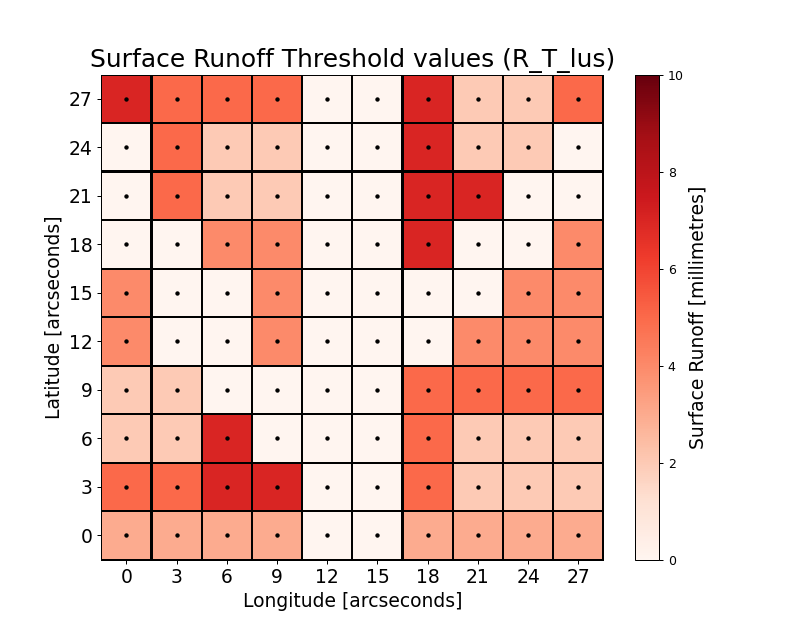

In [66]:
# Make a plot showing the surface runoff thresholds map:

# Create a new figure:
plt.figure(figsize=[9,7])

# Title for the plot:
plt.title("Surface Runoff Threshold values (R_T_lus)", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the surface runoff threshold values:
c = plt.pcolormesh(x,y, R_T_lus, edgecolors='black', linewidths=1, vmin = 0, vmax = 10, cmap = 'Reds')

# Add a color scale bar:
cbar = plt.colorbar()

# Assign a label to the color scale bar:
cbar.set_label('Surface Runoff [millimetres]', size = 15)

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [67]:
###########################################################################################################################
### Wind and (rainfall) surface runoff conditions combined in one movie and graph #########################################
###########################################################################################################################

<IPython.core.display.Javascript object>


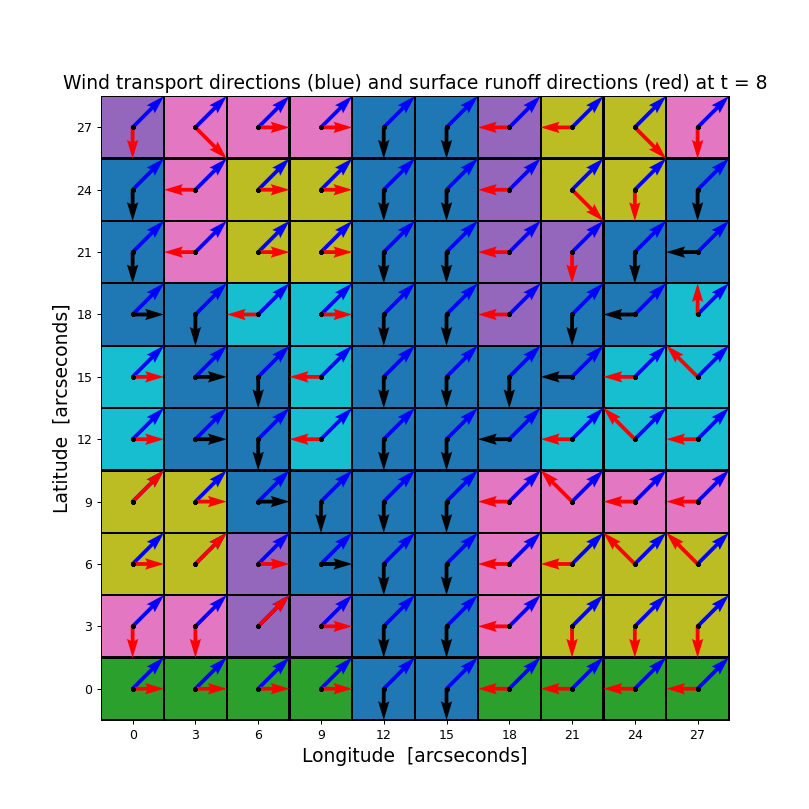

In [68]:
# Make a movie showing the wind and surface runoff directions through time:

fig, ax = plt.subplots(figsize=[9,9])

def W_and_R_dir_animate(t):
    
    # Give title to the plot:
    ax.set_title('Wind transport directions (blue) and surface runoff directions (red) at t = %d' %(t), size = 15)
    
    # Create a mesh:
    xx, yy = np.meshgrid(lon_arc, lat_arc)

    # Plot the mesh:
    ax.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')
    
    # Plot colors that correspond to land use id's:
    c = plt.pcolormesh(x, y, LU, edgecolors='black', linewidths=1, cmap = 'tab10')
        
    # Plot vectors that correspond to the wind transport directions on t:
    ax.quiver(xx,yy, u[:,:,t], v[:,:,t], color = 'blue', pivot='tail', scale = 20)
    
    # Plot vectors that correspond to the surface runoff directions on land (i.e. the steepest terrain slope directions):
    ax.quiver(xx,yy, U, V, color = 'red', pivot='tail', scale = 20)
    
    # Plot vectors that correspond to the river flow directions:
    ax.quiver(xx,yy, uu, vv, color = 'black', pivot='tail', scale = 20)
    
    # Step sizes for the axes:
    ax.set_xticks(lon_arc)
    ax.set_yticks(lat_arc)

    # Titels for the axes: 
    ax.set_xlabel('Longitude  [arcseconds]', size = 15)
    ax.set_ylabel('Latitude  [arcseconds]', size = 15)
    
    return ax

anim = matplotlib.animation.FuncAnimation(fig, W_and_R_dir_animate, frames = Time)

plt.show()

<IPython.core.display.Javascript object>


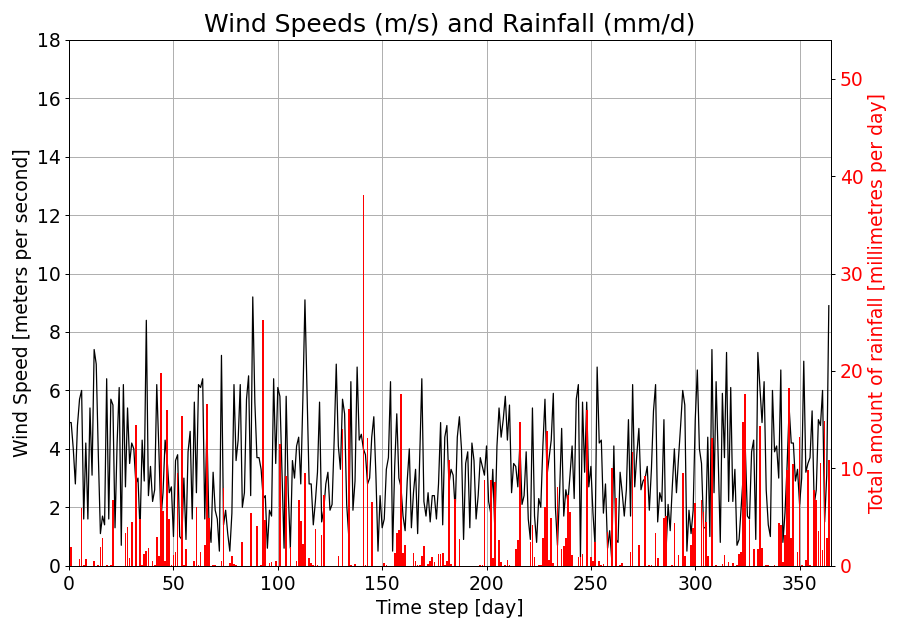

In [69]:
# Wind and rainfall in one graph:

# Create a new figure:
fig, ax1 = plt.subplots(figsize=[10,7])

# Title for the plot:
plt.title("Wind Speeds (m/s) and Rainfall (mm/d)", size = 20)

# Add grid lines:
plt.grid()


# For the common x-axis:

# Title x-axis:
ax1.set_xlabel('Time step [day]', size = 15)

# Step sizes x-axis:
ax1.tick_params(axis = 'x', labelsize = 15, labelcolor = 'black')

# Limits the the x-axis:
ax1.set_xlim(0, 365)


# For the left y-axis:

# Title for left y-axis:
ax1.set_ylabel('Wind Speed [meters per second]', size = 15, color = 'black')

# Plot the wind speed values:
ax1.plot(Time, w_speed_value, color = 'black', linewidth = 1)

# Step sizes for left y-axis:
ax1.tick_params(axis = 'y', labelsize = 15, labelcolor = 'black')

# Limits of the left y-axis:
ax1.set_ylim(0, 18)


# Re-use the x-axis:
ax2 = ax1.twinx()


# For the right y-axis:

# Title for right y-axis:
ax2.set_ylabel('Total amount of rainfall [millimetres per day]', size = 15, color = 'red')

# Plot the rainfall values:
ax2.bar(Time, rainfall_value, color = 'red', linewidth = 1)

# Step sizes for right y-axis:
ax2.tick_params(axis = 'y', labelsize = 15, labelcolor = 'red')

# Limits of the right y-axis:
ax2.set_ylim(0, 54)


fig.tight_layout()

# Show the plot:
plt.show()

In [70]:
############################################################################################################################
########################################## M O B I L I S A T I O N  M A P S ################################################
############################################################################################################################

In [71]:
# Check where and at which time steps the wind and/or surface runoff thresholds are passed:

Check = np.zeros((n_row, n_col, Time_range))

for t in Time:

    for i in np.arange(0,n_row,1):

        for j in np.arange(0,n_col,1):

            if(W_T == 1):     # the wind threshold only depends on the land use (use 'W_T_lu' array)
            
                if(W_speed[i,j,t] >= W_T_lu[i,j] and R_speed[i,j,t] < R_T_lus[i,j]):        # the wind threshold is passed
                    Check[i,j,t] = 1
                    continue

                if(R_speed[i,j,t] >= R_T_lus[i,j] and W_speed[i,j,t] < W_T_lu[i,j]):        # the surface runoff threshold is passed
                    Check[i,j,t] = 2
                    continue

                if(W_speed[i,j,t] >= W_T_lu[i,j] and R_speed[i,j,t] >= R_T_lus[i,j]):       # both thresholds are passed
                    Check[i,j,t] = 3
                    continue

                if(W_speed[i,j,t] < W_T_lu[i,j] and R_speed[i,j,t] < R_T_lus[i,j]):         # no thresholds are passed
                    Check[i,j,t] = 4
                    continue
            
            
            if(W_T == 2):   # the wind threshold depends on both the land use and the slope (use 'W_T_lus' array)
                
                if(W_speed[i,j,t] >= W_T_lus[i,j,t] and R_speed[i,j,t] < R_T_lus[i,j]):     # the wind threshold is passed
                    Check[i,j,t] = 1
                    continue

                if(R_speed[i,j,t] >= R_T_lus[i,j] and W_speed[i,j,t] < W_T_lus[i,j,t]):     # the runoff threshold is passed
                    Check[i,j,t] = 2
                    continue

                if(W_speed[i,j,t] >= W_T_lus[i,j,t] and R_speed[i,j,t] >= R_T_lus[i,j]):    # both thresholds are passed
                    Check[i,j,t] = 3
                    continue

                if(W_speed[i,j,t] < W_T_lus[i,j,t] and R_speed[i,j,t] < R_T_lus[i,j]):      # no thresholds are passed
                    Check[i,j,t] = 4
                    continue


<IPython.core.display.Javascript object>


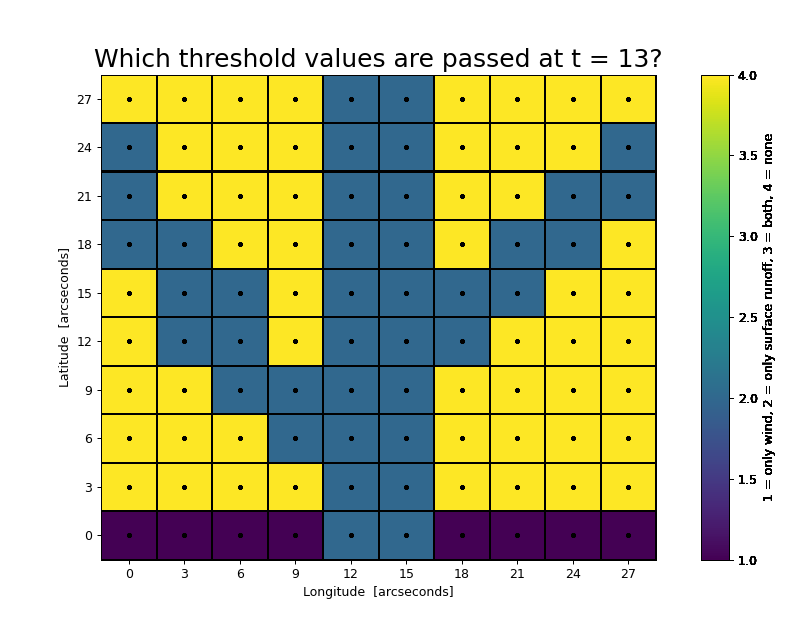

In [72]:
# Make a movie showing the mobilisation maps through time:

fig, ax = plt.subplots(figsize=[9,7])

def W_and_R_thresholds_animate(t):
    
    # Give title to the plot:
    ax.set_title('Which threshold values are passed at t = %d?' %(t), size = 20)
    
    # Create a mesh:
    xx, yy = np.meshgrid(lon_arc, lat_arc)

    # Plot the mesh:
    ax.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')
    
    # Plot colors that correspond to the Check values at t:
    c = ax.pcolormesh(x, y, Check[:,:,t], edgecolors='black', linewidths=1, vmin=1, vmax=4)

    # Colorbar:
    div = make_axes_locatable(ax)
    cax1 = div.append_axes('right', size='5%', pad=0.5)
    cbar = plt.colorbar(c, cax=cax1)
    cbar.set_label('1 = only wind, 2 = only surface runoff, 3 = both, 4 = none')
    
    # Step sizes for the axes:
    ax.set_xticks(lon_arc)
    ax.set_yticks(lat_arc)

    # Titels for the axes: 
    ax.set_xlabel('Longitude  [arcseconds]')
    ax.set_ylabel('Latitude  [arcseconds]')
    
    return ax

anim = matplotlib.animation.FuncAnimation(fig, W_and_R_thresholds_animate, frames = Time)

plt.show()

<IPython.core.display.Javascript object>


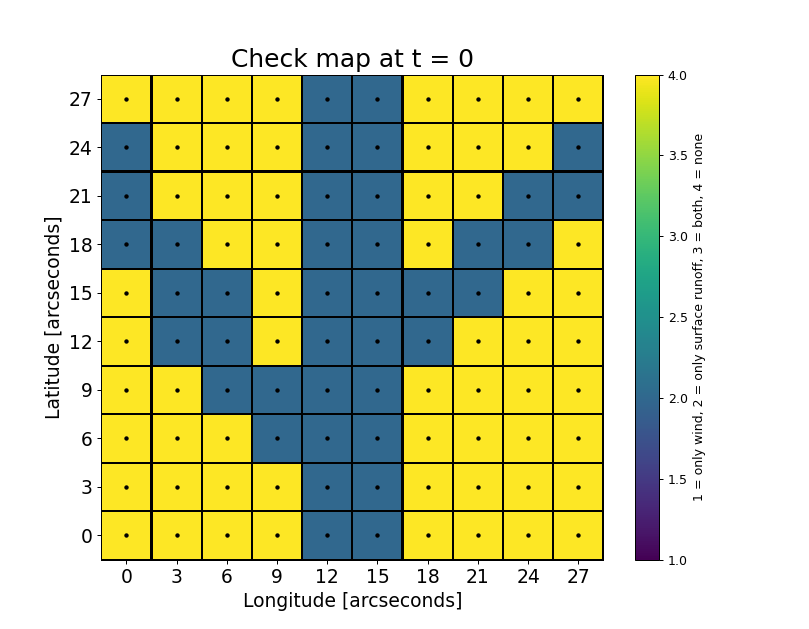

In [73]:
# Make a plot showing the mobilisation map for a single time step:

# Create a new figure:
plt.figure(figsize=[9,7])

# Title for the plot:
plt.title("Check map at t = 0", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the Check values at t:
c = plt.pcolormesh(x,y, Check[:,:,0], edgecolors='black', linewidths=1, vmin=1, vmax=4)

# Add a color scale bar:
cbar = plt.colorbar()

# Assign a label to the color scale bar:
cbar.set_label('1 = only wind, 2 = only surface runoff, 3 = both, 4 = none')

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [74]:
############################################################################################################################
######################## M I S M A N A G E D  P L A S T I C  W A S T E  G E N E R A T I O N ################################
############################################################################################################################

In [75]:
# We use a simple equation introduced by Lebreton and Andrady (2019) to calculate for each grid cell the mass of
# Mismanaged Plastic Waste (MPW):

# Total plastic waste generated in grid cell x in 1 year, A(x), is calcuated as follows:

# A_yearly(x) = PP  *  MSW_capita  *  Y(x)

# where PP is the average Proportion of Plastic in solid waste 
# MSW_capita is the amount of Municipal Solid Waste (MSW) generated per capita per year
# Y(x) is the number of people living in grid cell x


# Only a fraction of A_yearly(x) is MISMANAGED, i.e. enters the natural environment, we call this the MPW production of 
# grid cell x in 1 year and is calculated as follows:

# MPW_yearly(x) = MWF  *  A_yearly(x)

# where MWF is the Mismanaged Waste Fraction

# Here, we use (see ParVal array at the top of the program):
# PP          = 0.19                --> which is the plastic fraction value for the Netherlands (Lebreton & Andrady, 2019)
# MSW_capita  = 526 kg per year     --> which is the MS_c value for the Netherlands             (Lebreton & Andrady, 2019)
# MWF         = 0.01                --> which is the mismanaged fraction for the Netherlands    (Lebreton & Andrady, 2019)


# In order to obtain the MPW production in grid cell x per day:

# MPW(x) = MPW_yearly(x) / 365


#---------------------------------------------------------------------------------------------------------------------------

# ASSUMPTIONS!!!

# As mentioned by Lebreton and Andrady, the amount of municipal solid waste generated per capita differs between urban
# and rural areas. However, the dataset that they made available only contains one MS_c value per country and not the
# MS_c for rural and the MS_c for urban areas... Therefore, our model does not distuinshing between the MSW generation
# in urban or rural areas and assumes that all people, regardless of where they live, generate the same amount of 
# municipal solid waste.
    
# We assume that the amount of MPW generated in 1 grid cell is the same each day, as we divided the total amount of MPW
# generated in 1 grid cell in 1 year by 365 to obtain the daily MPW production. This means that the MPW input map is
# the same for each time step.

#---------------------------------------------------------------------------------------------------------------------------

MPW_input_map = np.zeros((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
            
            MPW_input_map[i,j] = ( MWF * PP * MSW_capita * 1000 * Y[i,j] )  /  ( 365 )     # x1000 to go to grams

MPW_input_map = np.round(MPW_input_map, 2)            

print('Daily MPW_input_map:')
print(MPW_input_map[:,:])
            
            
# Make 3D array that contains all plastic input array for all timesteps:

p_conc_INPUT = np.empty((n_row,n_col,Time_range))

for t in Time:
          
    p_conc_INPUT[:,:,t] = MPW_input_map[:,:]


Daily MPW_input_map:
[[  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  5.48   0.     0.27   0.27   0.     0.    10.95 109.52 136.9  136.9 ]
 [ 82.14  82.14   0.27   0.     0.     0.     0.   109.52 109.52 109.52]
 [ 82.14  82.14   0.     0.     0.     0.     0.     0.    10.95   0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.27   0.     0.     0.  ]
 [  0.     0.    54.76  54.76   0.     0.     0.27   0.27   0.     0.  ]
 [  0.     0.    54.76  54.76   0.     0.     0.27  27.38  27.38   0.  ]
 [  0.27  10.95   0.     5.48   0.     0.     0.27  27.38  27.38   0.  ]]


<IPython.core.display.Javascript object>


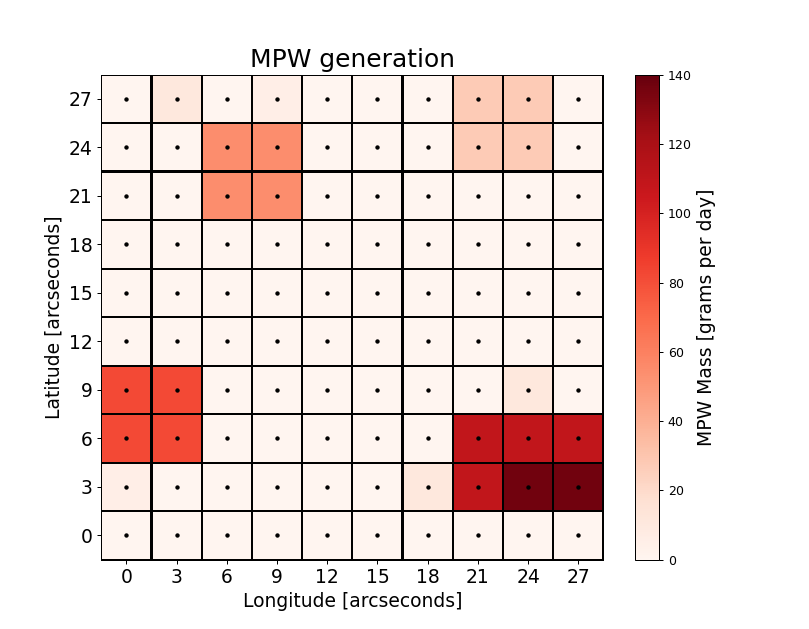

In [76]:
# Make a plot showing the MPW input map:

# Create a new figure:
plt.figure(figsize=[9,7])

# Title for the plot:
plt.title("MPW generation", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the MPW input values:
c = plt.pcolormesh(x,y, MPW_input_map[:,:], edgecolors='black', linewidths=1, vmin=0, vmax=140, cmap = 'Reds')

# Add a color scale bar:
cbar = plt.colorbar()

# Assign a label to the color scale bar:
cbar.set_label('MPW Mass [grams per day]', size = 15)

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [77]:
IN = np.empty(Time_range)

for t in Time:
          
    IN[t] = np.sum(MPW_input_map[:,:])

#print(IN[:])

<IPython.core.display.Javascript object>


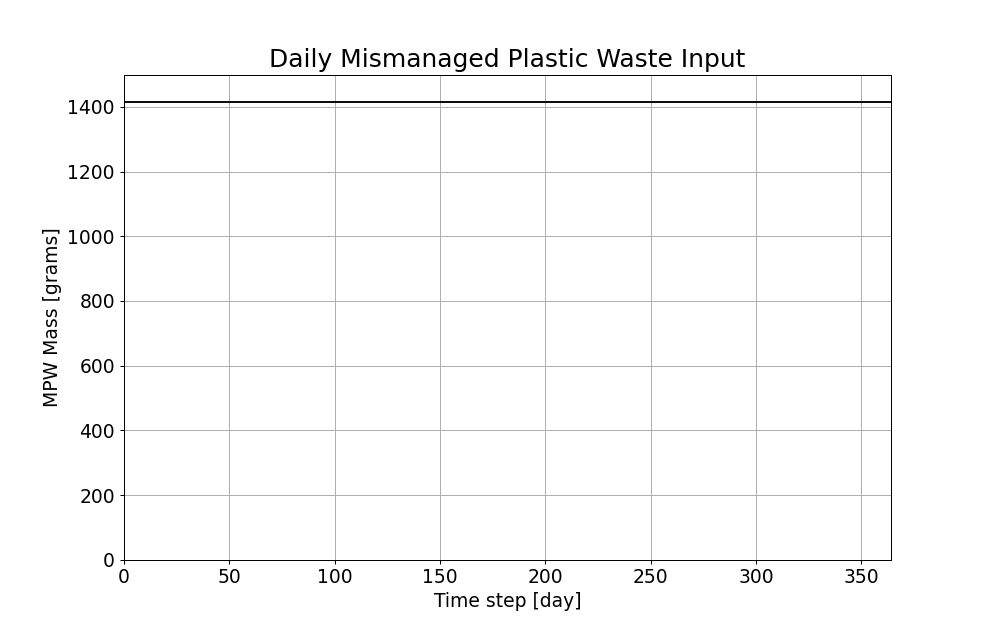

In [78]:
# Make a graph showing the MPW input for each time step:

# Create a new figure:
plt.figure(figsize= [11,7])

# Title for the plot:
plt.title("Daily Mismanaged Plastic Waste Input", size = 20)

# Add grid lines:
plt.grid()

# Plot the MPW daily input values:
plt.plot(Time, IN, color = 'black')

# Size of the numbers on the axes:
plt.tick_params(axis='both', which='major', labelsize = 15)
plt.tick_params(axis='both', which='minor', labelsize = 15)

# Titels for the axes:
plt.xlabel('Time step [day]', size = 15)
plt.ylabel('MPW Mass [grams]', size = 15)

# Limits of the axes:
plt.xlim([ 0, 364])
plt.ylim([0, 1500])

# Show the plot:
plt.show()

In [79]:
IN_cum = np.empty(Time_range)

IN_cum = np.cumsum(IN)


<IPython.core.display.Javascript object>


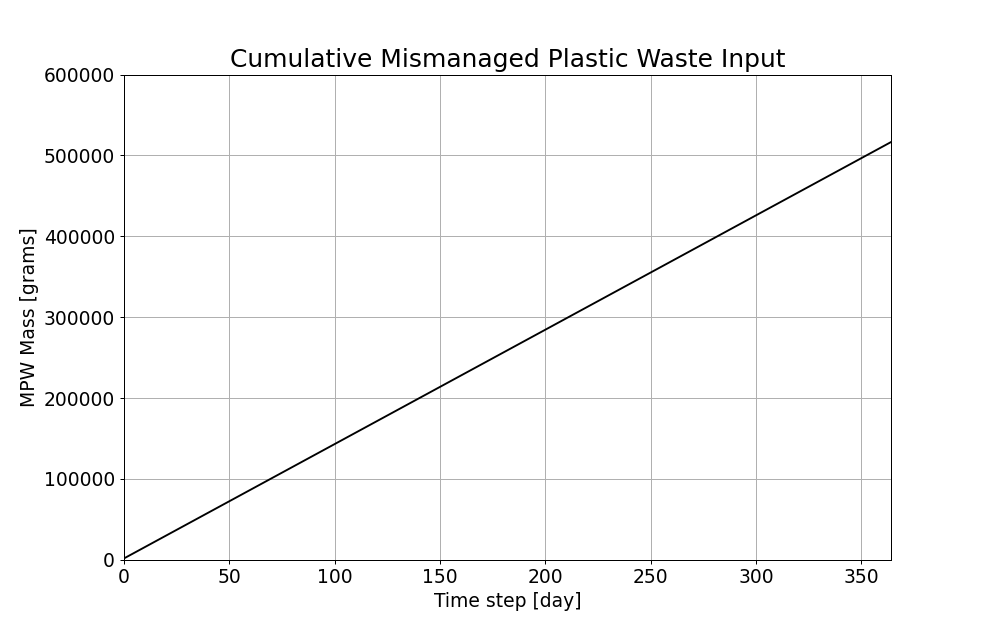

In [80]:
# Make a graph showing the cumulative MPW input for each time step:

# Create a new figure and give it a title:
plt.figure(figsize=[11,7])

# Title for the plot:
plt.title("Cumulative Mismanaged Plastic Waste Input", size = 20)

# Add grid lines:
plt.grid()

# Plot the cumulative MPW input values:
plt.plot(Time, IN_cum, color = 'black')

# Size of the numbers on the axes:
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Titels for the axes:
plt.xlabel('Time step [day]', size = 15)
plt.ylabel('MPW Mass [grams]', size = 15)

# Limits of the axes:
plt.xlim([ 0, 364])
plt.ylim([0, 600000])

# Show the plot:
plt.show()

In [81]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
################################################# T R A C K I N G  T R A S H ###############################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [82]:
# See User's manual for detailed explaination of the computation of the MPW movements and 
# distributions

p_conc_start        = np.zeros((n_row, n_col, Time_range))
p_conc_end          = np.zeros((n_row, n_col, Time_range))
              
OUT_river           = np.zeros(Time_range)
OUT_coast           = np.zeros(Time_range)
OUT_land            = np.zeros(Time_range)
OUT_total           = np.zeros(Time_range)

Riverine_plastic    = np.zeros(Time_range)
Terrestrial_plastic = np.zeros(Time_range)


for t in Time:

    #print('######################################################################################################')
    #print('t =', t)
    #print('######################################################################################################')

    if (t == 0):
        p_conc_start[:,:,t] = p_conc_INPUT[:,:,t]
        
        #print('---------------------------------------------------------------------------------------------')
        #print('Start map for t =', t)
        #print(p_conc_start[:,:,t])
        #print('---------------------------------------------------------------------------------------------')
        
    else:
        p_conc_start[:,:,t] = p_conc_end[:,:,(t-1)] + p_conc_INPUT[:,:,t]

        #print('---------------------------------------------------------------------------------------------')
        #print('Start map for t =', t)
        #print(p_conc_start[:,:,t])
        #print('---------------------------------------------------------------------------------------------')
        
    for i in np.arange(0, n_row, 1):

        #print(' ')
        #print(' ')
        #print('i =', i)
        
        for j in np.arange(0, n_col, 1):
            
            #print(' ')
            #print('j =', j)
            
            if (p_conc_start[i,j,t] == 0):
                
                #print('No trash present in this grid cell at the beginning of this time step')
                continue
            
            else:
                           
                if (LU[i,j] == 0):                     # in river

                    #print('This trash cluster lies in river and flows with river stream')
                    
                    move_to = R_dir[i,j] - 3000
            
                else:                                  # on land

                    #print('This trash cluster lies on land')
                    #print('Wind speed at t =', t, '      :', W_speed[i,j,t])
                    #print('Wind speed threshold       :', W_T_lu[i,j])
                    #print('Surface runoff at t =', t, ':', R_speed[i,j,t])
                    #print('Surface runnoff threshold          :', R_T_lus[i,j])
                
                
                    # Only the wind threshold value is passed:

                    if (Check[i,j,t] == 1):

                        move_to = W_dir[i,j,t] - 2000

                        #print('As you can see, only the wind treshold value is passed during t =', t)


                    # Only the surface runoff threshold value is passed:

                    elif (Check[i,j,t] == 2):

                        move_to = R_dir[i,j] - 1000

                        #print('As you can see, only the surface runoff treshold value is passed here at t =', t)


                    # Both the wind and the surface runoff threshold value are passed:

                    elif (Check[i,j,t] == 3):

                        #print('As you can see, both the wind and the surface runoff threshold values are passed here 
                        # at t =', t)

                        M3 = np.random.randint(2, size=1)

                        #print('  M3 =', M3)

                        if (M3 == 0):
                            move_to = W_dir[i,j,t] - 2000

                        else:
                            move_to = R_dir[i,j] - 1000

                    # Neither the wind nor the surface runoff threshold value is passed:

                    else:

                        #print('As you can see, neither the wind nor the surface runoff treshold value is passed here 
                        #at t =', t,'go to the next cell')   

                        move_to = 8

                ############################################################################################################
                
                # Calculate the new location of the trash cluster:

                # READ ME! IMPORTANT! (See User's Manual for detailed explaination) 

                # The changes (+/- 1) for the i and j values that you see below may seem counterintuitive, but remember
                # they are mirrored over the 0 axis, because all data arrays that we use are flipped over the 0 axis! This
                # is because numpy sees the upper left location in an array as i = 0 & j = 0, which does not correspond with 
                # latitude = 0 & longitude = 0. So the i_new and j_new values are "flipped" (and therefore counterintuitive)
                # because the p_conc map is also a "flipped" array. When you plot a "flipped" array, you will see that it 
                # results in the correct distribution on a longitude,latitude map.

                #-----------------------------------------------------------------------------------------------------------

                if (move_to == 0):
                # the trash cluster moves to the cell in the northwest and the new location indices become:        

                    i_new = i + 1
                    j_new = j - 1

                    #print('--> During time step', t, 'the trash moves to the cell in the northwest')
                    #print('i_new = ', i_new)
                    #print('j_new = ', j_new)

                #-----------------------------------------------------------------------------------------------------------

                if (move_to == 1):
                # the trash cluster moves to the cell in the north and the new location indices become:

                    i_new = i + 1
                    j_new = j

                    #print('--> During time step', t, 'the trash moves to the cell in the north')
                    #print('i_new = ', i_new)
                    #print('j_new = ', j_new)

                #-----------------------------------------------------------------------------------------------------------

                if (move_to == 2):
                # the trash cluster moves to the cell in the northeast and the new location indices become:        

                    i_new = i + 1
                    j_new = j + 1

                    #print('--> During time step', t, 'the trash moves to the cell in the northeast')
                    #print('i_new = ', i_new)
                    #print('j_new = ', j_new)

                #-----------------------------------------------------------------------------------------------------------

                if (move_to == 3):
                # the trash cluster moves to the cell in the east and the new location indices become:

                    i_new = i
                    j_new = j + 1

                    #print('--> During time step', t, 'the trash moves to the cell in the east')
                    #print('i_new = ', i_new)
                    #print('j_new = ', j_new)

                #-----------------------------------------------------------------------------------------------------------

                if (move_to == 4):
                # the trash cluster moves to the cell in the southeast and the new location indices become:

                    i_new = i - 1
                    j_new = j + 1

                    #print('--> During time step', t, 'the trash moves to the cell in the southeast')
                    #print('i_new = ', i_new)
                    #print('j_new = ', j_new)

                #-----------------------------------------------------------------------------------------------------------

                if (move_to == 5):
                # the trash cluster moves to the cell in the south and the new location indices become:

                    i_new = i - 1
                    j_new = j

                    #print('--> During time step', t, 'the trash moves to the cell in the south')
                    #print('i_new = ', i_new)
                    #print('j_new = ', j_new)

                #-----------------------------------------------------------------------------------------------------------

                if (move_to == 6):
                # the trash cluster moves to the cell in the southwest and the new location indices become:

                    i_new = i - 1
                    j_new = j - 1

                    #print('--> During time step', t, 'the trash moves to the cell in the southwest')
                    #print('i_new = ', i_new)
                    #print('j_new = ', j_new)

                #-----------------------------------------------------------------------------------------------------------

                if (move_to == 7):
                # the trash cluster moves to the cell in the west and the new location indices become:

                    i_new = i
                    j_new = j - 1

                    #print('--> During time step', t, 'the trash moves to the cell in the west')
                    #print('i_new = ', i_new)
                    #print('j_new = ', j_new)

                #-----------------------------------------------------------------------------------------------------------

                if (move_to == 8):
                # the trash cluster is not moving at all and the new location indices are the same as the old location 
                # indices:

                    i_new = i
                    j_new = j

                    #print('--> During time step', t, 'the trash does not move, i.e. remains at its current location')
                    #print('i_new = ', i_new)
                    #print('j_new = ', j_new)

                #-----------------------------------------------------------------------------------------------------------

                ############################################################################################################
                
                # Check if the new location of the plastic (i_new, j_new) falls in- or outside the model domain:

                # The trash cluster leaves the domain:
                if((i_new < 0) or (i_new > (n_row - 1)) or (j_new < 0) or (j_new > (n_col - 1))):

                    #print('The trash cluster has left the domain during time step', t)
                    #print(' ')

                    # There are 3 ways in which the plastic trash can leave the domain:
                    #  1. emission to the ocean via the river mouth        --> OUT_river
                    #  2. emission to the ocean via the coast              --> OUT_coast
                    #  3. emission to the land of adjacent river basins    --> OUT_land

                    # because the ocean lies in the south (i.e. i = -1) in this particular toy model:
                    if(i_new == -1):      

                        # because the river mouth lies in column 4 and 5 in this particular toy model:
                        if( (j == 4 or j == 5) and (j_new == 4 or j_new == 5) ):   

                            #print('The trash cluster is emitted to the ocean via the RIVER mouth during timestep', t)
                            OUT_river[t] = OUT_river[t] + p_conc_start[i,j,t]

                        else:

                            #print('The trash cluster is emitted to the ocean via the COAST during timestep', t)
                            OUT_coast[t] = OUT_coast[t] + p_conc_start[i,j,t]

                    else:

                        #print('The trash cluster is emitted to adjacent LAND during timestep', t)
                        OUT_land[t] = OUT_land[t] + p_conc_start[i,j,t]

                    continue        # go to the next grid cell

                # If the trash remains in the domain, put it in the end plastic concentration map of this timestep:
                else:

                    p_conc_end[i_new,j_new,t]  = p_conc_end[i_new,j_new,t] + p_conc_start[i,j,t]

                    if(LU[i_new, j_new] == 0):

                        #print('At the end of time step', t, ', this trahs cluster lies in a river grid cell')

                        Riverine_plastic[t] = Riverine_plastic[t] + p_conc_start[i,j,t]

                    else:

                        #print('At the end of time step', t, ', this trash cluster lies on a land grid cell')

                        Terrestrial_plastic[t] = Terrestrial_plastic[t] + p_conc_start[i,j,t]

############################################################################################################################                        
                        
    #print('End map for t =', t, ':')
    #print(p_conc_end[:,:,t])
                        
############################################################################################################################

print(' ')    
print('OUT_river:')
print(OUT_river[:])
print(' ')    
print('OUT_coast:')
print(OUT_coast[:])
print(' ')    
print('OUT_land:')
print(OUT_land[:])
print(' ')

for t in Time:
    
    OUT_total[t] = OUT_river[t] + OUT_coast[t] + OUT_land[t]
    
print('OUT_total:')
print(OUT_total[:])

############################################################################################################################

OUT_river_cum = np.empty(Time_range)
OUT_coast_cum = np.empty(Time_range)
OUT_land_cum  = np.empty(Time_range)
OUT_total_cum = np.empty(Time_range)

OUT_river_cum = np.cumsum(OUT_river)
OUT_coast_cum = np.cumsum(OUT_coast)
OUT_land_cum  = np.cumsum(OUT_land)
OUT_total_cum = np.cumsum(OUT_total)

print(' ')
print(' ')    
print('OUT_river_cum:')
print(OUT_river_cum[:])
print(' ')    
print('OUT_coast_cum:')
print(OUT_coast_cum[:])
print(' ')    
print('OUT_land_cum:')
print(OUT_land_cum[:])
print(' ')
print('OUT_total_cum:')
print(OUT_total_cum[:])

############################################################################################################################

print(' ')
print(' ')
print('Riverine_plastic:')
print(Riverine_plastic[:])
print(' ')
print('Terrestrial_plastic:')
print(Terrestrial_plastic[:])

############################################################################################################################

Present_in_river_basin = np.empty(Time_range)

for t in Time:
    
    Present_in_river_basin[t] = IN_cum[t] - OUT_total_cum[t]

print(' ')
print(' ')
print('Present_in_river_basin:')
print(Present_in_river_basin[:])

 
OUT_river:
[    0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.    1149.96     0.     958.3    383.32
     0.     383.32     0.     191.66     0.       0.    2217.78     0.
  1752.32   930.92     0.    2190.4      0.    1505.9    821.4      0.
   273.8   3258.22   794.02  1095.2   1478.52   383.32  1149.96  4079.62
  1040.44   355.94   383.32   383.32     0.     164.28  5174.73  4764.12
  4818.88     0.    6899.76   876.16   711.88  3614.16   739.44  2491.58
   958.21   219.04   876.16    54.76  1314.24   301.18  1998.92   547.6
     0.     219.04     0.    2546.34     0.    1067.82   492.84     0.
  1779.7    574.98  1259.48  1067.82   328.56   273.8     54.76   136.9
  1259.48     0.    1013.06   438.08     0.     383.32     0.     191.66
     0.       0.       0.       0.       0.    2710.62     0.    3466.21
  7419.98     0.    1040.44 11143.57   848.78   684.5    794.02   542.32
   164.28   985.68    82.14  1259.48     0.    1

In [83]:
############################################################################################################################
######################### P O T E N T I A L  P L A S T I C  T R A N S P O R T  D I R E C T I O N S #########################
############################################################################################################################

In [84]:
# Here we calculate for each of the 8 directions (N, NE, E, SE, S, SW, W & NW) a tally array, which contains for each 
# grid cell in the domain how often plastics would be transported in that direction under the given terrain characteristics
# and weather condtions (see User's manual for detailed explaination):

# Prepare a tally array for direction 0 --> i.e. northwest:
tally_dir_0 = np.zeros((n_row, n_col, Time_range))

# Prepare a tally array for direction 1 --> i.e. north:
tally_dir_1 = np.zeros((n_row, n_col, Time_range))

# Prepare a tally array for direction 2 --> i.e. northeast:
tally_dir_2 = np.zeros((n_row, n_col, Time_range))

# Prepare a tally array for direction 3 --> i.e. east:
tally_dir_3 = np.zeros((n_row, n_col, Time_range))

# Prepare a tally array for direction 4 --> i.e. southeast:
tally_dir_4 = np.zeros((n_row, n_col, Time_range))

# Prepare a tally array for direction 5 --> i.e. south:
tally_dir_5 = np.zeros((n_row, n_col, Time_range))

# Prepare a tally array for direction 6 --> i.e. southwest:
tally_dir_6 = np.zeros((n_row, n_col, Time_range))

# Prepare a tally array for direction 7 --> i.e. west:
tally_dir_7 = np.zeros((n_row, n_col, Time_range))

# Prepare a tally array for "direction 8" --> NO MOVEMENT:
tally_dir_8 = np.zeros((n_row, n_col, Time_range))

############################################################################################################################

for t in Time:
    
    #print('###################################################################################################')
    #print('t =', t)
    #print('###################################################################################################')
    
    if (t == 0):
        
        tally_dir_0[:,:,t] = 0
        tally_dir_1[:,:,t] = 0
        tally_dir_2[:,:,t] = 0
        tally_dir_3[:,:,t] = 0
        tally_dir_4[:,:,t] = 0
        tally_dir_5[:,:,t] = 0
        tally_dir_6[:,:,t] = 0
        tally_dir_7[:,:,t] = 0
        tally_dir_8[:,:,t] = 0

    else:
        
        tally_dir_0[:,:,t] = tally_dir_0[:,:,(t-1)]
        tally_dir_1[:,:,t] = tally_dir_1[:,:,(t-1)]
        tally_dir_2[:,:,t] = tally_dir_2[:,:,(t-1)]
        tally_dir_3[:,:,t] = tally_dir_3[:,:,(t-1)]
        tally_dir_4[:,:,t] = tally_dir_4[:,:,(t-1)]
        tally_dir_5[:,:,t] = tally_dir_5[:,:,(t-1)]
        tally_dir_6[:,:,t] = tally_dir_6[:,:,(t-1)]
        tally_dir_7[:,:,t] = tally_dir_7[:,:,(t-1)]
        tally_dir_8[:,:,t] = tally_dir_8[:,:,(t-1)]
        
    for i in np.arange(0, n_row, 1):
            
        #print('i =', i)
        #print('')
            
        for j in np.arange(0, n_col, 1):
                
            #print('  j =', j)
                
            # Determine in which direction the plastic will move:

            #-----------------------------------------------------------------------------------------------------------

            # If the plastic is in the river:
            if (LU[i,j] == 0):
                move_to = R_dir[i,j] - 3000

                
            # If the plastic is on land:
            else:

                # Only the wind treshold value is passed:
                if (Check[i,j,t] == 1):
                    move_to = W_dir[i,j,t] - 2000
                        
                # Only the surface runoff treshold value is passed:
                elif (Check[i,j,t] == 2):
                    move_to = R_dir[i,j] - 1000
                         
                # Both the wind and the surface runoff treshold value are passed:
                elif (Check[i,j,t] == 3):

                    M3 = np.random.randint(2, size=1)
                        
                    # If M3 = 0 --> plastic moves in the direction of the wind:
                    if (M3 == 0):
                        move_to = W_dir[i,j,t] - 2000
                        
                    # If M3 = 1 --> plastic moves in the direction of the surface runoff:
                    else:
                        move_to = R_dir[i,j] - 1000

                # Neither the wind nor the surface runoff treshold value is passed:
                else:
                    #print('    On t =', t, 'the plastic in grid cell [i =', i, ', j =', j, '] does not move')
                    #print('')
                    move_to = 8

            #-----------------------------------------------------------------------------------------------------------
                
            # Add +1 to the grid cells of the corresponding direction arrays:
                
            #-----------------------------------------------------------------------------------------------------------
                
            # Movement in the northwest direction:
            if (move_to == 0):
                tally_dir_0[i,j,t] = tally_dir_0[i,j,t] + 1
                #print('    On t =', t, 'the plastic in grid cell [i,j] [i =', i, ', j =', j, '] moves to the cell in the northwest')
                #print('    Thus, tally_dir_0 [', i, ',', j, ',', t, '] becomes 1 higher w.r.t. the previous time step')
                #print('')

            # Movement in the north direction:
            if (move_to == 1):
                tally_dir_1[i,j,t] = tally_dir_1[i,j,t] + 1
                #print('    On t =', t, 'the plastic in grid cell [i,j] [i =', i, ', j =', j, '] moves to the cell in the north')
                #print('    Thus, tally_dir_1 [', i, ',', j, ',', t, '] becomes 1 higher w.r.t. the previous time step')
                #print('')
                        
            # Movement in the northeast direction:
            if (move_to == 2):
                tally_dir_2[i,j,t] = tally_dir_2[i,j,t] + 1
                #print('    On t =', t, 'the plastic in grid cell [i,j] [i =', i, ', j =', j, '] moves to the cell in the northeast')
                #print('    Thus, tally_dir_2 [', i, ',', j, ',', t, '] becomes 1 higher w.r.t. the previous time step')
                #print('')
               
            # Movement in the east direction:
            if (move_to == 3):
                tally_dir_3[i,j,t] = tally_dir_3[i,j,t] + 1
                #print('    On t =', t, 'the plastic in grid cell [i,j] [i =', i, ', j =', j, '] moves to the cell in the east')
                #print('    Thus, tally_dir_3 [', i, ',', j, ',', t, '] becomes 1 higher w.r.t. the previous time step')
                #print('')

            # Movement in the southeast direction:
            if (move_to == 4):
                tally_dir_4[i,j,t] = tally_dir_4[i,j,t] + 1
                #print('    On t =', t, 'the plastic in grid cell [i,j] [i =', i, ', j =', j, '] moves to the cell in the southeast')
                #print('    Thus, tally_dir_4 [', i, ',', j, ',', t, '] becomes 1 higher w.r.t. the previous time step')
                #print('')

            # Movement in the south direction:
            if (move_to == 5):
                tally_dir_5[i,j,t] = tally_dir_5[i,j,t] + 1
                #print('    On t =', t, 'the plastic in grid cell [i,j] [i =', i, ', j =', j, '] moves to the cell in the south')
                #print('    Thus, tally_dir_5 [', i, ',', j, ',', t, '] becomes 1 higher w.r.t. the previous time step')
                #print('')

            # Movement in the southwest direction:
            if (move_to == 6):
                tally_dir_6[i,j,t] = tally_dir_6[i,j,t] + 1
                #print('    On t =', t, 'the plastic in grid cell [i,j] [i =', i, ', j =', j, '] moves to the cell in the southwest')
                #print('    Thus, tally_dir_6 [', i, ',', j, ',', t, '] becomes 1 higher w.r.t. the previous time step')
                #print('')

            # Movement in the west direction:
            if (move_to == 7):
                tally_dir_7[i,j,t] = tally_dir_7[i,j,t] + 1
                #print('    On t =', t, 'the plastic in grid cell [i,j] [i =', i, ', j =', j, '] moves to the cell in the west')
                #print('    Thus, tally_dir_7 [', i, ',', j, ',', t, '] becomes 1 higher w.r.t. the previous time step')
                #print('')
            
            # No movement:
            if (move_to == 8):
                tally_dir_8[i,j,t] = tally_dir_8[i,j,t] + 1
                #print('    On t =', t, 'the plastic in grid cell [i,j] [i =', i, ', j =', j, '] does not move')
                #print('    Thus, tally_dir_8 [', i, ',', j, ',', t, '] becomes 1 higher w.r.t. the previous time step')
                #print('')
        
            #-----------------------------------------------------------------------------------------------------------
            
    #print('tally_dir_0:')
    #print(tally_dir_0[:,:,t])
        
    #print('tally_dir_1:')
    #print(tally_dir_1[:,:,t])
        
    #print('tally_dir_2:')
    #print(tally_dir_2[:,:,t])
        
    #print('tally_dir_3:')
    #print(tally_dir_3[:,:,t])
        
    #print('tally_dir_4:')
    #print(tally_dir_4[:,:,t])
        
    #print('tally_dir_5:')
    #print(tally_dir_5[:,:,t])
        
    #print('tally_dir_6:')
    #print(tally_dir_6[:,:,t])
        
    #print('tally_dir_7:')
    #print(tally_dir_7[:,:,t])
    
    #print('tally_dir_8:')
    #print(tally_dir_8[:,:,t])
    
##############################################################################################################################

# The tally arrays of the last time step are the ones with the cumulative counts for the whole model run.
# We are only interested in these final tally values. Therefore we write these values to new arrays called 
# 'tally_dir_..._cum':

last_time_step = Time[-1]

print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print('Final (cumulative) tally maps:')
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print('')

tally_dir_0_cum = tally_dir_0[:,:,last_time_step]
print('tally_dir_0_cum (direction northwest):')
print(tally_dir_0_cum)
print('')
tally_dir_1_cum = tally_dir_1[:,:,last_time_step]
print('tally_dir_1_cum (direction north):')
print(tally_dir_1_cum)
print('')
tally_dir_2_cum = tally_dir_2[:,:,last_time_step]
print('tally_dir_2_cum (direction northeast):')
print(tally_dir_2_cum)
print('')
tally_dir_3_cum = tally_dir_3[:,:,last_time_step]
print('tally_dir_3_cum (direction east):')
print(tally_dir_3_cum)
print('')
tally_dir_4_cum = tally_dir_4[:,:,last_time_step]
print('tally_dir_4_cum (direction southeast):')
print(tally_dir_4_cum)
print('')
tally_dir_5_cum = tally_dir_5[:,:,last_time_step]
print('tally_dir_5_cum (direction south):')
print(tally_dir_5_cum)
print('')
tally_dir_6_cum = tally_dir_6[:,:,last_time_step]
print('tally_dir_6_cum (direction southwest):')
print(tally_dir_6_cum)
print('')
tally_dir_7_cum = tally_dir_7[:,:,last_time_step]
print('tally_dir_7_cum (direction west):')
print(tally_dir_7_cum)
print('')
tally_dir_8_cum = tally_dir_8[:,:,last_time_step]
print('tally_dir_8_cum (no movement):')
print(tally_dir_8_cum)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Final (cumulative) tally maps:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

tally_dir_0_cum (direction northwest):
[[ 2.  2.  2.  2.  0.  0.  2.  2.  2.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 89. 89.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

tally_dir_1_cum (direction north):
[[2. 3. 2. 2. 0. 0. 3. 3. 3. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.

In [85]:
# In order to make quiver plots for the tally map later on, the directions have to be converted to vectors with a 
# u and a v component:

# For example:
# dir_0_u contains for each grid cell in the domain the zonal component of the vector that represents direction 0
# dir_0_v contains for each grid cell in the domain the meridional component of the vector that represents direction 0

############################################################################################################################

# For tally_0 (direction northwest):

dir_0_u = np.empty((n_row,n_col))
dir_0_v = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (tally_dir_0_cum[i,j] == 0):
            dir_0_u[i,j] = 0
            dir_0_v[i,j] = 0
        
        else:
            dir_0_u[i,j] = -1
            dir_0_v[i,j] = 1
            
#---------------------------------------------------------------------------------------------------------------------------

# For tally_dir_1 (direction north):

dir_1_u = np.empty((n_row,n_col))
dir_1_v = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (tally_dir_1_cum[i,j] == 0):
            dir_1_u[i,j] = 0
            dir_1_v[i,j] = 0
        
        else:
            dir_1_u[i,j] = 0
            dir_1_v[i,j] = 1

#---------------------------------------------------------------------------------------------------------------------------
            
# For tally_dir_2 (direction northeast):

dir_2_u = np.empty((n_row,n_col))
dir_2_v = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (tally_dir_2_cum[i,j] == 0):
            dir_2_u[i,j] = 0
            dir_2_v[i,j] = 0
        
        else:
            dir_2_u[i,j] = 1
            dir_2_v[i,j] = 1
            
#---------------------------------------------------------------------------------------------------------------------------

# For tally_dir_3 (direction east):

dir_3_u = np.empty((n_row,n_col))
dir_3_v = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (tally_dir_3_cum[i,j] == 0):
            dir_3_u[i,j] = 0
            dir_3_v[i,j] = 0
        
        else:
            dir_3_u[i,j] = 1
            dir_3_v[i,j] = 0

#---------------------------------------------------------------------------------------------------------------------------

# For tally_dir_4 (direction southeast):

dir_4_u = np.empty((n_row,n_col))
dir_4_v = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (tally_dir_4_cum[i,j] == 0):
            dir_4_u[i,j] = 0
            dir_4_v[i,j] = 0
        
        else:
            dir_4_u[i,j] = 1
            dir_4_v[i,j] = -1

#---------------------------------------------------------------------------------------------------------------------------

# For tally_dir_5 (direction south):

dir_5_u = np.empty((n_row,n_col))
dir_5_v = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (tally_dir_5_cum[i,j] == 0):
            dir_5_u[i,j] = 0
            dir_5_v[i,j] = 0
        
        else:
            dir_5_u[i,j] = 0
            dir_5_v[i,j] = -1

#---------------------------------------------------------------------------------------------------------------------------

# For tally_dir_6 (direction southwest):

dir_6_u = np.empty((n_row,n_col))
dir_6_v = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (tally_dir_6_cum[i,j] == 0):
            dir_6_u[i,j] = 0
            dir_6_v[i,j] = 0
        
        else:
            dir_6_u[i,j] = -1
            dir_6_v[i,j] = -1

#---------------------------------------------------------------------------------------------------------------------------

# For tally_dir_7 (direction west):

dir_7_u = np.empty((n_row,n_col))
dir_7_v = np.empty((n_row,n_col))

for i in np.arange(0,n_row,1):
    
    for j in np.arange(0,n_col,1):
        
        if (tally_dir_7_cum[i,j] == 0):
            dir_7_u[i,j] = 0
            dir_7_v[i,j] = 0
        
        else:
            dir_7_u[i,j] = -1
            dir_7_v[i,j] = 0


In [86]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ P L O T T I N G  O U T P U T @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [87]:
# Several types of output (maps) are/can be generated (see Mellink et al., 2021 and the User's manual for additional
# information):

# 1. Spatiotemporal distribution map(s) of MPW       
#    These maps show for each grid cell the mass of (macro)plastic trash at the end of a time step
#
# 2. MPW development in selected cells
#    These graphs show for each time step the mass of plastic trash present in a grid cell selected by the user
#
# 3. Plastics in- & output graphs
#    These graphs show for each time step the mass of plastic trash added to the river basin (i.e. mismanged plastic 
#    waste) and the mass of plastic trash that has left the river basin, through river, coastal or land-to-land emissions
#
# 4. Cumulative plastics in- & output graph
#    This graph shows for each time step the cumulative mass of plastic trash that has been added to the river basin thus far
#    and the cumulative mass of plastic trash that has left the river basin thus far, through river, coastal or land-to-land 
#    emissions
#
# 5. Land vs river plastic graph & pie chart
#    This graph shows for each time step the total mass of plastic trash present in the whole river basin and indicates how
#    the mass of plastic trash that is located on land and the mass of plastic trash that is in the river
#
# 6. Potential trash routing map
#    This map shows for each grid cell, for each of the 8 possible directions of motion (N, NE, E, SE, S, SW, W, NW) how 
#    often (macro)plastic trash is transported in that direction during one entire model run
#

In [88]:
############################################################################################################################
####################### S P A T I O T E M P O R A L  D I S T R I B U T I O N  M A P S  O F  M P W ##########################
############################################################################################################################

<IPython.core.display.Javascript object>


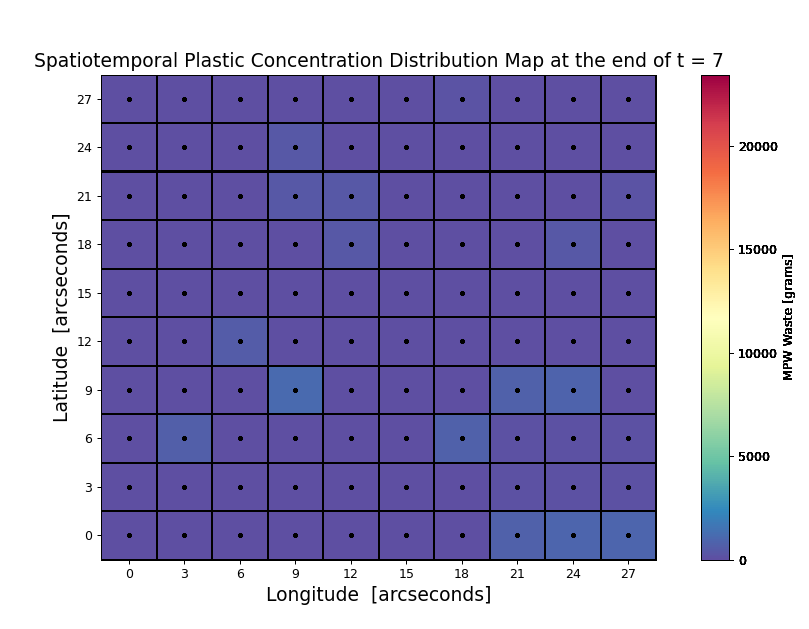

In [89]:
# Make a movie showing the plastic concentration distribution maps through time:

fig, ax = plt.subplots(figsize=[9,7])

def plastic_concentration_maps_animate(t):

    # Give title to the plot:
    ax.set_title('Spatiotemporal Plastic Concentration Distribution Map at the end of t = %d' %(t), size = 15)
    
    # Create a mesh:
    xx, yy = np.meshgrid(lon_arc, lat_arc)

    # Plot the mesh:
    ax.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')
    
    # Plot colors that correspond to the plastic concentration values at t:
    c = ax.pcolormesh(x, y, p_conc_end[:,:,t], edgecolors='black', linewidths=1, vmin = 0, \
                      vmax = np.max(p_conc_end[:,:,:]), cmap = 'Spectral_r')
    
    # Colorbar:
    div = make_axes_locatable(ax)
    cax1 = div.append_axes('right', size='5%', pad=0.5)
    cbar = plt.colorbar(c, cax=cax1)
    
    # Assign a label to the color scale bar:
    cbar.set_label('MPW Waste [grams]')
    
    # Step sizes for the axes:
    ax.set_xticks(lon_arc)
    ax.set_yticks(lat_arc)

    # Titels for the axes: 
    ax.set_xlabel('Longitude  [arcseconds]', size = 15)
    ax.set_ylabel('Latitude  [arcseconds]', size = 15)
    
    return ax

anim = matplotlib.animation.FuncAnimation(fig, plastic_concentration_maps_animate, frames = Time)

plt.show()

<IPython.core.display.Javascript object>


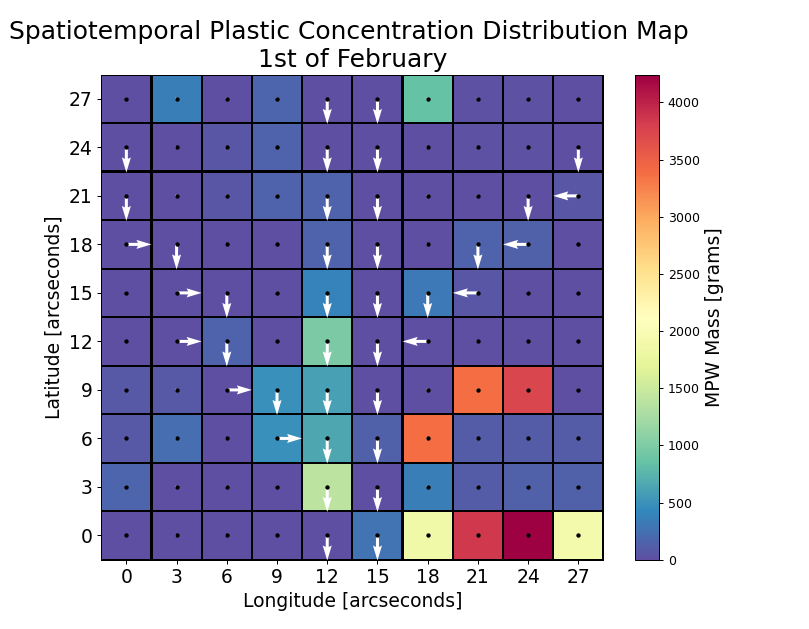

In [90]:
# Make a plot showing the plastic concentration distribution map for a single time step:

#--------------------------------------------------------------------------------------------------------------------------

# In case you want to plot the plastic concentration distribution map on the first day of a month:

# 1th of January     t = 0
# 1th of February    t = 31
# 1th of March       t = 59
# 1th of April       t = 90
# 1th of May         t = 120
# 1th of June        t = 151
# 1th of July        t = 181
# 1th of August      t = 212
# 1th of September   t = 243
# 1th of October     t = 273
# 1th of November    t = 304
# 1th of December    t = 334

#--------------------------------------------------------------------------------------------------------------------------

# Create a new figure:
plt.figure(figsize=[9,7])

# Title for the plot:
plt.title("Spatiotemporal Plastic Concentration Distribution Map \n%s" % "\n".join(wrap("1st of February", width=60)), size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
plt.plot(xx, yy, marker='.', markersize=5, color='black', linestyle='none')

# Plot colors that correspond to the runoff threshold values:
c = plt.pcolormesh(x,y, p_conc_end[:,:,31], edgecolors='black', linewidths=1, vmin = 0, \
                   vmax = np.max(p_conc_end[:,:,31]), cmap = 'Spectral_r')

# Add a color scale bar:
cbar = plt.colorbar()

# Assign a label to the color scale bar:
cbar.set_label('MPW Mass [grams]', size = 15)

# Plot vectors that correspond to the river flow directions:
plt.quiver(xx,yy, uu, vv, color = 'white', pivot='tail', scale = 20)

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

# Show the plot:
plt.show()

In [91]:
############################################################################################################################
########################### M P W  D E V E L O P M E N T  I N  S E L E C T E D  C E L L S ##################################
############################################################################################################################

In [92]:
# Show the temporal evolution of the plastic mass in a specific grid cell:

# Choose a grid cell and provide its indices i and j (note that the southern most row in the geographical map (i.e. lat = 0)
# is stored in the data arrays at i = 0)

# Indices of the grid cell you want to see the MPW development through time for:
i_selected = 9
j_selected = 6

############################################################################################################################
Plastic_mass_in_selected_cell = np.empty(Time_span)

for t in Time:
    
    # Retrieve the MPW mass for the selected grid cell from the MPW end distributions array:
    
    Plastic_mass_in_selected_cell[t] = p_conc_end[i_selected, j_selected, t]
    

print(Plastic_mass_in_selected_cell)


[    0.27     0.54     0.81     1.08     1.35     1.62   193.55   193.82
   194.09   194.36   194.63   194.9    195.17   195.44   195.71   195.98
   470.05   470.32   470.59   470.86   471.13   608.3    608.57   608.84
   609.11   609.38   609.65   774.2    801.85   802.12   857.15   857.42
   912.45   912.72   967.75   968.02   968.29   968.56   968.83   969.1
   969.37   969.64  1188.95  1189.22  1244.25  1271.9   1272.17  1327.2
  1354.85  1355.12  1355.39  1355.66  1465.45  1465.72  1520.75  1521.02
  1521.29  1521.56  1521.83  1522.1   1522.37  1714.3   1714.57  1714.84
  1715.11  1715.38  1852.55  1880.2   1880.47  1880.74  1881.01  1881.28
  1881.55  1881.82  2073.75  2074.02  2074.29  2074.56  2074.83  2075.1
  2075.37  2075.64  2075.91  2076.18  2076.45  2076.72  2076.99  2433.2
  2433.47  2433.74  2488.77  2489.04  2489.31  2571.72  2599.37  2599.64
  2599.91  2600.18  2600.45  2600.72  2600.99  2792.92  2793.19  2793.46
  2875.87  2876.14  2876.41  2876.68  2876.95  2877.22 

<IPython.core.display.Javascript object>


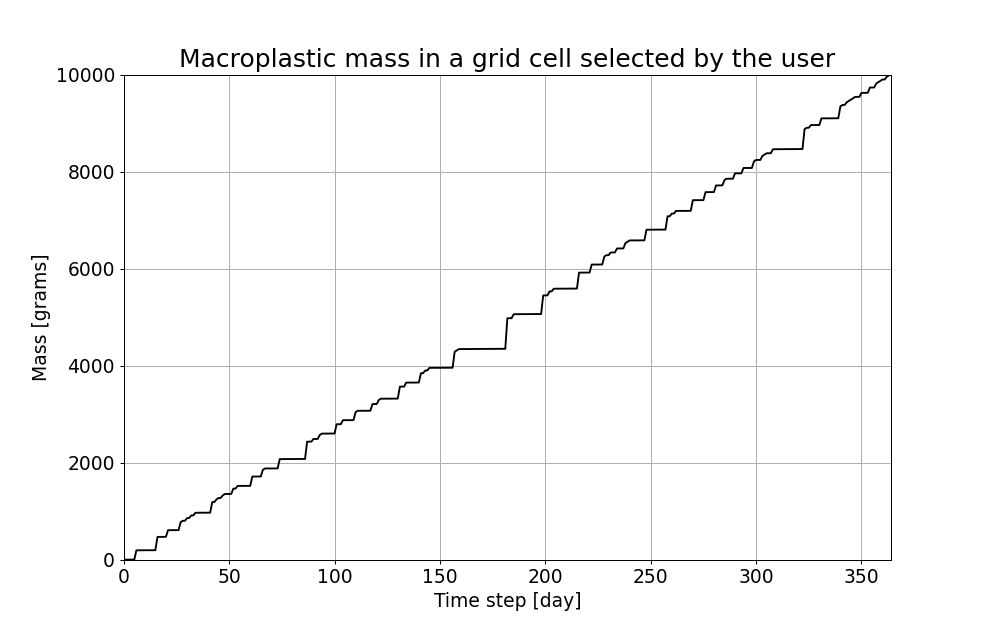

In [93]:
# Make a graph showing the MPW mass in the selected grid cell for each time step: 

# Create a new figure:
plt.figure(figsize=[11,7])

# Title for the plot:
plt.title("Macroplastic mass in a grid cell selected by the user", size = 20)

# Add grid lines:
plt.grid()

# Plot the values of the MPW mass through time:
plt.plot(Time, Plastic_mass_in_selected_cell, color = 'black')

# Size of the numbers on the axes:
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Titels for the axes:
plt.xlabel('Time step [day]', size = 15)
plt.ylabel('Mass [grams]', size = 15)

# Limits of the axes:
plt.xlim([ 0, 364])
plt.ylim([0, 10000]) 

# Show the plot:
plt.show()

In [94]:
############################################################################################################################
################################### P L A S T I C S  I N -  &  O U T P U T  G R A P H S ####################################
############################################################################################################################

<IPython.core.display.Javascript object>


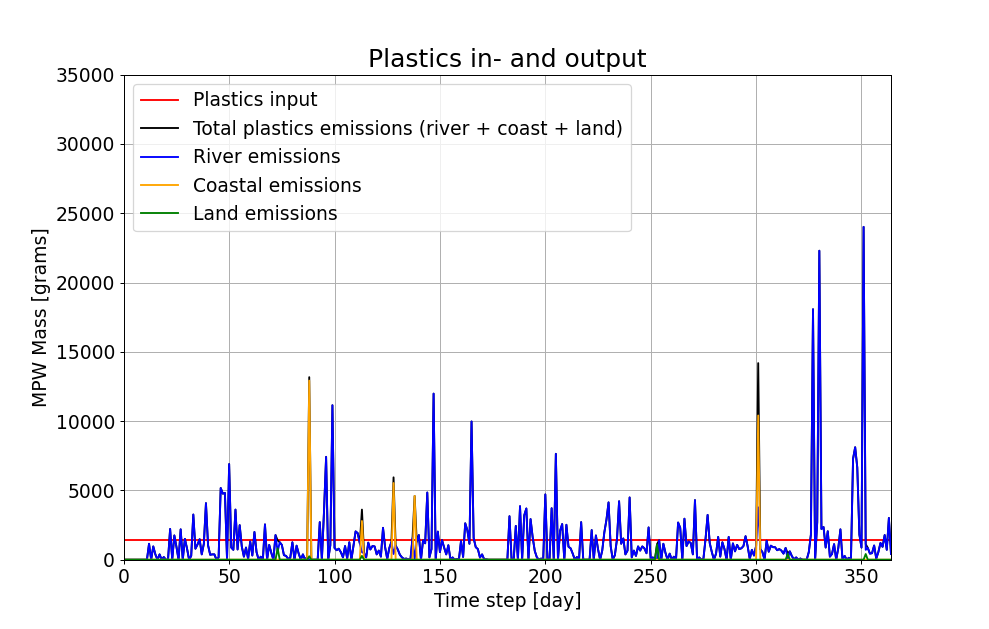

In [95]:
# Make a graph showing for each time step the MPW mass that is added to and emitted from the river basin: 

# Create a new figure:
plt.figure(figsize=[11,7])

# Title for the plot:
plt.title("Plastics in- and output", size = 20)

# Add grid lines:
plt.grid()

# Plot the MPW input values:
plt.plot(Time, IN, color = 'red')

# Plot the total MPW emitted values:
plt.plot(Time, OUT_total, color = 'black')

# Plot the river MPW emission values:
plt.plot(Time, OUT_river, color = 'blue')

# Plot the coastal MPW emission values:
plt.plot(Time, OUT_coast, color = 'orange')

# Plot the land-to-land MPW emission values:
plt.plot(Time, OUT_land, color = 'green')

# Add a legend:
plt.legend(('Plastics input', 'Total plastics emissions (river + coast + land)', 'River emissions', 'Coastal emissions', 'Land emissions'), prop={'size': 15}, loc = 2)

# Size of the numbers on the axes:
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Titels for the axes:
plt.xlabel('Time step [day]', size = 15)
plt.ylabel('MPW Mass [grams]', size = 15)

# Limits of the axes:
plt.xlim([ 0, 364])
plt.ylim([0, 35000])

# Show the plot:
plt.show()

<IPython.core.display.Javascript object>


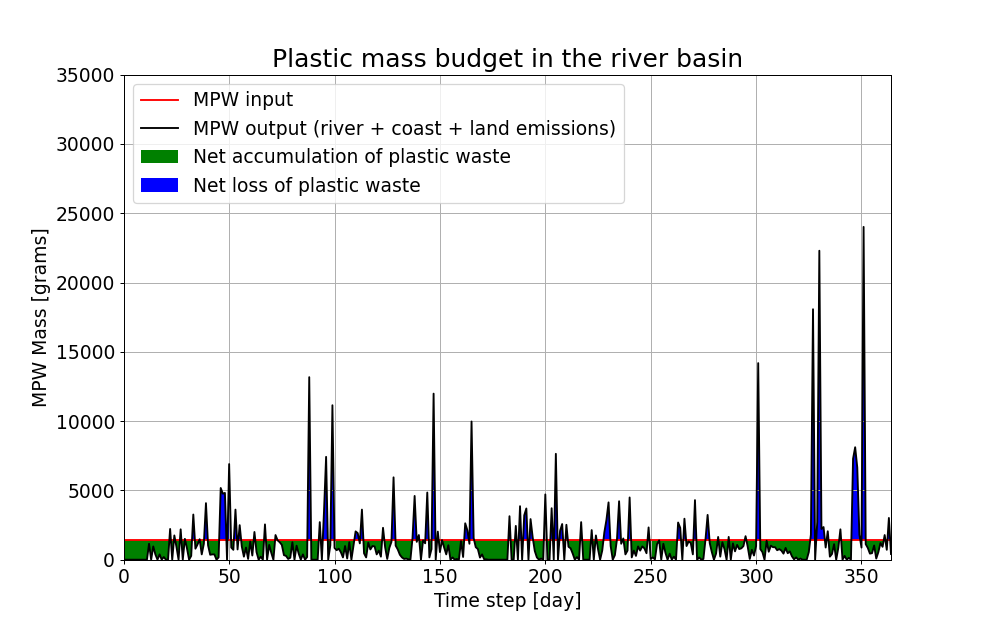

In [96]:
# Make a graph showing for each time step the MPW mass that is added to and emitted from the river basin: 

# Create a new figure:
plt.figure(figsize=[11,7])

# Title for the plot:
plt.title("Plastic mass budget in the river basin", size = 20)

# Add grid lines:
plt.grid()

# Plot the MPW input values:
plt.plot(Time, IN, color = 'red')

# Plot the MPw output values:
plt.plot(Time, OUT_total, color = 'black')

# Color fill the area when MPW input > MPW output:
plt.fill_between(Time, IN, OUT_total, where=OUT_total <= IN, facecolor='green', interpolate=True)

# Color fill the area when MPW input < MPW output:
plt.fill_between(Time, IN, OUT_total, where=OUT_total >= IN, facecolor='blue', interpolate=True)

# Add a legend:
plt.legend(('MPW input', 'MPW output (river + coast + land emissions)', 'Net accumulation of plastic waste', 'Net loss of plastic waste'),prop={'size': 15}, loc = 2)

# Size of the numbers on the axes:
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Titels for the axes:
plt.xlabel('Time step [day]', size = 15)
plt.ylabel('MPW Mass [grams]', size = 15)

# Limits of the axes:
plt.xlim([ 0, 364])
plt.ylim([0, 35000])

# Show the plot:
plt.show()

In [97]:
############################################################################################################################
######################## C U M U L A T I V E  P L A S T I C S  I N -  &  O U T P U T  G R A P H S ##########################
############################################################################################################################

<IPython.core.display.Javascript object>


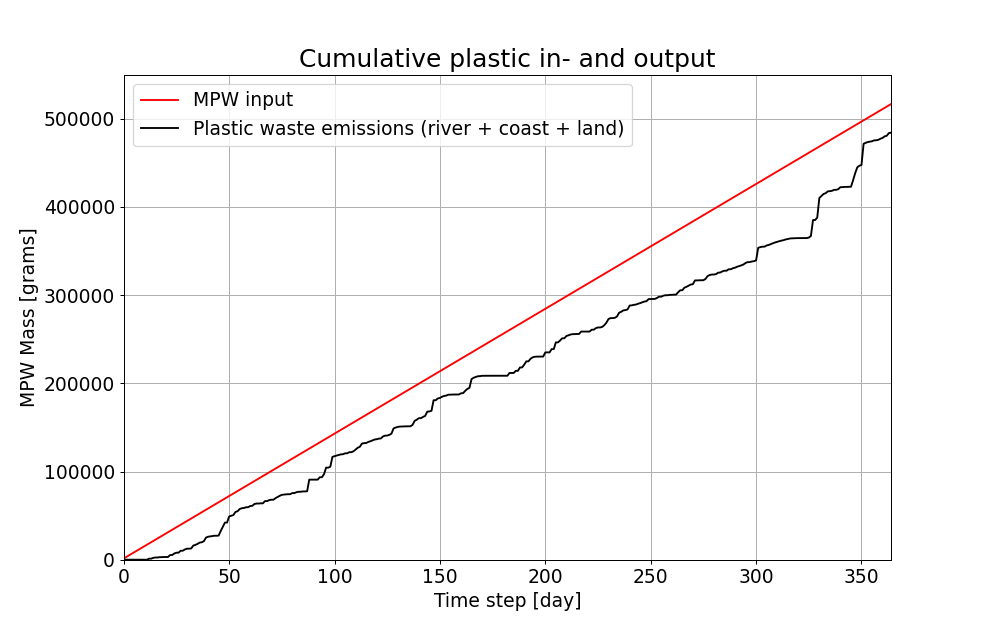

In [98]:
# Make a graph showing for each time step the cumulative MPW mass that is added to and emitted from the river basin:

# Create a new figure:
plt.figure(figsize=[11,7])

# Title for the plot:
plt.title("Cumulative plastic in- and output", size = 20)

# Add grid lines:
plt.grid()

# Plot the cumulative MPW input values:
plt.plot(Time, IN_cum, color = 'red')

# Plot the cumulative total MPW emitted values:
plt.plot(Time, OUT_total_cum, color = 'black')

# Plot the cumulative river MPW emission values:
# plt.plot(Time, OUT_river_cum, color = 'blue')

# Plot the cumulative coastal MPW emission values:
# plt.plot(Time, OUT_coast_cum, color = 'orange')

# Plot the cumulative land-to-land MPW emission values:
# plt.plot(Time, OUT_land_cum, color = 'green')

# Add a legend:
plt.legend(('MPW input', 'Plastic waste emissions (river + coast + land)', 'River emissions', 'Coastal emissions', 'Land emissions'), prop={'size': 15}, loc = 2 )

# Size of the numbers on the axes:
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Titels for the axes:
plt.xlabel('Time step [day]', size = 15)
plt.ylabel('MPW Mass [grams]', size = 15)

# Limits of the axes:
plt.xlim([ 0, 364])
plt.ylim([0, 550000])

# Show the plot:
plt.show()

In [99]:
############################################################################################################################
########################## L A N D  V S  W A T E R  P L A S T I C S  G R A P H  &  P I E  C H A R T ########################
############################################################################################################################

<IPython.core.display.Javascript object>


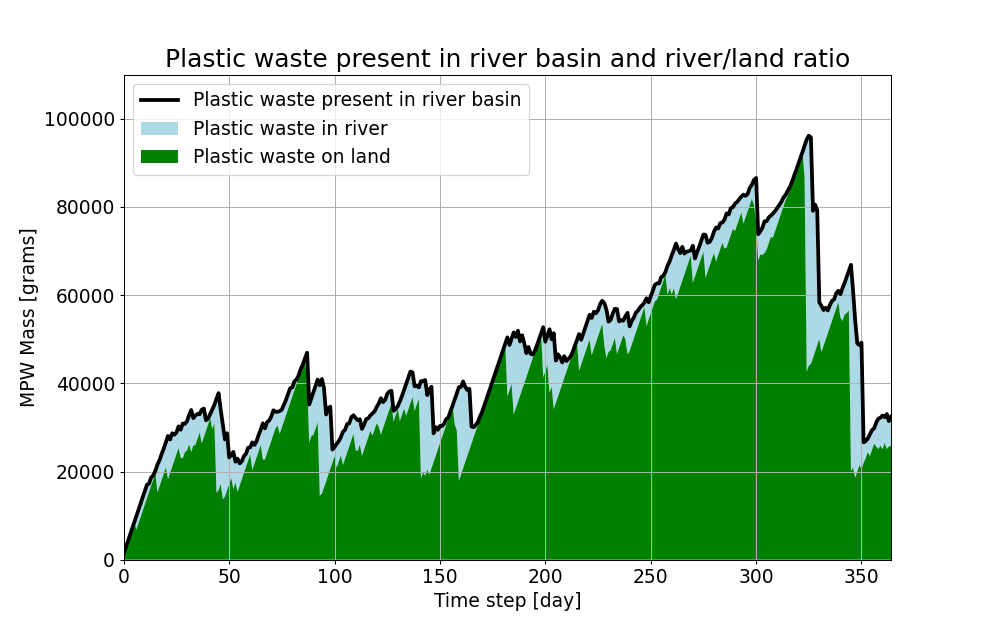

In [100]:
# Make a graph showing for each time step the MPW mass that is present in the river basin and which fraction is on land
# and which is in the river:

# Create a new figure:
plt.figure(figsize=[11,7])

# Title for the plot:
plt.title("Plastic waste present in river basin and river/land ratio", size = 20)

# Plot the MPW present in entire river basin values:
plt.plot(Time, Present_in_river_basin, color = 'black', linewidth = 3)

# Add grid lines:
plt.grid()

# color fill the area between the 'MPW present in river basin' line and the 'MPW present on land' line:
plt.fill_between(Time, Present_in_river_basin, Terrestrial_plastic, facecolor ='lightblue', interpolate=True)

# Color fill the area below the 'MPW present on land' line:
plt.fill_between(Time, Terrestrial_plastic, 0, facecolor='green', interpolate=True)

# Add a legend:
plt.legend(('Plastic waste present in river basin', 'Plastic waste in river', 'Plastic waste on land'), prop={'size': 15}, loc = 2)

# Size of the numbers on the axes:
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Titels for the axes:
plt.xlabel('Time step [day]', size = 15)
plt.ylabel('MPW Mass [grams]', size = 15)

# Limits of the axes:
plt.xlim([ 0, 364])
plt.ylim([0, 110000])

# Show the plot:
plt.show()

In [101]:
# Here we compute for each time step the fraction of the MPW that is on land: 

Fraction_on_land = np.empty(Time_range)

for t in Time:
    
    Fraction_on_land[t] = ( Terrestrial_plastic[t] / Present_in_river_basin[t] ) * 100

print('MPW Fractions on land for each time step:')
print(Fraction_on_land)
print(' ')
print('Average fraction MPW on land:')
print(np.average(Fraction_on_land))
print(' ')
print('Variance:')
print(np.var(Fraction_on_land))
print(' ')
print('Standard deviation:')
print(np.std(Fraction_on_land))


MPW Fractions on land for each time step:
[100.         100.         100.         100.         100.
 100.          69.04553291  72.9148413   75.92430338  78.33187304
  80.30170276  81.94322753  88.88809009  89.73070287  94.98805984
  97.14682125  70.80143735  73.83083283  75.37304297  77.32639043
  78.53030824  64.98087551  72.08395162  73.46142555  79.32807749
  82.90451238  83.70448256  78.53732464  74.3788851   79.19379917
  78.80235103  79.71691096  72.01006132  80.55304437  79.49977508
  83.01289385  87.46353723  77.61990617  81.14811396  92.4646159
  95.80566277  97.01722702  86.8232814   88.30234466  41.52886091
  41.72562858  50.49762893  44.64586697  52.3976307   54.74669122
  73.79358305  78.08047582  65.60229489  78.45317234  67.1403253
  76.9303615   81.70124318  83.56551012  87.58033775  88.46148999
  93.66285255  76.43255076  83.5856744   86.15181503  86.84423064
  88.12016241  73.43121583  76.28313426  77.35893323  80.99306634
  83.05084641  83.75874055  88.89140806  90.

<IPython.core.display.Javascript object>


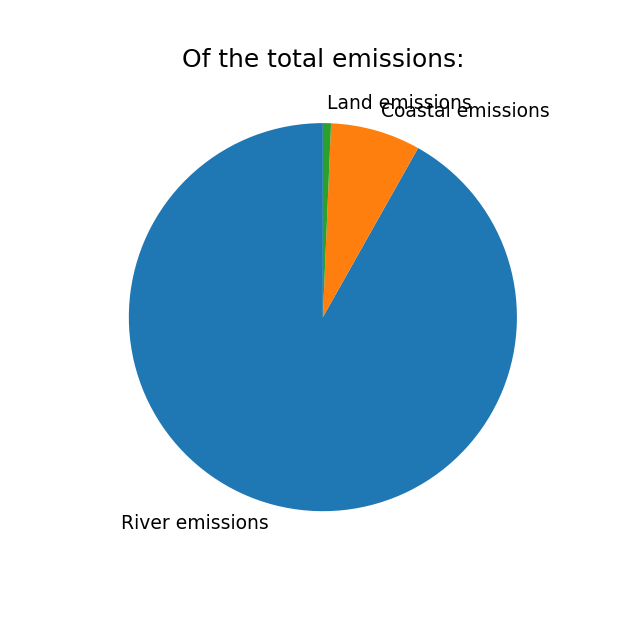

In [102]:
# Make a pie chart of the average river, coastal and land-to-land emissions:

# Create a new figure:
plt.figure(figsize=[7,7])

# Title for the plot:
plt.title("Of the total emissions:", size = 20)

# Plot the total river, coastal and land-to-land output values:
labels = 'River emissions', 'Coastal emissions', 'Land emissions'
sizes = [np.sum(OUT_river), np.sum(OUT_coast), np.sum(OUT_land)]
plt.pie(sizes, labels=labels, textprops={'fontsize': 15}, startangle=90)

# Show the plot:
plt.show()

In [103]:
############################################################################################################################
############################### P O T E N T I A L  T R A S H  R O U T I N G  M A P #########################################
############################################################################################################################

<IPython.core.display.Javascript object>


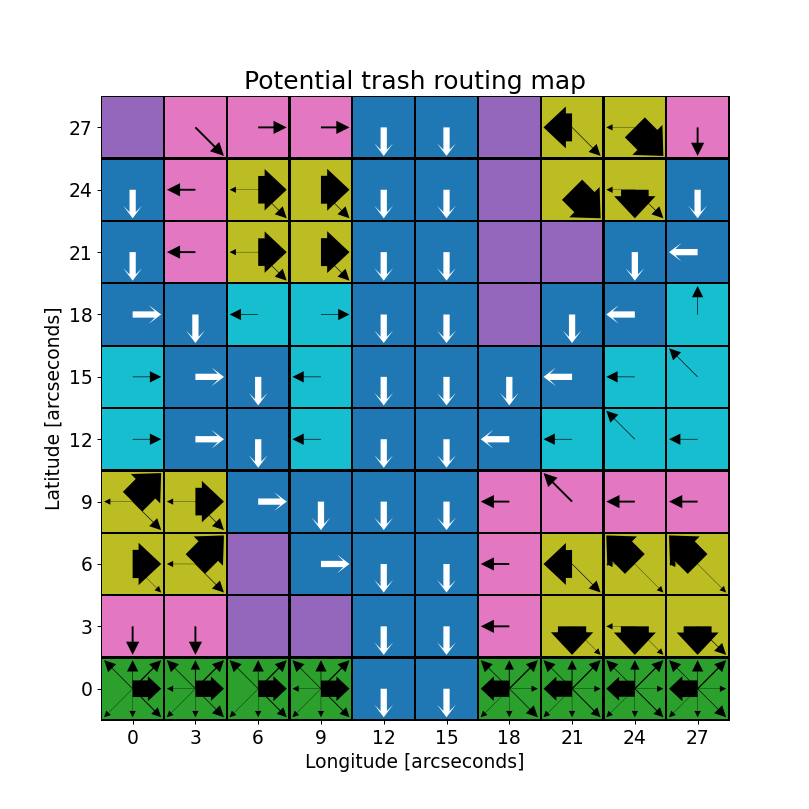

In [104]:
# Make the potential trash routing map:

# Create a new figure:
plt.figure(figsize=[9,9])

# Title for the plot:
plt.title("Potential trash routing map", size = 20)

# Create a mesh:
xx, yy = np.meshgrid(lon_arc, lat_arc)

# Plot the mesh:
#plt.plot(xx, yy, marker='.', markersize=7, color='black', linestyle='none')

# Plot colors that correspond to the land use id's:
c = plt.pcolormesh(x, y, LU, edgecolors='black', linewidths=1, cmap = 'tab10')

# Step sizes for the axes:
plt.xticks(lon_arc, size = 15)
plt.yticks(lat_arc, size = 15)

# Titels for the axes:
plt.xlabel('Longitude [arcseconds]', size = 15)
plt.ylabel('Latitude [arcseconds]', size = 15)

#------------------------------------------------------------------------------------------------------------------------

# Plot white arrows to indicate the river flow directions:

for i in np.arange(0,n_row,1):

    for j in np.arange(0,n_col,1):
            
        if(LU[i,j] == 0):
                      
            plt.quiver(xx[i,j], yy[i,j], uu[i,j], vv[i,j], color = 'white', pivot='tail', headaxislength = 1, \
                       headlength = 2, headwidth = 3, scale = 22, width = 0.01)
        
        else:
            continue

#------------------------------------------------------------------------------------------------------------------------

for d in np.arange(0,8,1):
    
    for i in np.arange(0,n_row,1):

        for j in np.arange(0,n_col,1):
            
            if(LU[i,j] == 0):
                continue
            
            if (d == 0):
                w = (tally_dir_0_cum[i,j])
                                
            elif (d == 1):
                w = (tally_dir_1_cum[i,j])

            elif (d == 2):
                w = (tally_dir_2_cum[i,j])

            elif (d == 3):
                w = (tally_dir_3_cum[i,j])

            elif (d == 4):
                w = (tally_dir_4_cum[i,j])

            elif (d == 5):
                w = (tally_dir_5_cum[i,j])

            elif (d == 6):
                w = (tally_dir_6_cum[i,j])

            else:
                w = (tally_dir_7_cum[i,j])

#--------------------------------------------------------------------------------------------------------------------------
            
            if (w == 1):
            
                h1 = 20.0
                h2 = 20.0
    
            if (w == 2):
            
                h1 = 18.0
                h2 = 18.0    
    
            if (w == 3):
            
                h1 = 10.0
                h2 = 10.0
            
            if (w == 4):
            
                h1 = 9.0
                h2 = 9.0
                
            if (w == 5):
            
                h1 = 8.0
                h2 = 8.0
            
            if (w == 6):
            
                h1 = 7.0
                h2 = 7.0
            
            if (w >= 7 and w <= 10):
            
                h1 = 6.0
                h2 = 6.0

#------------------------------------------------------------------------------------------------------------------------
                                
            if (w >= 11 and w <= 20):
            
                h1 = 3.5
                h2 = 3.5
            
            if (w >= 21 and w <= 30):
            
                h1 = 3.5
                h2 = 3.5
            
            if (w >= 31 and w <= 40):
            
                h1 = 3.5
                h2 = 3.5
            
            if (w >= 41 and w <= 50):
            
                h1 = 1.0
                h2 = 1.5

#------------------------------------------------------------------------------------------------------------------------
             
            if (w >= 51 and w <= 60):
            
                h1 = 0.8
                h2 = 1.5
            
            if (w >= 61 and w <= 70):
            
                h1 = 0.8
                h2 = 1.5
            
            if (w >= 71 and w <= 80):
            
                h1 = 0.8
                h2 = 1.5
            
            if (w >= 81 and w <= 90):
            
                h1 = 0.8
                h2 = 1.5
            
            if (w >= 91 and w <= 100):
            
                h1 = 0.8
                h2 = 1.5

#------------------------------------------------------------------------------------------------------------------------
             
            if (w >= 101 and w <= 300):
            
                h1 = 4.0
                h2 = 3.0

#------------------------------------------------------------------------------------------------------------------------
                  
            if (w >= 301):
            
                h1 = 2.0
                h2 = 1.0
                       
#--------------------------------------------------------------------------------------------------------------------------
            
            if (d == 0):
                plt.quiver(xx[i,j], yy[i,j], dir_0_u[i,j], dir_0_v[i,j], color = 'black', pivot='tail', \
                               headaxislength = h1, headlength = h1, headwidth = h2, scale = 22, width = w/2000)
                
            elif (d == 1):
                plt.quiver(xx[i,j], yy[i,j], dir_1_u[i,j], dir_1_v[i,j], color = 'black', pivot='tail', \
                               headaxislength = h1, headlength = h1, headwidth = h2, scale = 22, width = w/2000)
                
            elif (d == 2):
                plt.quiver(xx[i,j], yy[i,j], dir_2_u[i,j], dir_2_v[i,j], color = 'black', pivot='tail', \
                               headaxislength = h1, headlength = h1, headwidth = h2, scale = 22, width = w/2000)
                
            elif (d == 3):
                plt.quiver(xx[i,j], yy[i,j], dir_3_u[i,j], dir_3_v[i,j], color = 'black', pivot='tail', \
                               headaxislength = h1, headlength = h1, headwidth = h2, scale = 22, width = w/2000)
                
            elif (d == 4):
                plt.quiver(xx[i,j], yy[i,j], dir_4_u[i,j], dir_4_v[i,j], color = 'black', pivot='tail', \
                               headaxislength = h1, headlength = h1, headwidth = h2, scale = 22, width = w/2000)
                
            elif (d == 5):
                plt.quiver(xx[i,j], yy[i,j], dir_5_u[i,j], dir_5_v[i,j], color = 'black', pivot='tail', \
                               headaxislength = h1, headlength = h1, headwidth = h2, scale = 22, width = w/2000)
                
            elif (d == 6):
                plt.quiver(xx[i,j], yy[i,j], dir_6_u[i,j], dir_6_v[i,j], color = 'black', pivot='tail', \
                               headaxislength = h1, headlength = h1, headwidth = h2, scale = 22, width = w/2000)
                
            else:
                plt.quiver(xx[i,j], yy[i,j], dir_7_u[i,j], dir_7_v[i,j], color = 'black', pivot='tail', \
                               headaxislength = h1, headlength = h1, headwidth = h2, scale = 22, width = w/2000)

#--------------------------------------------------------------------------------------------------------------------------
                
    

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ THE END ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~